@[toc](目录)

**Pytorch一般有以下几个流程**


### 1.数据读取

### 2.数据处理

### 3.搭建网络

### 4.模型训练

### 5.模型上线


主要包括以上几个阶段，每个阶段又可以细分，后面再说


### 1.数据读取
CIFAR-10 是由 Hinton 的学生 Alex Krizhevsky 和 Ilya Sutskever 整理的一个用于识别普适物体的小型数据集。一共包含 10 个类别的 RGB 彩色图 片：飞机（ arplane ）、汽车（ automobile ）、鸟类（ bird ）、猫（ cat ）、鹿（ deer ）、狗（ dog ）、蛙类（ frog ）、马（ horse ）、船（ ship ）和卡车（ truck ）。图片的尺寸为 32×32 ，数据集中一共有 50000 张训练圄片和 10000 张测试图片。 

与 MNIST 数据集中目比， CIFAR-10 具有以下不同点：

    • CIFAR-10 是 3 通道的彩色 RGB 图像，而 MNIST 是灰度图像。
    • CIFAR-10 的图片尺寸为 32×32， 而 MNIST 的图片尺寸为 28×28，比 MNIST 稍大。
    • 相比于手写字符， CIFAR-10 含有的是现实世界中真实的物体，不仅噪声很大，而且物体的比例、 特征都不尽相同，这为识别带来很大困难。

首先使用`torchvision`加载和归一化我们的训练数据和测试数据。

    a、`torchvision`这个东西，实现了常用的一些深度学习的相关的图像数据的加载功能，比如cifar10、Imagenet、Mnist等等的，保存在`torchvision.datasets`模块中。
    
    b、同时，也封装了一些处理数据的方法。保存在`torchvision.transforms`模块中
    
    c、还封装了一些模型和工具封装在相应模型中,比如`torchvision.models`当中就包含了AlexNet，VGG，ResNet，SqueezeNet等模型。

In [1]:
#首先导入torch，torchvision模块

import torch
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

**由于torchvision的datasets的输出是[0,1]的PILImage，所以我们先先归一化为[-1,1]的Tensor**

首先定义了一个变换transform，利用的是上面提到的transforms模块中的Compose( )把多个变换组合在一起，可以看到这里面组合了ToTensor和Normalize这两个变换

`transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))`前面的（0.5，0.5，0.5） 是 R G B 三个通道上的均值， 后面(0.5, 0.5, 0.5)是三个通道的标准差，注意通道顺序是 R G B ，用过opencv的同学应该知道openCV读出来的图像是 BRG顺序。这两个tuple数据是用来对RGB 图像做归一化的，如其名称 Normalize 所示这里都取0.5只是一个近似的操作，实际上其均值和方差并不是这么多，但是就这个示例而言 影响可不计。精确值是通过分别计算R,G,B三个通道的数据算出来的。


In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

In [3]:
# datasets.CIFAR10( )也是封装好了的，就在我前面提到的torchvision.datasets块中
trainset = datasets.CIFAR10(root='D:/CIFAR-10', train=True,download=True, transform=transform)

Files already downloaded and verified


 `trainloader`其实是一个比较重要的东西，我们后面就是通过`trainloader`把数据传入网络，当然这里的`trainloader`其实是个变量名，可以随便取，重点是他是由后面的`torch.utils.data.DataLoader()`定义的，这个东西来源于`torch.utils.data`模块

In [4]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)

In [5]:
# 对于测试集的操作和训练集一样，我就不赘述了
testset = torchvision.datasets.CIFAR10(root='D:/CIFAR-10', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,shuffle=False, num_workers=2)
    # 类别信息也是需要我们给定的
classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


In [6]:
trainset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [7]:
trainset.class_to_idx

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

### 2. 查看数据（格式，大小，形状）

In [8]:
trainset.data

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [9]:
trainset.data.shape#50000是图片数量，32x32是图片大小，3是通道数量RGB

(50000, 32, 32, 3)

In [10]:
trainset.data[10000][31][31][2]

168

In [11]:
#查看数据类型
print(type(trainset.data))
print(type(trainset))

<class 'numpy.ndarray'>
<class 'torchvision.datasets.cifar.CIFAR10'>


In [12]:
trainset[10000][0][2][31][31]#10000为图片数量，0表示取前面的数据，2表示通道数RGB，32*32表示图片大小

tensor(0.3176)

### 总结：
    
    `trainset.data.shape`是标准的numpy.ndarray类型，其中50000是图片数量，32x32是图片大小，3是通道数量RGB；
    `trainset`是标准的？？类型，其中50000为图片数量，0表示取前面的数据，2表示3通道数RGB，32*32表示图片大小
    
 ### 3. 查看图片

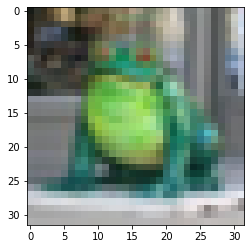

In [13]:
import numpy as np
import matplotlib.pyplot as plt
plt.imshow(trainset.data[19])

### np.ndarray转为torch.Tensor

在深度学习中，原始图像需要转换为深度学习框架自定义的数据格式，在pytorch中，需要转为`torch.Tensor`。
pytorch提供了`torch.Tensor` 与`numpy.ndarray`转换为接口：

方法名|作用
--|--
`torch.from_numpy(xxx)`|`numpy.ndarray`转为torch.Tensor
`tensor1.numpy()`|获取tensor1对象的numpy格式数据

`torch.Tensor` 高维矩阵的表示： N x C x H x W

`numpy.ndarray` 高维矩阵的表示：N x H x W x C

因此在两者转换的时候需要使用`numpy.transpose( )` 方法 。


In [14]:
# numpy image: H x W x C
# torch image: C x H x W
# np.transpose( xxx,  (2, 0, 1))   # 将 H x W x C 转化为 C x H x W
tensor_skimage = torch.from_numpy(np.transpose(trainset.data[19], (2, 0, 1)))
tensor_skimage.size()

torch.Size([3, 32, 32])

### torch.Tensor转numpy.ndarray

In [15]:
# np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
img_skimage_2 = np.transpose(trainset[19][0].numpy(), (1,2,0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


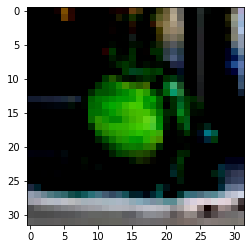

In [16]:
plt.imshow(img_skimage_2)

### 4.定义网络（LeNet5）

手写字体识别模型LeNet5诞生于1994年，是最早的卷积神经网络之一。LeNet5通过巧妙的设计，利用卷积、参数共享、池化等操作提取特征，避免了大量的计算成本，最后再使用全连接神经网络进行分类识别，这个网络也是最近大量神经网络架构的起点。

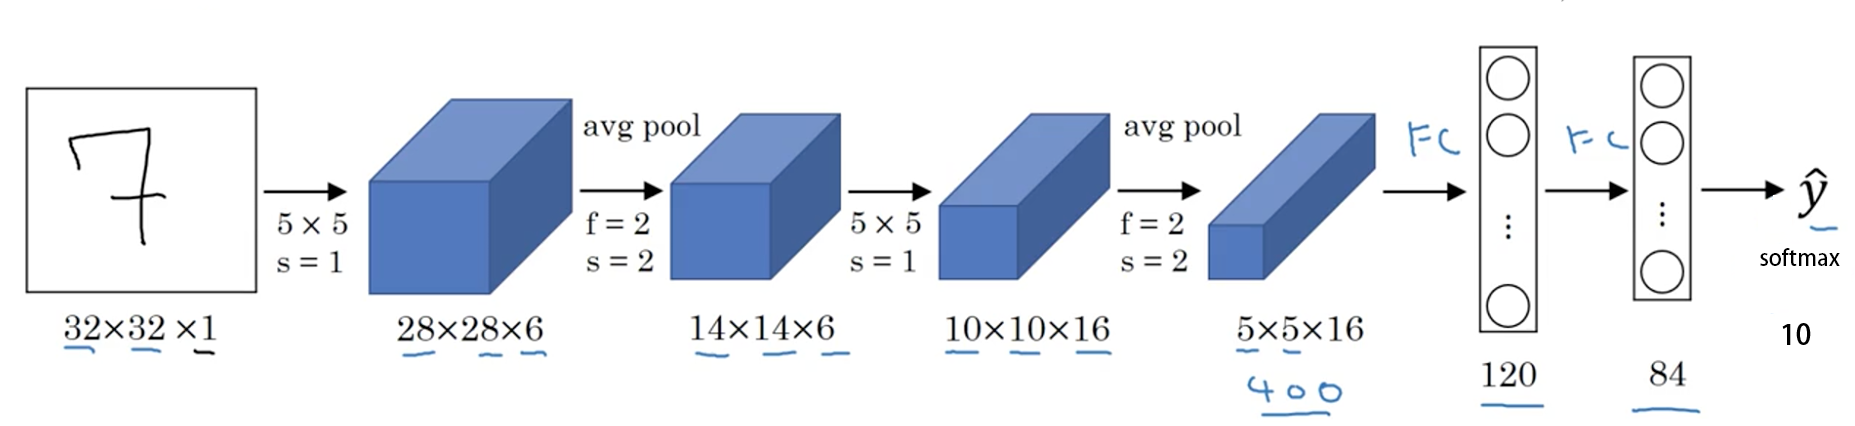


LeNet-5 一些性质：

    如果输入层不算神经网络的层数，那么 LeNet-5 是一个 7 层的网络。（有些地方也可能把 卷积和池化 当作一个 layer）（LeNet-5 名字中的“5”也可以理解为整个网络中含可训练参数的层数为 5。）
    
    LeNet-5 大约有 60,000 个参数。
    
    随着网络越来越深，图像的高度和宽度在缩小，与此同时，图像的 channel 数量一直在增加。
    
    现在常用的 LeNet-5 结构和 Yann LeCun 教授在 1998 年论文中提出的结构在某些地方有区别，比如激活函数的使用，现在一般使用 ReLU 作为激活函数，输出层一般选择 softmax。

In [17]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.optim as optim

#若能使用cuda，则使用cuda
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#定义网络
class LeNet5(nn.Module):# nn.Module是所有神经网络的基类，我们自己定义任何神经网络，都要继承nn.Module
    def __init__(self):
        super(LeNet5,self).__init__()
        self.conv1 = nn.Sequential(
            # 卷积层1，3通道输入，6个卷积核，核大小5*5
            # 经过该层图像大小变为32-5+1，28*28
            nn.Conv2d(in_channels=3,out_channels=6,kernel_size=5,stride=1, padding=0),
            #激活函数
            nn.ReLU(),
            # 经2*2最大池化，图像变为14*14
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
        )
        self.conv2 = nn.Sequential(
            # 卷积层2，6输入通道，16个卷积核，核大小5*5
            # 经过该层图像变为14-5+1，10*10
            nn.Conv2d(in_channels=6,out_channels=16,kernel_size=5,stride=1, padding=0),
            nn.ReLU(),
            # 经2*2最大池化，图像变为5*5
            nn.MaxPool2d(kernel_size=2,stride=2,padding=0),
        )
        self.fc = nn.Sequential(
            # 接着三个全连接层
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,84),
            nn.ReLU(),
            nn.Linear(84,10),
        )
        
        # 定义前向传播过程，输入为
    def forward(self,x):
        x = self.conv1(x)
        x = self.conv2(x)
        # nn.Linear()的输入输出都是维度为一的值，所以要把多维度的tensor展平成一维
            
        x = x.view(x.size()[0],-1)
        x = self.fc(x)
        return x
            
net = LeNet5().cuda()
print("LeNet5 out: ", net)

LeNet5 out:  LeNet5(
  (conv1): Sequential(
    (0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc): Sequential(
    (0): Linear(in_features=400, out_features=120, bias=True)
    (1): ReLU()
    (2): Linear(in_features=120, out_features=84, bias=True)
    (3): ReLU()
    (4): Linear(in_features=84, out_features=10, bias=True)
  )
)


### 5. 定义损失函数和优化器 
    pytorch将深度学习中常用的优化方法全部封装在torch.optim之中，所有的优化方法都是继承基类optim.Optimizier
    
    损失函数是封装在神经网络工具箱nn中的,包含很多损失函数


In [18]:
import torch.optim as optim
#用到了神经网络工具箱 nn 中的交叉熵损失函数
criterion = nn.CrossEntropyLoss() 
# 使用SGD（随机梯度下降）优化，学习率为0.001，动量为0.9
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)  

# optimizer = optim.Adam(net.parameters(), lr=0.01)

### 6. 训练

In [19]:
# plotloss = []
# for epoch in range(10):  # 指定训练一共要循环几个epoch
 
#     running_loss = 0.0  #定义一个变量方便我们对loss进行输出
    
#     # 这里我们遇到了第一步中出现的trailoader，代码传入数据，enumerate是python的内置函数，既获得索引也获得数据
#     for i, (images,labels) in enumerate(trainloader):
#         # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
#         # data的结构是：[4x3x32x32的张量,长度4的张量],4是batch_size的数值
 
#         # 把input数据从tensor转为variable，variable才拥有梯度grad,输入模型训练都要转成Variable        
#         if torch.cuda.is_available():
#             images=Variable(images).cuda()
#             labels=Variable(labels).cuda()
#         else:
#             images=Variable(images) 
#             labels=Variable(labels)

#         # 将参数的grad值初始化为
#         optimizer.zero_grad()                
 
#         # forward + backward + optimize      
#         outputs = net(images)
#         # 将output和labels使用叉熵计算损失
#         loss = criterion(outputs, labels)
#         # 反向传播
#         loss.backward()
#         # 用SGD更新参数
#         optimizer.step()
        
#         # loss.item()转换为numpy
#         # loss本身为Variable类型，所以要使用loss.data[0]获取其Tensor，因为其为标量，所以取0
#         running_loss += loss.item()
#         # 每2000批打印一次
#         if i % 2000 == 1999:    
#             print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
#             plotloss.append(running_loss / 2000)
#             running_loss = 0.0
# print('Finished Training')
# plt.plot(plotloss)

[epoch:1, iter:1] Loss: 2.301 | Acc: 12.500% 
[epoch:1, iter:2] Loss: 2.298 | Acc: 14.062% 
[epoch:1, iter:3] Loss: 2.301 | Acc: 12.240% 
[epoch:1, iter:4] Loss: 2.304 | Acc: 10.938% 
[epoch:1, iter:5] Loss: 2.304 | Acc: 10.625% 
[epoch:1, iter:6] Loss: 2.302 | Acc: 10.938% 
[epoch:1, iter:7] Loss: 2.302 | Acc: 11.272% 
[epoch:1, iter:8] Loss: 2.303 | Acc: 11.426% 
[epoch:1, iter:9] Loss: 2.303 | Acc: 11.198% 
[epoch:1, iter:10] Loss: 2.302 | Acc: 11.328% 
[epoch:1, iter:11] Loss: 2.303 | Acc: 11.435% 
[epoch:1, iter:12] Loss: 2.303 | Acc: 11.458% 
[epoch:1, iter:13] Loss: 2.303 | Acc: 11.358% 
[epoch:1, iter:14] Loss: 2.304 | Acc: 11.440% 
[epoch:1, iter:15] Loss: 2.304 | Acc: 11.250% 
[epoch:1, iter:16] Loss: 2.304 | Acc: 11.328% 
[epoch:1, iter:17] Loss: 2.304 | Acc: 11.351% 
[epoch:1, iter:18] Loss: 2.304 | Acc: 11.241% 
[epoch:1, iter:19] Loss: 2.304 | Acc: 11.349% 
[epoch:1, iter:20] Loss: 2.304 | Acc: 11.406% 
[epoch:1, iter:21] Loss: 2.304 | Acc: 11.533% 
[epoch:1, iter:22] Los

[epoch:1, iter:345] Loss: 2.302 | Acc: 12.570% 
[epoch:1, iter:346] Loss: 2.302 | Acc: 12.577% 
[epoch:1, iter:347] Loss: 2.302 | Acc: 12.588% 
[epoch:1, iter:348] Loss: 2.302 | Acc: 12.590% 
[epoch:1, iter:349] Loss: 2.302 | Acc: 12.596% 
[epoch:1, iter:350] Loss: 2.302 | Acc: 12.592% 
[epoch:1, iter:351] Loss: 2.302 | Acc: 12.607% 
[epoch:1, iter:352] Loss: 2.302 | Acc: 12.620% 
[epoch:1, iter:353] Loss: 2.302 | Acc: 12.620% 
[epoch:1, iter:354] Loss: 2.302 | Acc: 12.617% 
[epoch:1, iter:355] Loss: 2.302 | Acc: 12.612% 
[epoch:1, iter:356] Loss: 2.302 | Acc: 12.621% 
[epoch:1, iter:357] Loss: 2.302 | Acc: 12.616% 
[epoch:1, iter:358] Loss: 2.302 | Acc: 12.613% 
[epoch:1, iter:359] Loss: 2.302 | Acc: 12.607% 
[epoch:1, iter:360] Loss: 2.302 | Acc: 12.615% 
[epoch:1, iter:361] Loss: 2.302 | Acc: 12.626% 
[epoch:1, iter:362] Loss: 2.302 | Acc: 12.619% 
[epoch:1, iter:363] Loss: 2.302 | Acc: 12.623% 
[epoch:1, iter:364] Loss: 2.302 | Acc: 12.616% 
[epoch:1, iter:365] Loss: 2.302 | Acc: 1

[epoch:2, iter:517] Loss: 2.298 | Acc: 14.292% 
[epoch:2, iter:518] Loss: 2.298 | Acc: 14.333% 
[epoch:2, iter:519] Loss: 2.298 | Acc: 14.319% 
[epoch:2, iter:520] Loss: 2.298 | Acc: 14.383% 
[epoch:2, iter:521] Loss: 2.298 | Acc: 14.363% 
[epoch:2, iter:522] Loss: 2.298 | Acc: 14.367% 
[epoch:2, iter:523] Loss: 2.298 | Acc: 14.382% 
[epoch:2, iter:524] Loss: 2.298 | Acc: 14.374% 
[epoch:2, iter:525] Loss: 2.298 | Acc: 14.372% 
[epoch:2, iter:526] Loss: 2.298 | Acc: 14.392% 
[epoch:2, iter:527] Loss: 2.298 | Acc: 14.378% 
[epoch:2, iter:528] Loss: 2.298 | Acc: 14.382% 
[epoch:2, iter:529] Loss: 2.298 | Acc: 14.351% 
[epoch:2, iter:530] Loss: 2.298 | Acc: 14.372% 
[epoch:2, iter:531] Loss: 2.298 | Acc: 14.420% 
[epoch:2, iter:532] Loss: 2.298 | Acc: 14.412% 
[epoch:2, iter:533] Loss: 2.298 | Acc: 14.415% 
[epoch:2, iter:534] Loss: 2.298 | Acc: 14.401% 
[epoch:2, iter:535] Loss: 2.298 | Acc: 14.480% 
[epoch:2, iter:536] Loss: 2.298 | Acc: 14.472% 
[epoch:2, iter:537] Loss: 2.298 | Acc: 1

[epoch:2, iter:689] Loss: 2.297 | Acc: 14.267% 
[epoch:2, iter:690] Loss: 2.297 | Acc: 14.266% 
[epoch:2, iter:691] Loss: 2.297 | Acc: 14.255% 
[epoch:2, iter:692] Loss: 2.296 | Acc: 14.275% 
[epoch:2, iter:693] Loss: 2.296 | Acc: 14.290% 
[epoch:2, iter:694] Loss: 2.296 | Acc: 14.310% 
[epoch:2, iter:695] Loss: 2.296 | Acc: 14.309% 
[epoch:2, iter:696] Loss: 2.296 | Acc: 14.308% 
[epoch:2, iter:697] Loss: 2.296 | Acc: 14.313% 
[epoch:2, iter:698] Loss: 2.296 | Acc: 14.309% 
[epoch:2, iter:699] Loss: 2.296 | Acc: 14.326% 
[epoch:2, iter:700] Loss: 2.296 | Acc: 14.320% 
[epoch:2, iter:701] Loss: 2.296 | Acc: 14.322% 
[epoch:2, iter:702] Loss: 2.296 | Acc: 14.336% 
[epoch:2, iter:703] Loss: 2.296 | Acc: 14.343% 
[epoch:2, iter:704] Loss: 2.296 | Acc: 14.342% 
[epoch:2, iter:705] Loss: 2.296 | Acc: 14.346% 
[epoch:2, iter:706] Loss: 2.296 | Acc: 14.343% 
[epoch:2, iter:707] Loss: 2.296 | Acc: 14.347% 
[epoch:2, iter:708] Loss: 2.296 | Acc: 14.358% 
[epoch:2, iter:709] Loss: 2.296 | Acc: 1

[epoch:3, iter:866] Loss: 2.281 | Acc: 14.267% 
[epoch:3, iter:867] Loss: 2.281 | Acc: 14.283% 
[epoch:3, iter:868] Loss: 2.281 | Acc: 14.299% 
[epoch:3, iter:869] Loss: 2.281 | Acc: 14.296% 
[epoch:3, iter:870] Loss: 2.281 | Acc: 14.320% 
[epoch:3, iter:871] Loss: 2.281 | Acc: 14.361% 
[epoch:3, iter:872] Loss: 2.281 | Acc: 14.323% 
[epoch:3, iter:873] Loss: 2.281 | Acc: 14.286% 
[epoch:3, iter:874] Loss: 2.281 | Acc: 14.309% 
[epoch:3, iter:875] Loss: 2.281 | Acc: 14.298% 
[epoch:3, iter:876] Loss: 2.281 | Acc: 14.245% 
[epoch:3, iter:877] Loss: 2.281 | Acc: 14.260% 
[epoch:3, iter:878] Loss: 2.280 | Acc: 14.266% 
[epoch:3, iter:879] Loss: 2.280 | Acc: 14.232% 
[epoch:3, iter:880] Loss: 2.280 | Acc: 14.246% 
[epoch:3, iter:881] Loss: 2.280 | Acc: 14.268% 
[epoch:3, iter:882] Loss: 2.280 | Acc: 14.289% 
[epoch:3, iter:883] Loss: 2.280 | Acc: 14.341% 
[epoch:3, iter:884] Loss: 2.280 | Acc: 14.331% 
[epoch:3, iter:885] Loss: 2.280 | Acc: 14.404% 
[epoch:3, iter:886] Loss: 2.280 | Acc: 1

[epoch:3, iter:1041] Loss: 2.265 | Acc: 14.992% 
[epoch:3, iter:1042] Loss: 2.265 | Acc: 14.988% 
[epoch:3, iter:1043] Loss: 2.265 | Acc: 14.981% 
[epoch:3, iter:1044] Loss: 2.265 | Acc: 14.975% 
[epoch:3, iter:1045] Loss: 2.265 | Acc: 14.989% 
[epoch:3, iter:1046] Loss: 2.265 | Acc: 14.977% 
[epoch:3, iter:1047] Loss: 2.265 | Acc: 14.976% 
[epoch:3, iter:1048] Loss: 2.264 | Acc: 15.014% 
[epoch:3, iter:1049] Loss: 2.264 | Acc: 15.011% 
[epoch:3, iter:1050] Loss: 2.264 | Acc: 15.022% 
[epoch:3, iter:1051] Loss: 2.264 | Acc: 15.012% 
[epoch:3, iter:1052] Loss: 2.264 | Acc: 15.032% 
[epoch:3, iter:1053] Loss: 2.263 | Acc: 15.031% 
[epoch:3, iter:1054] Loss: 2.263 | Acc: 15.025% 
[epoch:3, iter:1055] Loss: 2.263 | Acc: 15.021% 
[epoch:3, iter:1056] Loss: 2.263 | Acc: 15.009% 
[epoch:3, iter:1057] Loss: 2.263 | Acc: 15.017% 
[epoch:3, iter:1058] Loss: 2.263 | Acc: 15.019% 
[epoch:3, iter:1059] Loss: 2.263 | Acc: 15.019% 
[epoch:3, iter:1060] Loss: 2.263 | Acc: 15.032% 
[epoch:3, iter:1061]

[epoch:4, iter:1214] Loss: 2.163 | Acc: 17.740% 
[epoch:4, iter:1215] Loss: 2.163 | Acc: 17.857% 
[epoch:4, iter:1216] Loss: 2.162 | Acc: 17.823% 
[epoch:4, iter:1217] Loss: 2.162 | Acc: 17.738% 
[epoch:4, iter:1218] Loss: 2.161 | Acc: 17.778% 
[epoch:4, iter:1219] Loss: 2.161 | Acc: 17.731% 
[epoch:4, iter:1220] Loss: 2.162 | Acc: 17.636% 
[epoch:4, iter:1221] Loss: 2.163 | Acc: 17.578% 
[epoch:4, iter:1222] Loss: 2.163 | Acc: 17.602% 
[epoch:4, iter:1223] Loss: 2.163 | Acc: 17.516% 
[epoch:4, iter:1224] Loss: 2.163 | Acc: 17.509% 
[epoch:4, iter:1225] Loss: 2.164 | Acc: 17.503% 
[epoch:4, iter:1226] Loss: 2.164 | Acc: 17.497% 
[epoch:4, iter:1227] Loss: 2.164 | Acc: 17.506% 
[epoch:4, iter:1228] Loss: 2.164 | Acc: 17.528% 
[epoch:4, iter:1229] Loss: 2.162 | Acc: 17.634% 
[epoch:4, iter:1230] Loss: 2.163 | Acc: 17.640% 
[epoch:4, iter:1231] Loss: 2.163 | Acc: 17.592% 
[epoch:4, iter:1232] Loss: 2.163 | Acc: 17.598% 
[epoch:4, iter:1233] Loss: 2.163 | Acc: 17.591% 
[epoch:4, iter:1234]

[epoch:4, iter:1387] Loss: 2.137 | Acc: 19.630% 
[epoch:4, iter:1388] Loss: 2.137 | Acc: 19.626% 
[epoch:4, iter:1389] Loss: 2.136 | Acc: 19.625% 
[epoch:4, iter:1390] Loss: 2.136 | Acc: 19.625% 
[epoch:4, iter:1391] Loss: 2.136 | Acc: 19.660% 
[epoch:4, iter:1392] Loss: 2.136 | Acc: 19.678% 
[epoch:4, iter:1393] Loss: 2.136 | Acc: 19.677% 
[epoch:4, iter:1394] Loss: 2.135 | Acc: 19.662% 
[epoch:4, iter:1395] Loss: 2.135 | Acc: 19.672% 
[epoch:4, iter:1396] Loss: 2.135 | Acc: 19.710% 
[epoch:4, iter:1397] Loss: 2.135 | Acc: 19.706% 
[epoch:4, iter:1398] Loss: 2.135 | Acc: 19.722% 
[epoch:4, iter:1399] Loss: 2.134 | Acc: 19.739% 
[epoch:4, iter:1400] Loss: 2.134 | Acc: 19.748% 
[epoch:4, iter:1401] Loss: 2.134 | Acc: 19.747% 
[epoch:4, iter:1402] Loss: 2.134 | Acc: 19.753% 
[epoch:4, iter:1403] Loss: 2.133 | Acc: 19.786% 
[epoch:4, iter:1404] Loss: 2.133 | Acc: 19.805% 
[epoch:4, iter:1405] Loss: 2.133 | Acc: 19.824% 
[epoch:4, iter:1406] Loss: 2.133 | Acc: 19.826% 
[epoch:4, iter:1407]

[epoch:4, iter:1560] Loss: 2.102 | Acc: 21.080% 
[epoch:4, iter:1561] Loss: 2.102 | Acc: 21.092% 
[epoch:4, iter:1562] Loss: 2.102 | Acc: 21.104% 
[epoch:4, iter:1563] Loss: 2.101 | Acc: 21.102% 
[epoch:4, iter:1564] Loss: 2.101 | Acc: 21.108% 
[epoch:5, iter:1565] Loss: 2.049 | Acc: 26.562% 
[epoch:5, iter:1566] Loss: 2.005 | Acc: 28.125% 
[epoch:5, iter:1567] Loss: 2.005 | Acc: 28.646% 
[epoch:5, iter:1568] Loss: 2.009 | Acc: 28.125% 
[epoch:5, iter:1569] Loss: 2.024 | Acc: 26.562% 
[epoch:5, iter:1570] Loss: 2.027 | Acc: 25.260% 
[epoch:5, iter:1571] Loss: 2.031 | Acc: 25.223% 
[epoch:5, iter:1572] Loss: 2.037 | Acc: 25.293% 
[epoch:5, iter:1573] Loss: 2.026 | Acc: 26.128% 
[epoch:5, iter:1574] Loss: 2.029 | Acc: 26.250% 
[epoch:5, iter:1575] Loss: 2.036 | Acc: 25.568% 
[epoch:5, iter:1576] Loss: 2.037 | Acc: 25.716% 
[epoch:5, iter:1577] Loss: 2.035 | Acc: 25.000% 
[epoch:5, iter:1578] Loss: 2.029 | Acc: 25.000% 
[epoch:5, iter:1579] Loss: 2.028 | Acc: 24.531% 
[epoch:5, iter:1580]

[epoch:5, iter:1735] Loss: 1.982 | Acc: 27.508% 
[epoch:5, iter:1736] Loss: 1.981 | Acc: 27.516% 
[epoch:5, iter:1737] Loss: 1.981 | Acc: 27.533% 
[epoch:5, iter:1738] Loss: 1.980 | Acc: 27.559% 
[epoch:5, iter:1739] Loss: 1.980 | Acc: 27.580% 
[epoch:5, iter:1740] Loss: 1.981 | Acc: 27.557% 
[epoch:5, iter:1741] Loss: 1.980 | Acc: 27.538% 
[epoch:5, iter:1742] Loss: 1.980 | Acc: 27.524% 
[epoch:5, iter:1743] Loss: 1.980 | Acc: 27.523% 
[epoch:5, iter:1744] Loss: 1.980 | Acc: 27.530% 
[epoch:5, iter:1745] Loss: 1.979 | Acc: 27.555% 
[epoch:5, iter:1746] Loss: 1.979 | Acc: 27.571% 
[epoch:5, iter:1747] Loss: 1.979 | Acc: 27.549% 
[epoch:5, iter:1748] Loss: 1.978 | Acc: 27.539% 
[epoch:5, iter:1749] Loss: 1.978 | Acc: 27.563% 
[epoch:5, iter:1750] Loss: 1.978 | Acc: 27.566% 
[epoch:5, iter:1751] Loss: 1.978 | Acc: 27.569% 
[epoch:5, iter:1752] Loss: 1.978 | Acc: 27.576% 
[epoch:5, iter:1753] Loss: 1.978 | Acc: 27.563% 
[epoch:5, iter:1754] Loss: 1.977 | Acc: 27.566% 
[epoch:5, iter:1755]

[epoch:5, iter:1906] Loss: 1.943 | Acc: 28.522% 
[epoch:5, iter:1907] Loss: 1.943 | Acc: 28.530% 
[epoch:5, iter:1908] Loss: 1.943 | Acc: 28.529% 
[epoch:5, iter:1909] Loss: 1.943 | Acc: 28.533% 
[epoch:5, iter:1910] Loss: 1.943 | Acc: 28.540% 
[epoch:5, iter:1911] Loss: 1.942 | Acc: 28.535% 
[epoch:5, iter:1912] Loss: 1.942 | Acc: 28.554% 
[epoch:5, iter:1913] Loss: 1.942 | Acc: 28.579% 
[epoch:5, iter:1914] Loss: 1.941 | Acc: 28.603% 
[epoch:5, iter:1915] Loss: 1.941 | Acc: 28.617% 
[epoch:5, iter:1916] Loss: 1.941 | Acc: 28.635% 
[epoch:5, iter:1917] Loss: 1.941 | Acc: 28.645% 
[epoch:5, iter:1918] Loss: 1.940 | Acc: 28.652% 
[epoch:5, iter:1919] Loss: 1.940 | Acc: 28.664% 
[epoch:5, iter:1920] Loss: 1.940 | Acc: 28.652% 
[epoch:5, iter:1921] Loss: 1.940 | Acc: 28.644% 
[epoch:5, iter:1922] Loss: 1.940 | Acc: 28.649% 
[epoch:5, iter:1923] Loss: 1.939 | Acc: 28.656% 
[epoch:5, iter:1924] Loss: 1.939 | Acc: 28.655% 
[epoch:5, iter:1925] Loss: 1.939 | Acc: 28.686% 
[epoch:5, iter:1926]

[epoch:6, iter:2074] Loss: 1.838 | Acc: 31.966% 
[epoch:6, iter:2075] Loss: 1.839 | Acc: 31.940% 
[epoch:6, iter:2076] Loss: 1.838 | Acc: 31.980% 
[epoch:6, iter:2077] Loss: 1.839 | Acc: 31.954% 
[epoch:6, iter:2078] Loss: 1.838 | Acc: 32.063% 
[epoch:6, iter:2079] Loss: 1.838 | Acc: 32.119% 
[epoch:6, iter:2080] Loss: 1.838 | Acc: 32.150% 
[epoch:6, iter:2081] Loss: 1.837 | Acc: 32.199% 
[epoch:6, iter:2082] Loss: 1.837 | Acc: 32.191% 
[epoch:6, iter:2083] Loss: 1.836 | Acc: 32.184% 
[epoch:6, iter:2084] Loss: 1.836 | Acc: 32.207% 
[epoch:6, iter:2085] Loss: 1.836 | Acc: 32.206% 
[epoch:6, iter:2086] Loss: 1.836 | Acc: 32.180% 
[epoch:6, iter:2087] Loss: 1.836 | Acc: 32.227% 
[epoch:6, iter:2088] Loss: 1.835 | Acc: 32.219% 
[epoch:6, iter:2089] Loss: 1.834 | Acc: 32.259% 
[epoch:6, iter:2090] Loss: 1.835 | Acc: 32.280% 
[epoch:6, iter:2091] Loss: 1.833 | Acc: 32.330% 
[epoch:6, iter:2092] Loss: 1.833 | Acc: 32.373% 
[epoch:6, iter:2093] Loss: 1.832 | Acc: 32.399% 
[epoch:6, iter:2094]

[epoch:6, iter:2249] Loss: 1.811 | Acc: 33.490% 
[epoch:6, iter:2250] Loss: 1.811 | Acc: 33.464% 
[epoch:6, iter:2251] Loss: 1.811 | Acc: 33.464% 
[epoch:6, iter:2252] Loss: 1.811 | Acc: 33.473% 
[epoch:6, iter:2253] Loss: 1.811 | Acc: 33.452% 
[epoch:6, iter:2254] Loss: 1.811 | Acc: 33.450% 
[epoch:6, iter:2255] Loss: 1.811 | Acc: 33.456% 
[epoch:6, iter:2256] Loss: 1.811 | Acc: 33.451% 
[epoch:6, iter:2257] Loss: 1.811 | Acc: 33.462% 
[epoch:6, iter:2258] Loss: 1.811 | Acc: 33.460% 
[epoch:6, iter:2259] Loss: 1.811 | Acc: 33.463% 
[epoch:6, iter:2260] Loss: 1.811 | Acc: 33.455% 
[epoch:6, iter:2261] Loss: 1.811 | Acc: 33.479% 
[epoch:6, iter:2262] Loss: 1.810 | Acc: 33.525% 
[epoch:6, iter:2263] Loss: 1.810 | Acc: 33.520% 
[epoch:6, iter:2264] Loss: 1.810 | Acc: 33.513% 
[epoch:6, iter:2265] Loss: 1.810 | Acc: 33.521% 
[epoch:6, iter:2266] Loss: 1.810 | Acc: 33.516% 
[epoch:6, iter:2267] Loss: 1.810 | Acc: 33.501% 
[epoch:6, iter:2268] Loss: 1.809 | Acc: 33.501% 
[epoch:6, iter:2269]

[epoch:7, iter:2421] Loss: 1.754 | Acc: 36.010% 
[epoch:7, iter:2422] Loss: 1.754 | Acc: 35.968% 
[epoch:7, iter:2423] Loss: 1.754 | Acc: 35.978% 
[epoch:7, iter:2424] Loss: 1.754 | Acc: 35.988% 
[epoch:7, iter:2425] Loss: 1.753 | Acc: 35.987% 
[epoch:7, iter:2426] Loss: 1.754 | Acc: 35.947% 
[epoch:7, iter:2427] Loss: 1.755 | Acc: 35.889% 
[epoch:7, iter:2428] Loss: 1.754 | Acc: 35.928% 
[epoch:7, iter:2429] Loss: 1.752 | Acc: 36.022% 
[epoch:7, iter:2430] Loss: 1.753 | Acc: 35.975% 
[epoch:7, iter:2431] Loss: 1.752 | Acc: 35.947% 
[epoch:7, iter:2432] Loss: 1.751 | Acc: 35.919% 
[epoch:7, iter:2433] Loss: 1.750 | Acc: 35.973% 
[epoch:7, iter:2434] Loss: 1.750 | Acc: 35.964% 
[epoch:7, iter:2435] Loss: 1.751 | Acc: 35.973% 
[epoch:7, iter:2436] Loss: 1.750 | Acc: 35.946% 
[epoch:7, iter:2437] Loss: 1.750 | Acc: 35.938% 
[epoch:7, iter:2438] Loss: 1.750 | Acc: 35.954% 
[epoch:7, iter:2439] Loss: 1.750 | Acc: 35.988% 
[epoch:7, iter:2440] Loss: 1.748 | Acc: 36.120% 
[epoch:7, iter:2441]

[epoch:7, iter:2593] Loss: 1.731 | Acc: 36.700% 
[epoch:7, iter:2594] Loss: 1.731 | Acc: 36.690% 
[epoch:7, iter:2595] Loss: 1.731 | Acc: 36.687% 
[epoch:7, iter:2596] Loss: 1.731 | Acc: 36.681% 
[epoch:7, iter:2597] Loss: 1.731 | Acc: 36.669% 
[epoch:7, iter:2598] Loss: 1.731 | Acc: 36.657% 
[epoch:7, iter:2599] Loss: 1.731 | Acc: 36.645% 
[epoch:7, iter:2600] Loss: 1.730 | Acc: 36.636% 
[epoch:7, iter:2601] Loss: 1.730 | Acc: 36.667% 
[epoch:7, iter:2602] Loss: 1.730 | Acc: 36.658% 
[epoch:7, iter:2603] Loss: 1.730 | Acc: 36.625% 
[epoch:7, iter:2604] Loss: 1.729 | Acc: 36.661% 
[epoch:7, iter:2605] Loss: 1.730 | Acc: 36.649% 
[epoch:7, iter:2606] Loss: 1.730 | Acc: 36.650% 
[epoch:7, iter:2607] Loss: 1.729 | Acc: 36.659% 
[epoch:7, iter:2608] Loss: 1.729 | Acc: 36.671% 
[epoch:7, iter:2609] Loss: 1.729 | Acc: 36.683% 
[epoch:7, iter:2610] Loss: 1.729 | Acc: 36.722% 
[epoch:7, iter:2611] Loss: 1.729 | Acc: 36.722% 
[epoch:7, iter:2612] Loss: 1.729 | Acc: 36.704% 
[epoch:7, iter:2613]

[epoch:8, iter:2761] Loss: 1.697 | Acc: 38.509% 
[epoch:8, iter:2762] Loss: 1.692 | Acc: 38.656% 
[epoch:8, iter:2763] Loss: 1.695 | Acc: 38.492% 
[epoch:8, iter:2764] Loss: 1.691 | Acc: 38.571% 
[epoch:8, iter:2765] Loss: 1.682 | Acc: 38.839% 
[epoch:8, iter:2766] Loss: 1.686 | Acc: 38.901% 
[epoch:8, iter:2767] Loss: 1.687 | Acc: 39.036% 
[epoch:8, iter:2768] Loss: 1.686 | Acc: 39.138% 
[epoch:8, iter:2769] Loss: 1.686 | Acc: 38.989% 
[epoch:8, iter:2770] Loss: 1.686 | Acc: 39.086% 
[epoch:8, iter:2771] Loss: 1.684 | Acc: 38.994% 
[epoch:8, iter:2772] Loss: 1.687 | Acc: 38.772% 
[epoch:8, iter:2773] Loss: 1.684 | Acc: 38.954% 
[epoch:8, iter:2774] Loss: 1.683 | Acc: 38.682% 
[epoch:8, iter:2775] Loss: 1.680 | Acc: 38.857% 
[epoch:8, iter:2776] Loss: 1.679 | Acc: 38.842% 
[epoch:8, iter:2777] Loss: 1.678 | Acc: 38.887% 
[epoch:8, iter:2778] Loss: 1.680 | Acc: 38.815% 
[epoch:8, iter:2779] Loss: 1.683 | Acc: 38.746% 
[epoch:8, iter:2780] Loss: 1.685 | Acc: 38.735% 
[epoch:8, iter:2781]

[epoch:8, iter:3102] Loss: 1.665 | Acc: 39.232% 
[epoch:8, iter:3103] Loss: 1.666 | Acc: 39.225% 
[epoch:8, iter:3104] Loss: 1.666 | Acc: 39.226% 
[epoch:8, iter:3105] Loss: 1.665 | Acc: 39.220% 
[epoch:8, iter:3106] Loss: 1.665 | Acc: 39.219% 
[epoch:8, iter:3107] Loss: 1.665 | Acc: 39.212% 
[epoch:8, iter:3108] Loss: 1.665 | Acc: 39.214% 
[epoch:8, iter:3109] Loss: 1.665 | Acc: 39.214% 
[epoch:8, iter:3110] Loss: 1.664 | Acc: 39.226% 
[epoch:8, iter:3111] Loss: 1.664 | Acc: 39.236% 
[epoch:8, iter:3112] Loss: 1.664 | Acc: 39.223% 
[epoch:8, iter:3113] Loss: 1.665 | Acc: 39.198% 
[epoch:8, iter:3114] Loss: 1.665 | Acc: 39.183% 
[epoch:8, iter:3115] Loss: 1.665 | Acc: 39.203% 
[epoch:8, iter:3116] Loss: 1.664 | Acc: 39.225% 
[epoch:8, iter:3117] Loss: 1.664 | Acc: 39.254% 
[epoch:8, iter:3118] Loss: 1.664 | Acc: 39.245% 
[epoch:8, iter:3119] Loss: 1.664 | Acc: 39.236% 
[epoch:8, iter:3120] Loss: 1.664 | Acc: 39.234% 
[epoch:8, iter:3121] Loss: 1.663 | Acc: 39.237% 
[epoch:8, iter:3122]

[epoch:9, iter:3273] Loss: 1.632 | Acc: 40.932% 
[epoch:9, iter:3274] Loss: 1.631 | Acc: 40.962% 
[epoch:9, iter:3275] Loss: 1.632 | Acc: 40.939% 
[epoch:9, iter:3276] Loss: 1.632 | Acc: 40.921% 
[epoch:9, iter:3277] Loss: 1.633 | Acc: 40.877% 
[epoch:9, iter:3278] Loss: 1.633 | Acc: 40.854% 
[epoch:9, iter:3279] Loss: 1.633 | Acc: 40.842% 
[epoch:9, iter:3280] Loss: 1.633 | Acc: 40.820% 
[epoch:9, iter:3281] Loss: 1.633 | Acc: 40.819% 
[epoch:9, iter:3282] Loss: 1.632 | Acc: 40.808% 
[epoch:9, iter:3283] Loss: 1.632 | Acc: 40.847% 
[epoch:9, iter:3284] Loss: 1.632 | Acc: 40.860% 
[epoch:9, iter:3285] Loss: 1.631 | Acc: 40.889% 
[epoch:9, iter:3286] Loss: 1.630 | Acc: 40.917% 
[epoch:9, iter:3287] Loss: 1.630 | Acc: 40.994% 
[epoch:9, iter:3288] Loss: 1.629 | Acc: 41.021% 
[epoch:9, iter:3289] Loss: 1.629 | Acc: 40.974% 
[epoch:9, iter:3290] Loss: 1.629 | Acc: 40.967% 
[epoch:9, iter:3291] Loss: 1.628 | Acc: 40.975% 
[epoch:9, iter:3292] Loss: 1.629 | Acc: 40.987% 
[epoch:9, iter:3293]

[epoch:9, iter:3441] Loss: 1.621 | Acc: 40.925% 
[epoch:9, iter:3442] Loss: 1.620 | Acc: 40.948% 
[epoch:9, iter:3443] Loss: 1.620 | Acc: 40.957% 
[epoch:9, iter:3444] Loss: 1.620 | Acc: 40.946% 
[epoch:9, iter:3445] Loss: 1.620 | Acc: 40.960% 
[epoch:9, iter:3446] Loss: 1.619 | Acc: 40.971% 
[epoch:9, iter:3447] Loss: 1.620 | Acc: 40.968% 
[epoch:9, iter:3448] Loss: 1.620 | Acc: 40.962% 
[epoch:9, iter:3449] Loss: 1.620 | Acc: 40.961% 
[epoch:9, iter:3450] Loss: 1.620 | Acc: 40.940% 
[epoch:9, iter:3451] Loss: 1.620 | Acc: 40.959% 
[epoch:9, iter:3452] Loss: 1.620 | Acc: 40.953% 
[epoch:9, iter:3453] Loss: 1.620 | Acc: 40.950% 
[epoch:9, iter:3454] Loss: 1.620 | Acc: 40.946% 
[epoch:9, iter:3455] Loss: 1.620 | Acc: 40.962% 
[epoch:9, iter:3456] Loss: 1.620 | Acc: 40.949% 
[epoch:9, iter:3457] Loss: 1.620 | Acc: 40.953% 
[epoch:9, iter:3458] Loss: 1.620 | Acc: 40.954% 
[epoch:9, iter:3459] Loss: 1.620 | Acc: 40.965% 
[epoch:9, iter:3460] Loss: 1.620 | Acc: 40.971% 
[epoch:9, iter:3461]

[epoch:10, iter:3608] Loss: 1.594 | Acc: 41.599% 
[epoch:10, iter:3609] Loss: 1.595 | Acc: 41.641% 
[epoch:10, iter:3610] Loss: 1.596 | Acc: 41.561% 
[epoch:10, iter:3611] Loss: 1.597 | Acc: 41.542% 
[epoch:10, iter:3612] Loss: 1.595 | Acc: 41.591% 
[epoch:10, iter:3613] Loss: 1.594 | Acc: 41.647% 
[epoch:10, iter:3614] Loss: 1.593 | Acc: 41.727% 
[epoch:10, iter:3615] Loss: 1.593 | Acc: 41.699% 
[epoch:10, iter:3616] Loss: 1.593 | Acc: 41.736% 
[epoch:10, iter:3617] Loss: 1.593 | Acc: 41.741% 
[epoch:10, iter:3618] Loss: 1.593 | Acc: 41.809% 
[epoch:10, iter:3619] Loss: 1.593 | Acc: 41.789% 
[epoch:10, iter:3620] Loss: 1.592 | Acc: 41.894% 
[epoch:10, iter:3621] Loss: 1.592 | Acc: 41.896% 
[epoch:10, iter:3622] Loss: 1.590 | Acc: 41.952% 
[epoch:10, iter:3623] Loss: 1.590 | Acc: 41.917% 
[epoch:10, iter:3624] Loss: 1.590 | Acc: 41.882% 
[epoch:10, iter:3625] Loss: 1.590 | Acc: 41.878% 
[epoch:10, iter:3626] Loss: 1.590 | Acc: 41.917% 
[epoch:10, iter:3627] Loss: 1.590 | Acc: 41.848% 


[epoch:10, iter:3777] Loss: 1.588 | Acc: 42.124% 
[epoch:10, iter:3778] Loss: 1.588 | Acc: 42.121% 
[epoch:10, iter:3779] Loss: 1.588 | Acc: 42.133% 
[epoch:10, iter:3780] Loss: 1.588 | Acc: 42.107% 
[epoch:10, iter:3781] Loss: 1.588 | Acc: 42.107% 
[epoch:10, iter:3782] Loss: 1.588 | Acc: 42.092% 
[epoch:10, iter:3783] Loss: 1.588 | Acc: 42.108% 
[epoch:10, iter:3784] Loss: 1.588 | Acc: 42.105% 
[epoch:10, iter:3785] Loss: 1.588 | Acc: 42.114% 
[epoch:10, iter:3786] Loss: 1.589 | Acc: 42.076% 
[epoch:10, iter:3787] Loss: 1.588 | Acc: 42.083% 
[epoch:10, iter:3788] Loss: 1.588 | Acc: 42.092% 
[epoch:10, iter:3789] Loss: 1.588 | Acc: 42.089% 
[epoch:10, iter:3790] Loss: 1.588 | Acc: 42.092% 
[epoch:10, iter:3791] Loss: 1.588 | Acc: 42.078% 
[epoch:10, iter:3792] Loss: 1.588 | Acc: 42.064% 
[epoch:10, iter:3793] Loss: 1.588 | Acc: 42.051% 
[epoch:10, iter:3794] Loss: 1.588 | Acc: 42.077% 
[epoch:10, iter:3795] Loss: 1.588 | Acc: 42.060% 
[epoch:10, iter:3796] Loss: 1.588 | Acc: 42.058% 


[epoch:11, iter:3943] Loss: 1.571 | Acc: 42.732% 
[epoch:11, iter:3944] Loss: 1.570 | Acc: 42.969% 
[epoch:11, iter:3945] Loss: 1.571 | Acc: 42.768% 
[epoch:11, iter:3946] Loss: 1.570 | Acc: 42.773% 
[epoch:11, iter:3947] Loss: 1.568 | Acc: 42.884% 
[epoch:11, iter:3948] Loss: 1.566 | Acc: 42.948% 
[epoch:11, iter:3949] Loss: 1.567 | Acc: 43.009% 
[epoch:11, iter:3950] Loss: 1.562 | Acc: 43.340% 
[epoch:11, iter:3951] Loss: 1.560 | Acc: 43.331% 
[epoch:11, iter:3952] Loss: 1.560 | Acc: 43.378% 
[epoch:11, iter:3953] Loss: 1.559 | Acc: 43.496% 
[epoch:11, iter:3954] Loss: 1.556 | Acc: 43.608% 
[epoch:11, iter:3955] Loss: 1.558 | Acc: 43.490% 
[epoch:11, iter:3956] Loss: 1.558 | Acc: 43.427% 
[epoch:11, iter:3957] Loss: 1.556 | Acc: 43.451% 
[epoch:11, iter:3958] Loss: 1.556 | Acc: 43.392% 
[epoch:11, iter:3959] Loss: 1.555 | Acc: 43.447% 
[epoch:11, iter:3960] Loss: 1.556 | Acc: 43.344% 
[epoch:11, iter:3961] Loss: 1.556 | Acc: 43.229% 
[epoch:11, iter:3962] Loss: 1.557 | Acc: 43.164% 


[epoch:11, iter:4113] Loss: 1.557 | Acc: 43.000% 
[epoch:11, iter:4114] Loss: 1.556 | Acc: 43.022% 
[epoch:11, iter:4115] Loss: 1.557 | Acc: 43.030% 
[epoch:11, iter:4116] Loss: 1.557 | Acc: 43.014% 
[epoch:11, iter:4117] Loss: 1.556 | Acc: 43.044% 
[epoch:11, iter:4118] Loss: 1.556 | Acc: 43.055% 
[epoch:11, iter:4119] Loss: 1.556 | Acc: 43.085% 
[epoch:11, iter:4120] Loss: 1.556 | Acc: 43.088% 
[epoch:11, iter:4121] Loss: 1.556 | Acc: 43.084% 
[epoch:11, iter:4122] Loss: 1.556 | Acc: 43.101% 
[epoch:11, iter:4123] Loss: 1.556 | Acc: 43.108% 
[epoch:11, iter:4124] Loss: 1.556 | Acc: 43.118% 
[epoch:11, iter:4125] Loss: 1.556 | Acc: 43.125% 
[epoch:11, iter:4126] Loss: 1.555 | Acc: 43.157% 
[epoch:11, iter:4127] Loss: 1.555 | Acc: 43.185% 
[epoch:11, iter:4128] Loss: 1.554 | Acc: 43.191% 
[epoch:11, iter:4129] Loss: 1.554 | Acc: 43.218% 
[epoch:11, iter:4130] Loss: 1.554 | Acc: 43.200% 
[epoch:11, iter:4131] Loss: 1.554 | Acc: 43.202% 
[epoch:11, iter:4132] Loss: 1.554 | Acc: 43.226% 


[epoch:11, iter:4279] Loss: 1.547 | Acc: 43.691% 
[epoch:11, iter:4280] Loss: 1.546 | Acc: 43.695% 
[epoch:11, iter:4281] Loss: 1.546 | Acc: 43.704% 
[epoch:11, iter:4282] Loss: 1.546 | Acc: 43.716% 
[epoch:11, iter:4283] Loss: 1.546 | Acc: 43.727% 
[epoch:11, iter:4284] Loss: 1.546 | Acc: 43.723% 
[epoch:11, iter:4285] Loss: 1.546 | Acc: 43.729% 
[epoch:11, iter:4286] Loss: 1.546 | Acc: 43.746% 
[epoch:11, iter:4287] Loss: 1.546 | Acc: 43.740% 
[epoch:11, iter:4288] Loss: 1.546 | Acc: 43.723% 
[epoch:11, iter:4289] Loss: 1.546 | Acc: 43.715% 
[epoch:11, iter:4290] Loss: 1.546 | Acc: 43.715% 
[epoch:11, iter:4291] Loss: 1.546 | Acc: 43.707% 
[epoch:11, iter:4292] Loss: 1.546 | Acc: 43.699% 
[epoch:11, iter:4293] Loss: 1.546 | Acc: 43.705% 
[epoch:11, iter:4294] Loss: 1.546 | Acc: 43.707% 
[epoch:11, iter:4295] Loss: 1.546 | Acc: 43.713% 
[epoch:11, iter:4296] Loss: 1.546 | Acc: 43.718% 
[epoch:11, iter:4297] Loss: 1.546 | Acc: 43.716% 
[epoch:11, iter:4298] Loss: 1.547 | Acc: 43.726% 


[epoch:12, iter:4443] Loss: 1.528 | Acc: 44.570% 
[epoch:12, iter:4444] Loss: 1.528 | Acc: 44.575% 
[epoch:12, iter:4445] Loss: 1.527 | Acc: 44.580% 
[epoch:12, iter:4446] Loss: 1.526 | Acc: 44.612% 
[epoch:12, iter:4447] Loss: 1.526 | Acc: 44.628% 
[epoch:12, iter:4448] Loss: 1.525 | Acc: 44.632% 
[epoch:12, iter:4449] Loss: 1.525 | Acc: 44.616% 
[epoch:12, iter:4450] Loss: 1.524 | Acc: 44.631% 
[epoch:12, iter:4451] Loss: 1.525 | Acc: 44.620% 
[epoch:12, iter:4452] Loss: 1.524 | Acc: 44.650% 
[epoch:12, iter:4453] Loss: 1.524 | Acc: 44.655% 
[epoch:12, iter:4454] Loss: 1.524 | Acc: 44.633% 
[epoch:12, iter:4455] Loss: 1.524 | Acc: 44.653% 
[epoch:12, iter:4456] Loss: 1.524 | Acc: 44.652% 
[epoch:12, iter:4457] Loss: 1.524 | Acc: 44.656% 
[epoch:12, iter:4458] Loss: 1.523 | Acc: 44.681% 
[epoch:12, iter:4459] Loss: 1.524 | Acc: 44.630% 
[epoch:12, iter:4460] Loss: 1.524 | Acc: 44.605% 
[epoch:12, iter:4461] Loss: 1.524 | Acc: 44.639% 
[epoch:12, iter:4462] Loss: 1.523 | Acc: 44.662% 


[epoch:12, iter:4613] Loss: 1.514 | Acc: 45.037% 
[epoch:12, iter:4614] Loss: 1.514 | Acc: 45.033% 
[epoch:12, iter:4615] Loss: 1.515 | Acc: 45.016% 
[epoch:12, iter:4616] Loss: 1.515 | Acc: 45.020% 
[epoch:12, iter:4617] Loss: 1.515 | Acc: 45.006% 
[epoch:12, iter:4618] Loss: 1.515 | Acc: 45.007% 
[epoch:12, iter:4619] Loss: 1.515 | Acc: 45.013% 
[epoch:12, iter:4620] Loss: 1.515 | Acc: 45.024% 
[epoch:12, iter:4621] Loss: 1.515 | Acc: 45.020% 
[epoch:12, iter:4622] Loss: 1.515 | Acc: 45.018% 
[epoch:12, iter:4623] Loss: 1.515 | Acc: 45.033% 
[epoch:12, iter:4624] Loss: 1.515 | Acc: 45.030% 
[epoch:12, iter:4625] Loss: 1.515 | Acc: 45.023% 
[epoch:12, iter:4626] Loss: 1.515 | Acc: 45.007% 
[epoch:12, iter:4627] Loss: 1.515 | Acc: 45.023% 
[epoch:12, iter:4628] Loss: 1.515 | Acc: 45.016% 
[epoch:12, iter:4629] Loss: 1.515 | Acc: 44.998% 
[epoch:12, iter:4630] Loss: 1.515 | Acc: 44.994% 
[epoch:12, iter:4631] Loss: 1.515 | Acc: 44.991% 
[epoch:12, iter:4632] Loss: 1.515 | Acc: 44.999% 


[epoch:13, iter:4780] Loss: 1.490 | Acc: 46.058% 
[epoch:13, iter:4781] Loss: 1.489 | Acc: 46.050% 
[epoch:13, iter:4782] Loss: 1.488 | Acc: 46.076% 
[epoch:13, iter:4783] Loss: 1.488 | Acc: 46.094% 
[epoch:13, iter:4784] Loss: 1.487 | Acc: 46.179% 
[epoch:13, iter:4785] Loss: 1.486 | Acc: 46.195% 
[epoch:13, iter:4786] Loss: 1.486 | Acc: 46.152% 
[epoch:13, iter:4787] Loss: 1.486 | Acc: 46.176% 
[epoch:13, iter:4788] Loss: 1.485 | Acc: 46.216% 
[epoch:13, iter:4789] Loss: 1.487 | Acc: 46.174% 
[epoch:13, iter:4790] Loss: 1.486 | Acc: 46.158% 
[epoch:13, iter:4791] Loss: 1.486 | Acc: 46.196% 
[epoch:13, iter:4792] Loss: 1.486 | Acc: 46.172% 
[epoch:13, iter:4793] Loss: 1.485 | Acc: 46.163% 
[epoch:13, iter:4794] Loss: 1.485 | Acc: 46.186% 
[epoch:13, iter:4795] Loss: 1.486 | Acc: 46.079% 
[epoch:13, iter:4796] Loss: 1.486 | Acc: 46.086% 
[epoch:13, iter:4797] Loss: 1.485 | Acc: 46.168% 
[epoch:13, iter:4798] Loss: 1.485 | Acc: 46.167% 
[epoch:13, iter:4799] Loss: 1.485 | Acc: 46.130% 


[epoch:13, iter:4945] Loss: 1.486 | Acc: 45.853% 
[epoch:13, iter:4946] Loss: 1.486 | Acc: 45.842% 
[epoch:13, iter:4947] Loss: 1.486 | Acc: 45.870% 
[epoch:13, iter:4948] Loss: 1.486 | Acc: 45.871% 
[epoch:13, iter:4949] Loss: 1.486 | Acc: 45.875% 
[epoch:13, iter:4950] Loss: 1.486 | Acc: 45.873% 
[epoch:13, iter:4951] Loss: 1.486 | Acc: 45.895% 
[epoch:13, iter:4952] Loss: 1.486 | Acc: 45.913% 
[epoch:13, iter:4953] Loss: 1.486 | Acc: 45.911% 
[epoch:13, iter:4954] Loss: 1.486 | Acc: 45.906% 
[epoch:13, iter:4955] Loss: 1.486 | Acc: 45.889% 
[epoch:13, iter:4956] Loss: 1.485 | Acc: 45.910% 
[epoch:13, iter:4957] Loss: 1.486 | Acc: 45.902% 
[epoch:13, iter:4958] Loss: 1.486 | Acc: 45.912% 
[epoch:13, iter:4959] Loss: 1.486 | Acc: 45.912% 
[epoch:13, iter:4960] Loss: 1.485 | Acc: 45.954% 
[epoch:13, iter:4961] Loss: 1.486 | Acc: 45.943% 
[epoch:13, iter:4962] Loss: 1.486 | Acc: 45.929% 
[epoch:13, iter:4963] Loss: 1.486 | Acc: 45.918% 
[epoch:13, iter:4964] Loss: 1.486 | Acc: 45.930% 


[epoch:14, iter:5111] Loss: 1.475 | Acc: 46.429% 
[epoch:14, iter:5112] Loss: 1.471 | Acc: 46.444% 
[epoch:14, iter:5113] Loss: 1.472 | Acc: 46.276% 
[epoch:14, iter:5114] Loss: 1.474 | Acc: 46.472% 
[epoch:14, iter:5115] Loss: 1.477 | Acc: 46.387% 
[epoch:14, iter:5116] Loss: 1.473 | Acc: 46.449% 
[epoch:14, iter:5117] Loss: 1.476 | Acc: 46.347% 
[epoch:14, iter:5118] Loss: 1.472 | Acc: 46.451% 
[epoch:14, iter:5119] Loss: 1.470 | Acc: 46.593% 
[epoch:14, iter:5120] Loss: 1.469 | Acc: 46.664% 
[epoch:14, iter:5121] Loss: 1.467 | Acc: 46.752% 
[epoch:14, iter:5122] Loss: 1.469 | Acc: 46.675% 
[epoch:14, iter:5123] Loss: 1.473 | Acc: 46.582% 
[epoch:14, iter:5124] Loss: 1.473 | Acc: 46.608% 
[epoch:14, iter:5125] Loss: 1.474 | Acc: 46.429% 
[epoch:14, iter:5126] Loss: 1.471 | Acc: 46.530% 
[epoch:14, iter:5127] Loss: 1.468 | Acc: 46.715% 
[epoch:14, iter:5128] Loss: 1.468 | Acc: 46.649% 
[epoch:14, iter:5129] Loss: 1.468 | Acc: 46.552% 
[epoch:14, iter:5130] Loss: 1.468 | Acc: 46.493% 


[epoch:14, iter:5279] Loss: 1.460 | Acc: 47.437% 
[epoch:14, iter:5280] Loss: 1.460 | Acc: 47.426% 
[epoch:14, iter:5281] Loss: 1.460 | Acc: 47.416% 
[epoch:14, iter:5282] Loss: 1.460 | Acc: 47.413% 
[epoch:14, iter:5283] Loss: 1.459 | Acc: 47.453% 
[epoch:14, iter:5284] Loss: 1.460 | Acc: 47.462% 
[epoch:14, iter:5285] Loss: 1.460 | Acc: 47.459% 
[epoch:14, iter:5286] Loss: 1.460 | Acc: 47.460% 
[epoch:14, iter:5287] Loss: 1.461 | Acc: 47.457% 
[epoch:14, iter:5288] Loss: 1.460 | Acc: 47.462% 
[epoch:14, iter:5289] Loss: 1.460 | Acc: 47.451% 
[epoch:14, iter:5290] Loss: 1.459 | Acc: 47.509% 
[epoch:14, iter:5291] Loss: 1.459 | Acc: 47.506% 
[epoch:14, iter:5292] Loss: 1.458 | Acc: 47.525% 
[epoch:14, iter:5293] Loss: 1.458 | Acc: 47.526% 
[epoch:14, iter:5294] Loss: 1.459 | Acc: 47.512% 
[epoch:14, iter:5295] Loss: 1.458 | Acc: 47.527% 
[epoch:14, iter:5296] Loss: 1.458 | Acc: 47.524% 
[epoch:14, iter:5297] Loss: 1.458 | Acc: 47.496% 
[epoch:14, iter:5298] Loss: 1.458 | Acc: 47.515% 


[epoch:14, iter:5443] Loss: 1.454 | Acc: 47.569% 
[epoch:14, iter:5444] Loss: 1.454 | Acc: 47.570% 
[epoch:14, iter:5445] Loss: 1.454 | Acc: 47.576% 
[epoch:14, iter:5446] Loss: 1.454 | Acc: 47.572% 
[epoch:14, iter:5447] Loss: 1.454 | Acc: 47.577% 
[epoch:14, iter:5448] Loss: 1.454 | Acc: 47.581% 
[epoch:14, iter:5449] Loss: 1.454 | Acc: 47.586% 
[epoch:14, iter:5450] Loss: 1.454 | Acc: 47.573% 
[epoch:14, iter:5451] Loss: 1.453 | Acc: 47.605% 
[epoch:14, iter:5452] Loss: 1.454 | Acc: 47.601% 
[epoch:14, iter:5453] Loss: 1.453 | Acc: 47.606% 
[epoch:14, iter:5454] Loss: 1.453 | Acc: 47.618% 
[epoch:14, iter:5455] Loss: 1.453 | Acc: 47.612% 
[epoch:14, iter:5456] Loss: 1.453 | Acc: 47.596% 
[epoch:14, iter:5457] Loss: 1.453 | Acc: 47.612% 
[epoch:14, iter:5458] Loss: 1.453 | Acc: 47.606% 
[epoch:14, iter:5459] Loss: 1.453 | Acc: 47.625% 
[epoch:14, iter:5460] Loss: 1.453 | Acc: 47.629% 
[epoch:14, iter:5461] Loss: 1.453 | Acc: 47.629% 
[epoch:14, iter:5462] Loss: 1.453 | Acc: 47.646% 


[epoch:15, iter:5611] Loss: 1.427 | Acc: 48.449% 
[epoch:15, iter:5612] Loss: 1.427 | Acc: 48.449% 
[epoch:15, iter:5613] Loss: 1.427 | Acc: 48.443% 
[epoch:15, iter:5614] Loss: 1.427 | Acc: 48.465% 
[epoch:15, iter:5615] Loss: 1.427 | Acc: 48.476% 
[epoch:15, iter:5616] Loss: 1.427 | Acc: 48.487% 
[epoch:15, iter:5617] Loss: 1.426 | Acc: 48.476% 
[epoch:15, iter:5618] Loss: 1.427 | Acc: 48.465% 
[epoch:15, iter:5619] Loss: 1.428 | Acc: 48.459% 
[epoch:15, iter:5620] Loss: 1.428 | Acc: 48.432% 
[epoch:15, iter:5621] Loss: 1.429 | Acc: 48.395% 
[epoch:15, iter:5622] Loss: 1.429 | Acc: 48.448% 
[epoch:15, iter:5623] Loss: 1.428 | Acc: 48.500% 
[epoch:15, iter:5624] Loss: 1.428 | Acc: 48.495% 
[epoch:15, iter:5625] Loss: 1.430 | Acc: 48.469% 
[epoch:15, iter:5626] Loss: 1.429 | Acc: 48.520% 
[epoch:15, iter:5627] Loss: 1.429 | Acc: 48.545% 
[epoch:15, iter:5628] Loss: 1.429 | Acc: 48.534% 
[epoch:15, iter:5629] Loss: 1.430 | Acc: 48.483% 
[epoch:15, iter:5630] Loss: 1.432 | Acc: 48.443% 


[epoch:15, iter:5775] Loss: 1.427 | Acc: 48.736% 
[epoch:15, iter:5776] Loss: 1.426 | Acc: 48.748% 
[epoch:15, iter:5777] Loss: 1.426 | Acc: 48.734% 
[epoch:15, iter:5778] Loss: 1.426 | Acc: 48.743% 
[epoch:15, iter:5779] Loss: 1.426 | Acc: 48.740% 
[epoch:15, iter:5780] Loss: 1.425 | Acc: 48.752% 
[epoch:15, iter:5781] Loss: 1.425 | Acc: 48.763% 
[epoch:15, iter:5782] Loss: 1.425 | Acc: 48.772% 
[epoch:15, iter:5783] Loss: 1.425 | Acc: 48.774% 
[epoch:15, iter:5784] Loss: 1.425 | Acc: 48.765% 
[epoch:15, iter:5785] Loss: 1.425 | Acc: 48.762% 
[epoch:15, iter:5786] Loss: 1.425 | Acc: 48.773% 
[epoch:15, iter:5787] Loss: 1.425 | Acc: 48.767% 
[epoch:15, iter:5788] Loss: 1.425 | Acc: 48.771% 
[epoch:15, iter:5789] Loss: 1.425 | Acc: 48.775% 
[epoch:15, iter:5790] Loss: 1.424 | Acc: 48.779% 
[epoch:15, iter:5791] Loss: 1.425 | Acc: 48.765% 
[epoch:15, iter:5792] Loss: 1.424 | Acc: 48.767% 
[epoch:15, iter:5793] Loss: 1.424 | Acc: 48.793% 
[epoch:15, iter:5794] Loss: 1.424 | Acc: 48.804% 


[epoch:16, iter:5939] Loss: 1.404 | Acc: 49.261% 
[epoch:16, iter:5940] Loss: 1.403 | Acc: 49.365% 
[epoch:16, iter:5941] Loss: 1.403 | Acc: 49.414% 
[epoch:16, iter:5942] Loss: 1.402 | Acc: 49.422% 
[epoch:16, iter:5943] Loss: 1.402 | Acc: 49.439% 
[epoch:16, iter:5944] Loss: 1.403 | Acc: 49.407% 
[epoch:16, iter:5945] Loss: 1.402 | Acc: 49.443% 
[epoch:16, iter:5946] Loss: 1.402 | Acc: 49.402% 
[epoch:16, iter:5947] Loss: 1.403 | Acc: 49.400% 
[epoch:16, iter:5948] Loss: 1.402 | Acc: 49.360% 
[epoch:16, iter:5949] Loss: 1.401 | Acc: 49.488% 
[epoch:16, iter:5950] Loss: 1.401 | Acc: 49.504% 
[epoch:16, iter:5951] Loss: 1.400 | Acc: 49.573% 
[epoch:16, iter:5952] Loss: 1.400 | Acc: 49.551% 
[epoch:16, iter:5953] Loss: 1.398 | Acc: 49.627% 
[epoch:16, iter:5954] Loss: 1.398 | Acc: 49.614% 
[epoch:16, iter:5955] Loss: 1.397 | Acc: 49.627% 
[epoch:16, iter:5956] Loss: 1.398 | Acc: 49.605% 
[epoch:16, iter:5957] Loss: 1.398 | Acc: 49.584% 
[epoch:16, iter:5958] Loss: 1.400 | Acc: 49.563% 


[epoch:16, iter:6104] Loss: 1.399 | Acc: 49.598% 
[epoch:16, iter:6105] Loss: 1.399 | Acc: 49.600% 
[epoch:16, iter:6106] Loss: 1.399 | Acc: 49.595% 
[epoch:16, iter:6107] Loss: 1.400 | Acc: 49.580% 
[epoch:16, iter:6108] Loss: 1.399 | Acc: 49.576% 
[epoch:16, iter:6109] Loss: 1.399 | Acc: 49.593% 
[epoch:16, iter:6110] Loss: 1.400 | Acc: 49.589% 
[epoch:16, iter:6111] Loss: 1.400 | Acc: 49.590% 
[epoch:16, iter:6112] Loss: 1.400 | Acc: 49.589% 
[epoch:16, iter:6113] Loss: 1.400 | Acc: 49.597% 
[epoch:16, iter:6114] Loss: 1.400 | Acc: 49.573% 
[epoch:16, iter:6115] Loss: 1.400 | Acc: 49.575% 
[epoch:16, iter:6116] Loss: 1.399 | Acc: 49.574% 
[epoch:16, iter:6117] Loss: 1.399 | Acc: 49.585% 
[epoch:16, iter:6118] Loss: 1.399 | Acc: 49.586% 
[epoch:16, iter:6119] Loss: 1.399 | Acc: 49.579% 
[epoch:16, iter:6120] Loss: 1.399 | Acc: 49.568% 
[epoch:16, iter:6121] Loss: 1.399 | Acc: 49.576% 
[epoch:16, iter:6122] Loss: 1.398 | Acc: 49.593% 
[epoch:16, iter:6123] Loss: 1.398 | Acc: 49.600% 


[epoch:17, iter:6272] Loss: 1.357 | Acc: 51.123% 
[epoch:17, iter:6273] Loss: 1.362 | Acc: 50.735% 
[epoch:17, iter:6274] Loss: 1.363 | Acc: 50.608% 
[epoch:17, iter:6275] Loss: 1.362 | Acc: 50.493% 
[epoch:17, iter:6276] Loss: 1.360 | Acc: 50.664% 
[epoch:17, iter:6277] Loss: 1.365 | Acc: 50.446% 
[epoch:17, iter:6278] Loss: 1.367 | Acc: 50.426% 
[epoch:17, iter:6279] Loss: 1.372 | Acc: 50.204% 
[epoch:17, iter:6280] Loss: 1.369 | Acc: 50.260% 
[epoch:17, iter:6281] Loss: 1.374 | Acc: 50.094% 
[epoch:17, iter:6282] Loss: 1.378 | Acc: 49.730% 
[epoch:17, iter:6283] Loss: 1.384 | Acc: 49.653% 
[epoch:17, iter:6284] Loss: 1.383 | Acc: 49.749% 
[epoch:17, iter:6285] Loss: 1.381 | Acc: 50.000% 
[epoch:17, iter:6286] Loss: 1.383 | Acc: 49.766% 
[epoch:17, iter:6287] Loss: 1.383 | Acc: 49.748% 
[epoch:17, iter:6288] Loss: 1.382 | Acc: 49.707% 
[epoch:17, iter:6289] Loss: 1.381 | Acc: 49.763% 
[epoch:17, iter:6290] Loss: 1.378 | Acc: 49.931% 
[epoch:17, iter:6291] Loss: 1.378 | Acc: 49.844% 


[epoch:17, iter:6438] Loss: 1.375 | Acc: 50.434% 
[epoch:17, iter:6439] Loss: 1.374 | Acc: 50.448% 
[epoch:17, iter:6440] Loss: 1.374 | Acc: 50.471% 
[epoch:17, iter:6441] Loss: 1.374 | Acc: 50.465% 
[epoch:17, iter:6442] Loss: 1.373 | Acc: 50.487% 
[epoch:17, iter:6443] Loss: 1.374 | Acc: 50.460% 
[epoch:17, iter:6444] Loss: 1.373 | Acc: 50.482% 
[epoch:17, iter:6445] Loss: 1.373 | Acc: 50.521% 
[epoch:17, iter:6446] Loss: 1.372 | Acc: 50.580% 
[epoch:17, iter:6447] Loss: 1.373 | Acc: 50.581% 
[epoch:17, iter:6448] Loss: 1.373 | Acc: 50.606% 
[epoch:17, iter:6449] Loss: 1.374 | Acc: 50.615% 
[epoch:17, iter:6450] Loss: 1.374 | Acc: 50.616% 
[epoch:17, iter:6451] Loss: 1.372 | Acc: 50.665% 
[epoch:17, iter:6452] Loss: 1.373 | Acc: 50.610% 
[epoch:17, iter:6453] Loss: 1.374 | Acc: 50.555% 
[epoch:17, iter:6454] Loss: 1.374 | Acc: 50.529% 
[epoch:17, iter:6455] Loss: 1.374 | Acc: 50.514% 
[epoch:17, iter:6456] Loss: 1.374 | Acc: 50.516% 
[epoch:17, iter:6457] Loss: 1.374 | Acc: 50.505% 


[epoch:17, iter:6607] Loss: 1.375 | Acc: 50.550% 
[epoch:17, iter:6608] Loss: 1.375 | Acc: 50.573% 
[epoch:17, iter:6609] Loss: 1.374 | Acc: 50.593% 
[epoch:17, iter:6610] Loss: 1.375 | Acc: 50.589% 
[epoch:17, iter:6611] Loss: 1.375 | Acc: 50.601% 
[epoch:17, iter:6612] Loss: 1.375 | Acc: 50.597% 
[epoch:17, iter:6613] Loss: 1.375 | Acc: 50.582% 
[epoch:17, iter:6614] Loss: 1.375 | Acc: 50.594% 
[epoch:17, iter:6615] Loss: 1.375 | Acc: 50.579% 
[epoch:17, iter:6616] Loss: 1.375 | Acc: 50.601% 
[epoch:17, iter:6617] Loss: 1.374 | Acc: 50.617% 
[epoch:17, iter:6618] Loss: 1.374 | Acc: 50.626% 
[epoch:17, iter:6619] Loss: 1.374 | Acc: 50.644% 
[epoch:17, iter:6620] Loss: 1.374 | Acc: 50.625% 
[epoch:17, iter:6621] Loss: 1.374 | Acc: 50.627% 
[epoch:17, iter:6622] Loss: 1.374 | Acc: 50.621% 
[epoch:17, iter:6623] Loss: 1.374 | Acc: 50.624% 
[epoch:17, iter:6624] Loss: 1.373 | Acc: 50.624% 
[epoch:17, iter:6625] Loss: 1.374 | Acc: 50.614% 
[epoch:17, iter:6626] Loss: 1.373 | Acc: 50.640% 


[epoch:18, iter:6771] Loss: 1.363 | Acc: 50.819% 
[epoch:18, iter:6772] Loss: 1.363 | Acc: 50.819% 
[epoch:18, iter:6773] Loss: 1.363 | Acc: 50.849% 
[epoch:18, iter:6774] Loss: 1.362 | Acc: 50.886% 
[epoch:18, iter:6775] Loss: 1.363 | Acc: 50.861% 
[epoch:18, iter:6776] Loss: 1.363 | Acc: 50.860% 
[epoch:18, iter:6777] Loss: 1.363 | Acc: 50.847% 
[epoch:18, iter:6778] Loss: 1.364 | Acc: 50.817% 
[epoch:18, iter:6779] Loss: 1.364 | Acc: 50.805% 
[epoch:18, iter:6780] Loss: 1.363 | Acc: 50.858% 
[epoch:18, iter:6781] Loss: 1.363 | Acc: 50.834% 
[epoch:18, iter:6782] Loss: 1.363 | Acc: 50.816% 
[epoch:18, iter:6783] Loss: 1.364 | Acc: 50.827% 
[epoch:18, iter:6784] Loss: 1.363 | Acc: 50.833% 
[epoch:18, iter:6785] Loss: 1.364 | Acc: 50.810% 
[epoch:18, iter:6786] Loss: 1.364 | Acc: 50.809% 
[epoch:18, iter:6787] Loss: 1.364 | Acc: 50.815% 
[epoch:18, iter:6788] Loss: 1.363 | Acc: 50.814% 
[epoch:18, iter:6789] Loss: 1.363 | Acc: 50.814% 
[epoch:18, iter:6790] Loss: 1.363 | Acc: 50.803% 


[epoch:18, iter:6943] Loss: 1.358 | Acc: 51.061% 
[epoch:18, iter:6944] Loss: 1.358 | Acc: 51.076% 
[epoch:18, iter:6945] Loss: 1.358 | Acc: 51.067% 
[epoch:18, iter:6946] Loss: 1.358 | Acc: 51.050% 
[epoch:18, iter:6947] Loss: 1.358 | Acc: 51.076% 
[epoch:18, iter:6948] Loss: 1.357 | Acc: 51.090% 
[epoch:18, iter:6949] Loss: 1.357 | Acc: 51.110% 
[epoch:18, iter:6950] Loss: 1.357 | Acc: 51.104% 
[epoch:18, iter:6951] Loss: 1.357 | Acc: 51.118% 
[epoch:18, iter:6952] Loss: 1.358 | Acc: 51.119% 
[epoch:18, iter:6953] Loss: 1.358 | Acc: 51.100% 
[epoch:18, iter:6954] Loss: 1.359 | Acc: 51.084% 
[epoch:18, iter:6955] Loss: 1.358 | Acc: 51.088% 
[epoch:18, iter:6956] Loss: 1.358 | Acc: 51.077% 
[epoch:18, iter:6957] Loss: 1.359 | Acc: 51.079% 
[epoch:18, iter:6958] Loss: 1.358 | Acc: 51.093% 
[epoch:18, iter:6959] Loss: 1.358 | Acc: 51.094% 
[epoch:18, iter:6960] Loss: 1.358 | Acc: 51.106% 
[epoch:18, iter:6961] Loss: 1.358 | Acc: 51.082% 
[epoch:18, iter:6962] Loss: 1.359 | Acc: 51.069% 


[epoch:19, iter:7108] Loss: 1.325 | Acc: 52.444% 
[epoch:19, iter:7109] Loss: 1.326 | Acc: 52.443% 
[epoch:19, iter:7110] Loss: 1.329 | Acc: 52.322% 
[epoch:19, iter:7111] Loss: 1.329 | Acc: 52.333% 
[epoch:19, iter:7112] Loss: 1.328 | Acc: 52.354% 
[epoch:19, iter:7113] Loss: 1.331 | Acc: 52.240% 
[epoch:19, iter:7114] Loss: 1.331 | Acc: 52.200% 
[epoch:19, iter:7115] Loss: 1.331 | Acc: 52.151% 
[epoch:19, iter:7116] Loss: 1.331 | Acc: 52.143% 
[epoch:19, iter:7117] Loss: 1.331 | Acc: 52.126% 
[epoch:19, iter:7118] Loss: 1.329 | Acc: 52.227% 
[epoch:19, iter:7119] Loss: 1.327 | Acc: 52.257% 
[epoch:19, iter:7120] Loss: 1.329 | Acc: 52.325% 
[epoch:19, iter:7121] Loss: 1.329 | Acc: 52.316% 
[epoch:19, iter:7122] Loss: 1.328 | Acc: 52.334% 
[epoch:19, iter:7123] Loss: 1.328 | Acc: 52.325% 
[epoch:19, iter:7124] Loss: 1.329 | Acc: 52.307% 
[epoch:19, iter:7125] Loss: 1.328 | Acc: 52.344% 
[epoch:19, iter:7126] Loss: 1.329 | Acc: 52.326% 
[epoch:19, iter:7127] Loss: 1.331 | Acc: 52.300% 


[epoch:19, iter:7275] Loss: 1.332 | Acc: 52.248% 
[epoch:19, iter:7276] Loss: 1.332 | Acc: 52.249% 
[epoch:19, iter:7277] Loss: 1.333 | Acc: 52.226% 
[epoch:19, iter:7278] Loss: 1.332 | Acc: 52.249% 
[epoch:19, iter:7279] Loss: 1.333 | Acc: 52.230% 
[epoch:19, iter:7280] Loss: 1.333 | Acc: 52.231% 
[epoch:19, iter:7281] Loss: 1.333 | Acc: 52.231% 
[epoch:19, iter:7282] Loss: 1.333 | Acc: 52.241% 
[epoch:19, iter:7283] Loss: 1.333 | Acc: 52.219% 
[epoch:19, iter:7284] Loss: 1.334 | Acc: 52.194% 
[epoch:19, iter:7285] Loss: 1.334 | Acc: 52.198% 
[epoch:19, iter:7286] Loss: 1.334 | Acc: 52.199% 
[epoch:19, iter:7287] Loss: 1.334 | Acc: 52.174% 
[epoch:19, iter:7288] Loss: 1.334 | Acc: 52.175% 
[epoch:19, iter:7289] Loss: 1.334 | Acc: 52.179% 
[epoch:19, iter:7290] Loss: 1.334 | Acc: 52.170% 
[epoch:19, iter:7291] Loss: 1.333 | Acc: 52.199% 
[epoch:19, iter:7292] Loss: 1.333 | Acc: 52.202% 
[epoch:19, iter:7293] Loss: 1.333 | Acc: 52.215% 
[epoch:19, iter:7294] Loss: 1.333 | Acc: 52.191% 


[epoch:20, iter:7447] Loss: 1.334 | Acc: 51.562% 
[epoch:20, iter:7448] Loss: 1.338 | Acc: 51.604% 
[epoch:20, iter:7449] Loss: 1.337 | Acc: 51.992% 
[epoch:20, iter:7450] Loss: 1.335 | Acc: 51.935% 
[epoch:20, iter:7451] Loss: 1.334 | Acc: 52.095% 
[epoch:20, iter:7452] Loss: 1.333 | Acc: 52.106% 
[epoch:20, iter:7453] Loss: 1.331 | Acc: 52.344% 
[epoch:20, iter:7454] Loss: 1.338 | Acc: 52.062% 
[epoch:20, iter:7455] Loss: 1.334 | Acc: 52.163% 
[epoch:20, iter:7456] Loss: 1.336 | Acc: 51.968% 
[epoch:20, iter:7457] Loss: 1.336 | Acc: 52.065% 
[epoch:20, iter:7458] Loss: 1.339 | Acc: 52.047% 
[epoch:20, iter:7459] Loss: 1.335 | Acc: 52.161% 
[epoch:20, iter:7460] Loss: 1.338 | Acc: 52.067% 
[epoch:20, iter:7461] Loss: 1.337 | Acc: 52.051% 
[epoch:20, iter:7462] Loss: 1.334 | Acc: 52.060% 
[epoch:20, iter:7463] Loss: 1.331 | Acc: 52.137% 
[epoch:20, iter:7464] Loss: 1.328 | Acc: 52.188% 
[epoch:20, iter:7465] Loss: 1.331 | Acc: 52.018% 
[epoch:20, iter:7466] Loss: 1.327 | Acc: 52.111% 


[epoch:20, iter:7615] Loss: 1.321 | Acc: 52.739% 
[epoch:20, iter:7616] Loss: 1.321 | Acc: 52.720% 
[epoch:20, iter:7617] Loss: 1.321 | Acc: 52.734% 
[epoch:20, iter:7618] Loss: 1.320 | Acc: 52.749% 
[epoch:20, iter:7619] Loss: 1.320 | Acc: 52.759% 
[epoch:20, iter:7620] Loss: 1.320 | Acc: 52.786% 
[epoch:20, iter:7621] Loss: 1.320 | Acc: 52.791% 
[epoch:20, iter:7622] Loss: 1.320 | Acc: 52.773% 
[epoch:20, iter:7623] Loss: 1.320 | Acc: 52.771% 
[epoch:20, iter:7624] Loss: 1.320 | Acc: 52.768% 
[epoch:20, iter:7625] Loss: 1.320 | Acc: 52.774% 
[epoch:20, iter:7626] Loss: 1.320 | Acc: 52.756% 
[epoch:20, iter:7627] Loss: 1.320 | Acc: 52.754% 
[epoch:20, iter:7628] Loss: 1.319 | Acc: 52.740% 
[epoch:20, iter:7629] Loss: 1.319 | Acc: 52.754% 
[epoch:20, iter:7630] Loss: 1.319 | Acc: 52.744% 
[epoch:20, iter:7631] Loss: 1.319 | Acc: 52.742% 
[epoch:20, iter:7632] Loss: 1.319 | Acc: 52.717% 
[epoch:20, iter:7633] Loss: 1.318 | Acc: 52.738% 
[epoch:20, iter:7634] Loss: 1.318 | Acc: 52.740% 


[epoch:20, iter:7783] Loss: 1.313 | Acc: 52.973% 
[epoch:20, iter:7784] Loss: 1.313 | Acc: 52.980% 
[epoch:20, iter:7785] Loss: 1.313 | Acc: 52.967% 
[epoch:20, iter:7786] Loss: 1.313 | Acc: 52.981% 
[epoch:20, iter:7787] Loss: 1.314 | Acc: 52.970% 
[epoch:20, iter:7788] Loss: 1.314 | Acc: 52.953% 
[epoch:20, iter:7789] Loss: 1.314 | Acc: 52.962% 
[epoch:20, iter:7790] Loss: 1.313 | Acc: 52.978% 
[epoch:20, iter:7791] Loss: 1.314 | Acc: 52.963% 
[epoch:20, iter:7792] Loss: 1.314 | Acc: 52.970% 
[epoch:20, iter:7793] Loss: 1.314 | Acc: 52.964% 
[epoch:20, iter:7794] Loss: 1.314 | Acc: 52.956% 
[epoch:20, iter:7795] Loss: 1.314 | Acc: 52.956% 
[epoch:20, iter:7796] Loss: 1.314 | Acc: 52.948% 
[epoch:20, iter:7797] Loss: 1.314 | Acc: 52.932% 
[epoch:20, iter:7798] Loss: 1.314 | Acc: 52.924% 
[epoch:20, iter:7799] Loss: 1.314 | Acc: 52.931% 
[epoch:20, iter:7800] Loss: 1.314 | Acc: 52.925% 
[epoch:20, iter:7801] Loss: 1.314 | Acc: 52.942% 
[epoch:20, iter:7802] Loss: 1.314 | Acc: 52.936% 


[epoch:21, iter:7954] Loss: 1.292 | Acc: 53.702% 
[epoch:21, iter:7955] Loss: 1.292 | Acc: 53.733% 
[epoch:21, iter:7956] Loss: 1.293 | Acc: 53.722% 
[epoch:21, iter:7957] Loss: 1.293 | Acc: 53.712% 
[epoch:21, iter:7958] Loss: 1.294 | Acc: 53.719% 
[epoch:21, iter:7959] Loss: 1.295 | Acc: 53.687% 
[epoch:21, iter:7960] Loss: 1.295 | Acc: 53.683% 
[epoch:21, iter:7961] Loss: 1.295 | Acc: 53.662% 
[epoch:21, iter:7962] Loss: 1.296 | Acc: 53.626% 
[epoch:21, iter:7963] Loss: 1.296 | Acc: 53.622% 
[epoch:21, iter:7964] Loss: 1.295 | Acc: 53.646% 
[epoch:21, iter:7965] Loss: 1.295 | Acc: 53.653% 
[epoch:21, iter:7966] Loss: 1.294 | Acc: 53.676% 
[epoch:21, iter:7967] Loss: 1.294 | Acc: 53.683% 
[epoch:21, iter:7968] Loss: 1.294 | Acc: 53.653% 
[epoch:21, iter:7969] Loss: 1.294 | Acc: 53.670% 
[epoch:21, iter:7970] Loss: 1.295 | Acc: 53.672% 
[epoch:21, iter:7971] Loss: 1.296 | Acc: 53.663% 
[epoch:21, iter:7972] Loss: 1.295 | Acc: 53.670% 
[epoch:21, iter:7973] Loss: 1.295 | Acc: 53.692% 


[epoch:21, iter:8123] Loss: 1.292 | Acc: 53.628% 
[epoch:21, iter:8124] Loss: 1.292 | Acc: 53.629% 
[epoch:21, iter:8125] Loss: 1.293 | Acc: 53.609% 
[epoch:21, iter:8126] Loss: 1.293 | Acc: 53.615% 
[epoch:21, iter:8127] Loss: 1.293 | Acc: 53.603% 
[epoch:21, iter:8128] Loss: 1.293 | Acc: 53.589% 
[epoch:21, iter:8129] Loss: 1.292 | Acc: 53.600% 
[epoch:21, iter:8130] Loss: 1.292 | Acc: 53.611% 
[epoch:21, iter:8131] Loss: 1.292 | Acc: 53.607% 
[epoch:21, iter:8132] Loss: 1.292 | Acc: 53.608% 
[epoch:21, iter:8133] Loss: 1.292 | Acc: 53.619% 
[epoch:21, iter:8134] Loss: 1.292 | Acc: 53.623% 
[epoch:21, iter:8135] Loss: 1.292 | Acc: 53.601% 
[epoch:21, iter:8136] Loss: 1.292 | Acc: 53.600% 
[epoch:21, iter:8137] Loss: 1.291 | Acc: 53.630% 
[epoch:21, iter:8138] Loss: 1.291 | Acc: 53.614% 
[epoch:21, iter:8139] Loss: 1.291 | Acc: 53.593% 
[epoch:21, iter:8140] Loss: 1.291 | Acc: 53.596% 
[epoch:21, iter:8141] Loss: 1.291 | Acc: 53.624% 
[epoch:21, iter:8142] Loss: 1.291 | Acc: 53.654% 


[epoch:22, iter:8289] Loss: 1.262 | Acc: 54.788% 
[epoch:22, iter:8290] Loss: 1.264 | Acc: 54.757% 
[epoch:22, iter:8291] Loss: 1.264 | Acc: 54.717% 
[epoch:22, iter:8292] Loss: 1.265 | Acc: 54.668% 
[epoch:22, iter:8293] Loss: 1.265 | Acc: 54.649% 
[epoch:22, iter:8294] Loss: 1.266 | Acc: 54.612% 
[epoch:22, iter:8295] Loss: 1.265 | Acc: 54.678% 
[epoch:22, iter:8296] Loss: 1.265 | Acc: 54.733% 
[epoch:22, iter:8297] Loss: 1.266 | Acc: 54.688% 
[epoch:22, iter:8298] Loss: 1.265 | Acc: 54.714% 
[epoch:22, iter:8299] Loss: 1.264 | Acc: 54.794% 
[epoch:22, iter:8300] Loss: 1.264 | Acc: 54.819% 
[epoch:22, iter:8301] Loss: 1.266 | Acc: 54.844% 
[epoch:22, iter:8302] Loss: 1.266 | Acc: 54.876% 
[epoch:22, iter:8303] Loss: 1.267 | Acc: 54.866% 
[epoch:22, iter:8304] Loss: 1.268 | Acc: 54.830% 
[epoch:22, iter:8305] Loss: 1.269 | Acc: 54.820% 
[epoch:22, iter:8306] Loss: 1.269 | Acc: 54.803% 
[epoch:22, iter:8307] Loss: 1.269 | Acc: 54.850% 
[epoch:22, iter:8308] Loss: 1.268 | Acc: 54.873% 


[epoch:22, iter:8457] Loss: 1.269 | Acc: 54.599% 
[epoch:22, iter:8458] Loss: 1.269 | Acc: 54.580% 
[epoch:22, iter:8459] Loss: 1.270 | Acc: 54.561% 
[epoch:22, iter:8460] Loss: 1.271 | Acc: 54.549% 
[epoch:22, iter:8461] Loss: 1.271 | Acc: 54.559% 
[epoch:22, iter:8462] Loss: 1.271 | Acc: 54.544% 
[epoch:22, iter:8463] Loss: 1.271 | Acc: 54.551% 
[epoch:22, iter:8464] Loss: 1.272 | Acc: 54.530% 
[epoch:22, iter:8465] Loss: 1.271 | Acc: 54.549% 
[epoch:22, iter:8466] Loss: 1.271 | Acc: 54.547% 
[epoch:22, iter:8467] Loss: 1.271 | Acc: 54.544% 
[epoch:22, iter:8468] Loss: 1.271 | Acc: 54.526% 
[epoch:22, iter:8469] Loss: 1.272 | Acc: 54.503% 
[epoch:22, iter:8470] Loss: 1.272 | Acc: 54.494% 
[epoch:22, iter:8471] Loss: 1.272 | Acc: 54.510% 
[epoch:22, iter:8472] Loss: 1.272 | Acc: 54.517% 
[epoch:22, iter:8473] Loss: 1.273 | Acc: 54.500% 
[epoch:22, iter:8474] Loss: 1.272 | Acc: 54.539% 
[epoch:22, iter:8475] Loss: 1.272 | Acc: 54.542% 
[epoch:22, iter:8476] Loss: 1.272 | Acc: 54.534% 


[epoch:23, iter:8628] Loss: 1.267 | Acc: 53.786% 
[epoch:23, iter:8629] Loss: 1.270 | Acc: 53.530% 
[epoch:23, iter:8630] Loss: 1.270 | Acc: 53.571% 
[epoch:23, iter:8631] Loss: 1.268 | Acc: 53.825% 
[epoch:23, iter:8632] Loss: 1.265 | Acc: 53.958% 
[epoch:23, iter:8633] Loss: 1.263 | Acc: 54.108% 
[epoch:23, iter:8634] Loss: 1.265 | Acc: 54.272% 
[epoch:23, iter:8635] Loss: 1.265 | Acc: 54.451% 
[epoch:23, iter:8636] Loss: 1.263 | Acc: 54.573% 
[epoch:23, iter:8637] Loss: 1.263 | Acc: 54.799% 
[epoch:23, iter:8638] Loss: 1.262 | Acc: 54.905% 
[epoch:23, iter:8639] Loss: 1.258 | Acc: 54.962% 
[epoch:23, iter:8640] Loss: 1.257 | Acc: 55.037% 
[epoch:23, iter:8641] Loss: 1.258 | Acc: 55.088% 
[epoch:23, iter:8642] Loss: 1.254 | Acc: 55.234% 
[epoch:23, iter:8643] Loss: 1.251 | Acc: 55.278% 
[epoch:23, iter:8644] Loss: 1.250 | Acc: 55.413% 
[epoch:23, iter:8645] Loss: 1.254 | Acc: 55.305% 
[epoch:23, iter:8646] Loss: 1.256 | Acc: 55.220% 
[epoch:23, iter:8647] Loss: 1.255 | Acc: 55.208% 


[epoch:23, iter:8796] Loss: 1.246 | Acc: 55.489% 
[epoch:23, iter:8797] Loss: 1.246 | Acc: 55.485% 
[epoch:23, iter:8798] Loss: 1.246 | Acc: 55.509% 
[epoch:23, iter:8799] Loss: 1.247 | Acc: 55.485% 
[epoch:23, iter:8800] Loss: 1.246 | Acc: 55.516% 
[epoch:23, iter:8801] Loss: 1.245 | Acc: 55.551% 
[epoch:23, iter:8802] Loss: 1.245 | Acc: 55.543% 
[epoch:23, iter:8803] Loss: 1.246 | Acc: 55.543% 
[epoch:23, iter:8804] Loss: 1.246 | Acc: 55.531% 
[epoch:23, iter:8805] Loss: 1.246 | Acc: 55.546% 
[epoch:23, iter:8806] Loss: 1.246 | Acc: 55.561% 
[epoch:23, iter:8807] Loss: 1.247 | Acc: 55.541% 
[epoch:23, iter:8808] Loss: 1.247 | Acc: 55.499% 
[epoch:23, iter:8809] Loss: 1.246 | Acc: 55.537% 
[epoch:23, iter:8810] Loss: 1.246 | Acc: 55.521% 
[epoch:23, iter:8811] Loss: 1.246 | Acc: 55.525% 
[epoch:23, iter:8812] Loss: 1.245 | Acc: 55.558% 
[epoch:23, iter:8813] Loss: 1.246 | Acc: 55.539% 
[epoch:23, iter:8814] Loss: 1.245 | Acc: 55.542% 
[epoch:23, iter:8815] Loss: 1.245 | Acc: 55.549% 


[epoch:23, iter:8967] Loss: 1.254 | Acc: 55.171% 
[epoch:23, iter:8968] Loss: 1.254 | Acc: 55.181% 
[epoch:23, iter:8969] Loss: 1.253 | Acc: 55.196% 
[epoch:23, iter:8970] Loss: 1.253 | Acc: 55.193% 
[epoch:23, iter:8971] Loss: 1.254 | Acc: 55.196% 
[epoch:23, iter:8972] Loss: 1.254 | Acc: 55.186% 
[epoch:23, iter:8973] Loss: 1.254 | Acc: 55.168% 
[epoch:23, iter:8974] Loss: 1.254 | Acc: 55.156% 
[epoch:23, iter:8975] Loss: 1.255 | Acc: 55.148% 
[epoch:23, iter:8976] Loss: 1.255 | Acc: 55.143% 
[epoch:23, iter:8977] Loss: 1.255 | Acc: 55.154% 
[epoch:23, iter:8978] Loss: 1.255 | Acc: 55.151% 
[epoch:23, iter:8979] Loss: 1.255 | Acc: 55.137% 
[epoch:23, iter:8980] Loss: 1.255 | Acc: 55.165% 
[epoch:23, iter:8981] Loss: 1.255 | Acc: 55.178% 
[epoch:23, iter:8982] Loss: 1.254 | Acc: 55.199% 
[epoch:23, iter:8983] Loss: 1.254 | Acc: 55.206% 
[epoch:23, iter:8984] Loss: 1.254 | Acc: 55.209% 
[epoch:23, iter:8985] Loss: 1.254 | Acc: 55.220% 
[epoch:23, iter:8986] Loss: 1.254 | Acc: 55.208% 


[epoch:24, iter:9138] Loss: 1.242 | Acc: 55.307% 
[epoch:24, iter:9139] Loss: 1.241 | Acc: 55.319% 
[epoch:24, iter:9140] Loss: 1.240 | Acc: 55.315% 
[epoch:24, iter:9141] Loss: 1.240 | Acc: 55.337% 
[epoch:24, iter:9142] Loss: 1.239 | Acc: 55.395% 
[epoch:24, iter:9143] Loss: 1.240 | Acc: 55.323% 
[epoch:24, iter:9144] Loss: 1.240 | Acc: 55.303% 
[epoch:24, iter:9145] Loss: 1.239 | Acc: 55.309% 
[epoch:24, iter:9146] Loss: 1.240 | Acc: 55.280% 
[epoch:24, iter:9147] Loss: 1.240 | Acc: 55.286% 
[epoch:24, iter:9148] Loss: 1.240 | Acc: 55.297% 
[epoch:24, iter:9149] Loss: 1.240 | Acc: 55.314% 
[epoch:24, iter:9150] Loss: 1.240 | Acc: 55.300% 
[epoch:24, iter:9151] Loss: 1.240 | Acc: 55.306% 
[epoch:24, iter:9152] Loss: 1.240 | Acc: 55.331% 
[epoch:24, iter:9153] Loss: 1.241 | Acc: 55.264% 
[epoch:24, iter:9154] Loss: 1.242 | Acc: 55.241% 
[epoch:24, iter:9155] Loss: 1.241 | Acc: 55.266% 
[epoch:24, iter:9156] Loss: 1.241 | Acc: 55.248% 
[epoch:24, iter:9157] Loss: 1.241 | Acc: 55.216% 


[epoch:24, iter:9306] Loss: 1.242 | Acc: 55.409% 
[epoch:24, iter:9307] Loss: 1.242 | Acc: 55.387% 
[epoch:24, iter:9308] Loss: 1.242 | Acc: 55.404% 
[epoch:24, iter:9309] Loss: 1.242 | Acc: 55.397% 
[epoch:24, iter:9310] Loss: 1.242 | Acc: 55.419% 
[epoch:24, iter:9311] Loss: 1.241 | Acc: 55.442% 
[epoch:24, iter:9312] Loss: 1.241 | Acc: 55.452% 
[epoch:24, iter:9313] Loss: 1.241 | Acc: 55.457% 
[epoch:24, iter:9314] Loss: 1.241 | Acc: 55.459% 
[epoch:24, iter:9315] Loss: 1.241 | Acc: 55.469% 
[epoch:24, iter:9316] Loss: 1.241 | Acc: 55.461% 
[epoch:24, iter:9317] Loss: 1.241 | Acc: 55.476% 
[epoch:24, iter:9318] Loss: 1.241 | Acc: 55.490% 
[epoch:24, iter:9319] Loss: 1.241 | Acc: 55.517% 
[epoch:24, iter:9320] Loss: 1.240 | Acc: 55.528% 
[epoch:24, iter:9321] Loss: 1.240 | Acc: 55.552% 
[epoch:24, iter:9322] Loss: 1.240 | Acc: 55.533% 
[epoch:24, iter:9323] Loss: 1.240 | Acc: 55.511% 
[epoch:24, iter:9324] Loss: 1.240 | Acc: 55.504% 
[epoch:24, iter:9325] Loss: 1.240 | Acc: 55.513% 


[epoch:25, iter:9475] Loss: 1.250 | Acc: 55.220% 
[epoch:25, iter:9476] Loss: 1.248 | Acc: 55.358% 
[epoch:25, iter:9477] Loss: 1.247 | Acc: 55.418% 
[epoch:25, iter:9478] Loss: 1.246 | Acc: 55.436% 
[epoch:25, iter:9479] Loss: 1.248 | Acc: 55.329% 
[epoch:25, iter:9480] Loss: 1.247 | Acc: 55.363% 
[epoch:25, iter:9481] Loss: 1.248 | Acc: 55.348% 
[epoch:25, iter:9482] Loss: 1.247 | Acc: 55.413% 
[epoch:25, iter:9483] Loss: 1.247 | Acc: 55.366% 
[epoch:25, iter:9484] Loss: 1.246 | Acc: 55.352% 
[epoch:25, iter:9485] Loss: 1.247 | Acc: 55.291% 
[epoch:25, iter:9486] Loss: 1.247 | Acc: 55.339% 
[epoch:25, iter:9487] Loss: 1.247 | Acc: 55.370% 
[epoch:25, iter:9488] Loss: 1.247 | Acc: 55.364% 
[epoch:25, iter:9489] Loss: 1.246 | Acc: 55.357% 
[epoch:25, iter:9490] Loss: 1.246 | Acc: 55.373% 
[epoch:25, iter:9491] Loss: 1.245 | Acc: 55.410% 
[epoch:25, iter:9492] Loss: 1.244 | Acc: 55.462% 
[epoch:25, iter:9493] Loss: 1.243 | Acc: 55.476% 
[epoch:25, iter:9494] Loss: 1.244 | Acc: 55.462% 


[epoch:25, iter:9643] Loss: 1.232 | Acc: 55.948% 
[epoch:25, iter:9644] Loss: 1.233 | Acc: 55.953% 
[epoch:25, iter:9645] Loss: 1.233 | Acc: 55.930% 
[epoch:25, iter:9646] Loss: 1.233 | Acc: 55.955% 
[epoch:25, iter:9647] Loss: 1.232 | Acc: 55.962% 
[epoch:25, iter:9648] Loss: 1.232 | Acc: 55.957% 
[epoch:25, iter:9649] Loss: 1.232 | Acc: 55.961% 
[epoch:25, iter:9650] Loss: 1.232 | Acc: 55.980% 
[epoch:25, iter:9651] Loss: 1.231 | Acc: 56.001% 
[epoch:25, iter:9652] Loss: 1.231 | Acc: 55.999% 
[epoch:25, iter:9653] Loss: 1.231 | Acc: 55.992% 
[epoch:25, iter:9654] Loss: 1.230 | Acc: 56.004% 
[epoch:25, iter:9655] Loss: 1.231 | Acc: 55.967% 
[epoch:25, iter:9656] Loss: 1.230 | Acc: 55.980% 
[epoch:25, iter:9657] Loss: 1.230 | Acc: 56.001% 
[epoch:25, iter:9658] Loss: 1.230 | Acc: 55.996% 
[epoch:25, iter:9659] Loss: 1.230 | Acc: 56.020% 
[epoch:25, iter:9660] Loss: 1.230 | Acc: 55.998% 
[epoch:25, iter:9661] Loss: 1.230 | Acc: 55.974% 
[epoch:25, iter:9662] Loss: 1.230 | Acc: 55.975% 


[epoch:26, iter:9810] Loss: 1.228 | Acc: 56.183% 
[epoch:26, iter:9811] Loss: 1.224 | Acc: 56.315% 
[epoch:26, iter:9812] Loss: 1.226 | Acc: 56.250% 
[epoch:26, iter:9813] Loss: 1.224 | Acc: 56.250% 
[epoch:26, iter:9814] Loss: 1.228 | Acc: 56.090% 
[epoch:26, iter:9815] Loss: 1.230 | Acc: 56.035% 
[epoch:26, iter:9816] Loss: 1.229 | Acc: 56.002% 
[epoch:26, iter:9817] Loss: 1.233 | Acc: 55.822% 
[epoch:26, iter:9818] Loss: 1.232 | Acc: 55.905% 
[epoch:26, iter:9819] Loss: 1.232 | Acc: 55.895% 
[epoch:26, iter:9820] Loss: 1.231 | Acc: 56.042% 
[epoch:26, iter:9821] Loss: 1.233 | Acc: 55.927% 
[epoch:26, iter:9822] Loss: 1.231 | Acc: 56.017% 
[epoch:26, iter:9823] Loss: 1.229 | Acc: 56.152% 
[epoch:26, iter:9824] Loss: 1.231 | Acc: 56.107% 
[epoch:26, iter:9825] Loss: 1.233 | Acc: 56.016% 
[epoch:26, iter:9826] Loss: 1.234 | Acc: 56.005% 
[epoch:26, iter:9827] Loss: 1.233 | Acc: 56.025% 
[epoch:26, iter:9828] Loss: 1.232 | Acc: 56.103% 
[epoch:26, iter:9829] Loss: 1.232 | Acc: 55.990% 


[epoch:26, iter:9978] Loss: 1.205 | Acc: 56.635% 
[epoch:26, iter:9979] Loss: 1.205 | Acc: 56.602% 
[epoch:26, iter:9980] Loss: 1.205 | Acc: 56.612% 
[epoch:26, iter:9981] Loss: 1.205 | Acc: 56.618% 
[epoch:26, iter:9982] Loss: 1.205 | Acc: 56.631% 
[epoch:26, iter:9983] Loss: 1.206 | Acc: 56.599% 
[epoch:26, iter:9984] Loss: 1.206 | Acc: 56.620% 
[epoch:26, iter:9985] Loss: 1.207 | Acc: 56.622% 
[epoch:26, iter:9986] Loss: 1.207 | Acc: 56.598% 
[epoch:26, iter:9987] Loss: 1.206 | Acc: 56.648% 
[epoch:26, iter:9988] Loss: 1.206 | Acc: 56.653% 
[epoch:26, iter:9989] Loss: 1.206 | Acc: 56.655% 
[epoch:26, iter:9990] Loss: 1.206 | Acc: 56.664% 
[epoch:26, iter:9991] Loss: 1.206 | Acc: 56.651% 
[epoch:26, iter:9992] Loss: 1.206 | Acc: 56.642% 
[epoch:26, iter:9993] Loss: 1.206 | Acc: 56.659% 
[epoch:26, iter:9994] Loss: 1.206 | Acc: 56.685% 
[epoch:26, iter:9995] Loss: 1.206 | Acc: 56.655% 
[epoch:26, iter:9996] Loss: 1.207 | Acc: 56.671% 
[epoch:26, iter:9997] Loss: 1.207 | Acc: 56.676% 


[epoch:26, iter:10143] Loss: 1.209 | Acc: 56.683% 
[epoch:26, iter:10144] Loss: 1.209 | Acc: 56.682% 
[epoch:26, iter:10145] Loss: 1.209 | Acc: 56.679% 
[epoch:26, iter:10146] Loss: 1.208 | Acc: 56.688% 
[epoch:26, iter:10147] Loss: 1.208 | Acc: 56.704% 
[epoch:26, iter:10148] Loss: 1.208 | Acc: 56.702% 
[epoch:26, iter:10149] Loss: 1.208 | Acc: 56.707% 
[epoch:26, iter:10150] Loss: 1.208 | Acc: 56.694% 
[epoch:26, iter:10151] Loss: 1.209 | Acc: 56.682% 
[epoch:26, iter:10152] Loss: 1.209 | Acc: 56.679% 
[epoch:26, iter:10153] Loss: 1.209 | Acc: 56.674% 
[epoch:26, iter:10154] Loss: 1.209 | Acc: 56.666% 
[epoch:26, iter:10155] Loss: 1.209 | Acc: 56.682% 
[epoch:26, iter:10156] Loss: 1.209 | Acc: 56.689% 
[epoch:26, iter:10157] Loss: 1.209 | Acc: 56.673% 
[epoch:26, iter:10158] Loss: 1.209 | Acc: 56.672% 
[epoch:26, iter:10159] Loss: 1.209 | Acc: 56.683% 
[epoch:26, iter:10160] Loss: 1.209 | Acc: 56.688% 
[epoch:26, iter:10161] Loss: 1.209 | Acc: 56.679% 
[epoch:26, iter:10162] Loss: 1.

[epoch:27, iter:10306] Loss: 1.201 | Acc: 57.143% 
[epoch:27, iter:10307] Loss: 1.201 | Acc: 57.142% 
[epoch:27, iter:10308] Loss: 1.201 | Acc: 57.103% 
[epoch:27, iter:10309] Loss: 1.201 | Acc: 57.102% 
[epoch:27, iter:10310] Loss: 1.201 | Acc: 57.129% 
[epoch:27, iter:10311] Loss: 1.200 | Acc: 57.182% 
[epoch:27, iter:10312] Loss: 1.201 | Acc: 57.133% 
[epoch:27, iter:10313] Loss: 1.201 | Acc: 57.127% 
[epoch:27, iter:10314] Loss: 1.201 | Acc: 57.105% 
[epoch:27, iter:10315] Loss: 1.200 | Acc: 57.099% 
[epoch:27, iter:10316] Loss: 1.201 | Acc: 57.073% 
[epoch:27, iter:10317] Loss: 1.202 | Acc: 57.036% 
[epoch:27, iter:10318] Loss: 1.202 | Acc: 57.021% 
[epoch:27, iter:10319] Loss: 1.202 | Acc: 57.021% 
[epoch:27, iter:10320] Loss: 1.202 | Acc: 57.016% 
[epoch:27, iter:10321] Loss: 1.201 | Acc: 57.077% 
[epoch:27, iter:10322] Loss: 1.201 | Acc: 57.076% 
[epoch:27, iter:10323] Loss: 1.201 | Acc: 57.096% 
[epoch:27, iter:10324] Loss: 1.202 | Acc: 57.100% 
[epoch:27, iter:10325] Loss: 1.

[epoch:27, iter:10471] Loss: 1.192 | Acc: 57.536% 
[epoch:27, iter:10472] Loss: 1.192 | Acc: 57.542% 
[epoch:27, iter:10473] Loss: 1.192 | Acc: 57.543% 
[epoch:27, iter:10474] Loss: 1.191 | Acc: 57.551% 
[epoch:27, iter:10475] Loss: 1.191 | Acc: 57.552% 
[epoch:27, iter:10476] Loss: 1.191 | Acc: 57.560% 
[epoch:27, iter:10477] Loss: 1.191 | Acc: 57.564% 
[epoch:27, iter:10478] Loss: 1.192 | Acc: 57.575% 
[epoch:27, iter:10479] Loss: 1.191 | Acc: 57.583% 
[epoch:27, iter:10480] Loss: 1.191 | Acc: 57.571% 
[epoch:27, iter:10481] Loss: 1.192 | Acc: 57.555% 
[epoch:27, iter:10482] Loss: 1.192 | Acc: 57.555% 
[epoch:27, iter:10483] Loss: 1.192 | Acc: 57.532% 
[epoch:27, iter:10484] Loss: 1.192 | Acc: 57.537% 
[epoch:27, iter:10485] Loss: 1.192 | Acc: 57.519% 
[epoch:27, iter:10486] Loss: 1.193 | Acc: 57.498% 
[epoch:27, iter:10487] Loss: 1.192 | Acc: 57.491% 
[epoch:27, iter:10488] Loss: 1.192 | Acc: 57.500% 
[epoch:27, iter:10489] Loss: 1.192 | Acc: 57.491% 
[epoch:27, iter:10490] Loss: 1.

[epoch:28, iter:10638] Loss: 1.186 | Acc: 57.562% 
[epoch:28, iter:10639] Loss: 1.186 | Acc: 57.593% 
[epoch:28, iter:10640] Loss: 1.184 | Acc: 57.634% 
[epoch:28, iter:10641] Loss: 1.183 | Acc: 57.664% 
[epoch:28, iter:10642] Loss: 1.182 | Acc: 57.619% 
[epoch:28, iter:10643] Loss: 1.183 | Acc: 57.685% 
[epoch:28, iter:10644] Loss: 1.182 | Acc: 57.705% 
[epoch:28, iter:10645] Loss: 1.182 | Acc: 57.706% 
[epoch:28, iter:10646] Loss: 1.184 | Acc: 57.602% 
[epoch:28, iter:10647] Loss: 1.182 | Acc: 57.682% 
[epoch:28, iter:10648] Loss: 1.181 | Acc: 57.727% 
[epoch:28, iter:10649] Loss: 1.180 | Acc: 57.779% 
[epoch:28, iter:10650] Loss: 1.180 | Acc: 57.762% 
[epoch:28, iter:10651] Loss: 1.179 | Acc: 57.837% 
[epoch:28, iter:10652] Loss: 1.179 | Acc: 57.829% 
[epoch:28, iter:10653] Loss: 1.178 | Acc: 57.869% 
[epoch:28, iter:10654] Loss: 1.176 | Acc: 57.990% 
[epoch:28, iter:10655] Loss: 1.177 | Acc: 57.924% 
[epoch:28, iter:10656] Loss: 1.179 | Acc: 57.891% 
[epoch:28, iter:10657] Loss: 1.

[epoch:28, iter:10805] Loss: 1.171 | Acc: 58.109% 
[epoch:28, iter:10806] Loss: 1.171 | Acc: 58.126% 
[epoch:28, iter:10807] Loss: 1.171 | Acc: 58.103% 
[epoch:28, iter:10808] Loss: 1.171 | Acc: 58.090% 
[epoch:28, iter:10809] Loss: 1.172 | Acc: 58.067% 
[epoch:28, iter:10810] Loss: 1.172 | Acc: 58.038% 
[epoch:28, iter:10811] Loss: 1.173 | Acc: 58.012% 
[epoch:28, iter:10812] Loss: 1.173 | Acc: 58.006% 
[epoch:28, iter:10813] Loss: 1.174 | Acc: 57.971% 
[epoch:28, iter:10814] Loss: 1.174 | Acc: 57.961% 
[epoch:28, iter:10815] Loss: 1.174 | Acc: 57.973% 
[epoch:28, iter:10816] Loss: 1.173 | Acc: 57.984% 
[epoch:28, iter:10817] Loss: 1.173 | Acc: 57.987% 
[epoch:28, iter:10818] Loss: 1.174 | Acc: 57.950% 
[epoch:28, iter:10819] Loss: 1.174 | Acc: 57.944% 
[epoch:28, iter:10820] Loss: 1.174 | Acc: 57.937% 
[epoch:28, iter:10821] Loss: 1.174 | Acc: 57.937% 
[epoch:28, iter:10822] Loss: 1.174 | Acc: 57.916% 
[epoch:28, iter:10823] Loss: 1.174 | Acc: 57.901% 
[epoch:28, iter:10824] Loss: 1.

[epoch:29, iter:10966] Loss: 1.166 | Acc: 58.464% 
[epoch:29, iter:10967] Loss: 1.169 | Acc: 58.347% 
[epoch:29, iter:10968] Loss: 1.171 | Acc: 58.398% 
[epoch:29, iter:10969] Loss: 1.180 | Acc: 58.222% 
[epoch:29, iter:10970] Loss: 1.182 | Acc: 58.274% 
[epoch:29, iter:10971] Loss: 1.177 | Acc: 58.288% 
[epoch:29, iter:10972] Loss: 1.179 | Acc: 58.333% 
[epoch:29, iter:10973] Loss: 1.178 | Acc: 58.406% 
[epoch:29, iter:10974] Loss: 1.175 | Acc: 58.504% 
[epoch:29, iter:10975] Loss: 1.175 | Acc: 58.507% 
[epoch:29, iter:10976] Loss: 1.172 | Acc: 58.538% 
[epoch:29, iter:10977] Loss: 1.178 | Acc: 58.324% 
[epoch:29, iter:10978] Loss: 1.177 | Acc: 58.255% 
[epoch:29, iter:10979] Loss: 1.179 | Acc: 58.140% 
[epoch:29, iter:10980] Loss: 1.177 | Acc: 58.130% 
[epoch:29, iter:10981] Loss: 1.177 | Acc: 58.191% 
[epoch:29, iter:10982] Loss: 1.174 | Acc: 58.249% 
[epoch:29, iter:10983] Loss: 1.173 | Acc: 58.326% 
[epoch:29, iter:10984] Loss: 1.170 | Acc: 58.507% 
[epoch:29, iter:10985] Loss: 1.

[epoch:29, iter:11132] Loss: 1.166 | Acc: 58.360% 
[epoch:29, iter:11133] Loss: 1.166 | Acc: 58.366% 
[epoch:29, iter:11134] Loss: 1.165 | Acc: 58.426% 
[epoch:29, iter:11135] Loss: 1.165 | Acc: 58.435% 
[epoch:29, iter:11136] Loss: 1.167 | Acc: 58.378% 
[epoch:29, iter:11137] Loss: 1.167 | Acc: 58.321% 
[epoch:29, iter:11138] Loss: 1.167 | Acc: 58.335% 
[epoch:29, iter:11139] Loss: 1.167 | Acc: 58.340% 
[epoch:29, iter:11140] Loss: 1.166 | Acc: 58.394% 
[epoch:29, iter:11141] Loss: 1.166 | Acc: 58.412% 
[epoch:29, iter:11142] Loss: 1.166 | Acc: 58.417% 
[epoch:29, iter:11143] Loss: 1.165 | Acc: 58.421% 
[epoch:29, iter:11144] Loss: 1.166 | Acc: 58.386% 
[epoch:29, iter:11145] Loss: 1.166 | Acc: 58.403% 
[epoch:29, iter:11146] Loss: 1.165 | Acc: 58.404% 
[epoch:29, iter:11147] Loss: 1.166 | Acc: 58.390% 
[epoch:29, iter:11148] Loss: 1.166 | Acc: 58.406% 
[epoch:29, iter:11149] Loss: 1.165 | Acc: 58.423% 
[epoch:29, iter:11150] Loss: 1.165 | Acc: 58.397% 
[epoch:29, iter:11151] Loss: 1.

[epoch:29, iter:11300] Loss: 1.163 | Acc: 58.545% 
[epoch:29, iter:11301] Loss: 1.163 | Acc: 58.545% 
[epoch:29, iter:11302] Loss: 1.163 | Acc: 58.554% 
[epoch:29, iter:11303] Loss: 1.163 | Acc: 58.565% 
[epoch:29, iter:11304] Loss: 1.163 | Acc: 58.556% 
[epoch:29, iter:11305] Loss: 1.163 | Acc: 58.554% 
[epoch:29, iter:11306] Loss: 1.163 | Acc: 58.559% 
[epoch:29, iter:11307] Loss: 1.163 | Acc: 58.574% 
[epoch:29, iter:11308] Loss: 1.163 | Acc: 58.587% 
[epoch:29, iter:11309] Loss: 1.163 | Acc: 58.592% 
[epoch:29, iter:11310] Loss: 1.163 | Acc: 58.583% 
[epoch:29, iter:11311] Loss: 1.163 | Acc: 58.594% 
[epoch:29, iter:11312] Loss: 1.162 | Acc: 58.620% 
[epoch:29, iter:11313] Loss: 1.162 | Acc: 58.607% 
[epoch:29, iter:11314] Loss: 1.162 | Acc: 58.626% 
[epoch:29, iter:11315] Loss: 1.162 | Acc: 58.645% 
[epoch:29, iter:11316] Loss: 1.162 | Acc: 58.645% 
[epoch:29, iter:11317] Loss: 1.162 | Acc: 58.636% 
[epoch:29, iter:11318] Loss: 1.162 | Acc: 58.632% 
[epoch:29, iter:11319] Loss: 1.

[epoch:30, iter:11468] Loss: 1.148 | Acc: 58.654% 
[epoch:30, iter:11469] Loss: 1.147 | Acc: 58.666% 
[epoch:30, iter:11470] Loss: 1.148 | Acc: 58.683% 
[epoch:30, iter:11471] Loss: 1.147 | Acc: 58.700% 
[epoch:30, iter:11472] Loss: 1.147 | Acc: 58.676% 
[epoch:30, iter:11473] Loss: 1.147 | Acc: 58.699% 
[epoch:30, iter:11474] Loss: 1.147 | Acc: 58.698% 
[epoch:30, iter:11475] Loss: 1.146 | Acc: 58.732% 
[epoch:30, iter:11476] Loss: 1.146 | Acc: 58.765% 
[epoch:30, iter:11477] Loss: 1.146 | Acc: 58.764% 
[epoch:30, iter:11478] Loss: 1.147 | Acc: 58.729% 
[epoch:30, iter:11479] Loss: 1.146 | Acc: 58.733% 
[epoch:30, iter:11480] Loss: 1.146 | Acc: 58.732% 
[epoch:30, iter:11481] Loss: 1.146 | Acc: 58.748% 
[epoch:30, iter:11482] Loss: 1.145 | Acc: 58.752% 
[epoch:30, iter:11483] Loss: 1.145 | Acc: 58.784% 
[epoch:30, iter:11484] Loss: 1.146 | Acc: 58.745% 
[epoch:30, iter:11485] Loss: 1.147 | Acc: 58.685% 
[epoch:30, iter:11486] Loss: 1.147 | Acc: 58.636% 
[epoch:30, iter:11487] Loss: 1.

[epoch:30, iter:11634] Loss: 1.145 | Acc: 59.031% 
[epoch:30, iter:11635] Loss: 1.144 | Acc: 59.058% 
[epoch:30, iter:11636] Loss: 1.144 | Acc: 59.072% 
[epoch:30, iter:11637] Loss: 1.145 | Acc: 59.050% 
[epoch:30, iter:11638] Loss: 1.146 | Acc: 59.046% 
[epoch:30, iter:11639] Loss: 1.146 | Acc: 59.044% 
[epoch:30, iter:11640] Loss: 1.146 | Acc: 59.017% 
[epoch:30, iter:11641] Loss: 1.146 | Acc: 59.026% 
[epoch:30, iter:11642] Loss: 1.146 | Acc: 59.053% 
[epoch:30, iter:11643] Loss: 1.146 | Acc: 59.051% 
[epoch:30, iter:11644] Loss: 1.146 | Acc: 59.032% 
[epoch:30, iter:11645] Loss: 1.146 | Acc: 59.020% 
[epoch:30, iter:11646] Loss: 1.146 | Acc: 59.021% 
[epoch:30, iter:11647] Loss: 1.146 | Acc: 59.010% 
[epoch:30, iter:11648] Loss: 1.147 | Acc: 59.016% 
[epoch:30, iter:11649] Loss: 1.146 | Acc: 59.027% 
[epoch:30, iter:11650] Loss: 1.147 | Acc: 59.016% 
[epoch:30, iter:11651] Loss: 1.147 | Acc: 59.012% 
[epoch:30, iter:11652] Loss: 1.147 | Acc: 58.998% 
[epoch:30, iter:11653] Loss: 1.

[epoch:31, iter:11801] Loss: 1.145 | Acc: 59.177% 
[epoch:31, iter:11802] Loss: 1.146 | Acc: 59.180% 
[epoch:31, iter:11803] Loss: 1.146 | Acc: 59.236% 
[epoch:31, iter:11804] Loss: 1.148 | Acc: 59.238% 
[epoch:31, iter:11805] Loss: 1.146 | Acc: 59.312% 
[epoch:31, iter:11806] Loss: 1.145 | Acc: 59.334% 
[epoch:31, iter:11807] Loss: 1.145 | Acc: 59.375% 
[epoch:31, iter:11808] Loss: 1.144 | Acc: 59.415% 
[epoch:31, iter:11809] Loss: 1.144 | Acc: 59.415% 
[epoch:31, iter:11810] Loss: 1.143 | Acc: 59.365% 
[epoch:31, iter:11811] Loss: 1.142 | Acc: 59.462% 
[epoch:31, iter:11812] Loss: 1.141 | Acc: 59.546% 
[epoch:31, iter:11813] Loss: 1.140 | Acc: 59.516% 
[epoch:31, iter:11814] Loss: 1.140 | Acc: 59.570% 
[epoch:31, iter:11815] Loss: 1.139 | Acc: 59.642% 
[epoch:31, iter:11816] Loss: 1.137 | Acc: 59.720% 
[epoch:31, iter:11817] Loss: 1.135 | Acc: 59.860% 
[epoch:31, iter:11818] Loss: 1.135 | Acc: 59.917% 
[epoch:31, iter:11819] Loss: 1.135 | Acc: 59.823% 
[epoch:31, iter:11820] Loss: 1.

[epoch:31, iter:11968] Loss: 1.138 | Acc: 59.559% 
[epoch:31, iter:11969] Loss: 1.137 | Acc: 59.565% 
[epoch:31, iter:11970] Loss: 1.138 | Acc: 59.548% 
[epoch:31, iter:11971] Loss: 1.138 | Acc: 59.508% 
[epoch:31, iter:11972] Loss: 1.138 | Acc: 59.498% 
[epoch:31, iter:11973] Loss: 1.137 | Acc: 59.523% 
[epoch:31, iter:11974] Loss: 1.137 | Acc: 59.525% 
[epoch:31, iter:11975] Loss: 1.137 | Acc: 59.522% 
[epoch:31, iter:11976] Loss: 1.137 | Acc: 59.531% 
[epoch:31, iter:11977] Loss: 1.138 | Acc: 59.505% 
[epoch:31, iter:11978] Loss: 1.138 | Acc: 59.451% 
[epoch:31, iter:11979] Loss: 1.139 | Acc: 59.425% 
[epoch:31, iter:11980] Loss: 1.138 | Acc: 59.431% 
[epoch:31, iter:11981] Loss: 1.138 | Acc: 59.425% 
[epoch:31, iter:11982] Loss: 1.138 | Acc: 59.459% 
[epoch:31, iter:11983] Loss: 1.138 | Acc: 59.477% 
[epoch:31, iter:11984] Loss: 1.137 | Acc: 59.495% 
[epoch:31, iter:11985] Loss: 1.137 | Acc: 59.479% 
[epoch:31, iter:11986] Loss: 1.138 | Acc: 59.497% 
[epoch:31, iter:11987] Loss: 1.

[epoch:32, iter:12130] Loss: 1.113 | Acc: 61.198% 
[epoch:32, iter:12131] Loss: 1.100 | Acc: 61.719% 
[epoch:32, iter:12132] Loss: 1.109 | Acc: 61.577% 
[epoch:32, iter:12133] Loss: 1.106 | Acc: 61.654% 
[epoch:32, iter:12134] Loss: 1.103 | Acc: 61.478% 
[epoch:32, iter:12135] Loss: 1.101 | Acc: 61.161% 
[epoch:32, iter:12136] Loss: 1.099 | Acc: 61.563% 
[epoch:32, iter:12137] Loss: 1.101 | Acc: 61.523% 
[epoch:32, iter:12138] Loss: 1.106 | Acc: 60.938% 
[epoch:32, iter:12139] Loss: 1.109 | Acc: 61.068% 
[epoch:32, iter:12140] Loss: 1.109 | Acc: 60.896% 
[epoch:32, iter:12141] Loss: 1.105 | Acc: 60.859% 
[epoch:32, iter:12142] Loss: 1.116 | Acc: 60.454% 
[epoch:32, iter:12143] Loss: 1.121 | Acc: 60.085% 
[epoch:32, iter:12144] Loss: 1.117 | Acc: 60.156% 
[epoch:32, iter:12145] Loss: 1.113 | Acc: 60.352% 
[epoch:32, iter:12146] Loss: 1.112 | Acc: 60.438% 
[epoch:32, iter:12147] Loss: 1.111 | Acc: 60.427% 
[epoch:32, iter:12148] Loss: 1.109 | Acc: 60.532% 
[epoch:32, iter:12149] Loss: 1.

[epoch:32, iter:12293] Loss: 1.111 | Acc: 60.683% 
[epoch:32, iter:12294] Loss: 1.112 | Acc: 60.635% 
[epoch:32, iter:12295] Loss: 1.112 | Acc: 60.641% 
[epoch:32, iter:12296] Loss: 1.112 | Acc: 60.638% 
[epoch:32, iter:12297] Loss: 1.113 | Acc: 60.631% 
[epoch:32, iter:12298] Loss: 1.113 | Acc: 60.633% 
[epoch:32, iter:12299] Loss: 1.114 | Acc: 60.608% 
[epoch:32, iter:12300] Loss: 1.114 | Acc: 60.619% 
[epoch:32, iter:12301] Loss: 1.114 | Acc: 60.569% 
[epoch:32, iter:12302] Loss: 1.114 | Acc: 60.584% 
[epoch:32, iter:12303] Loss: 1.115 | Acc: 60.560% 
[epoch:32, iter:12304] Loss: 1.115 | Acc: 60.549% 
[epoch:32, iter:12305] Loss: 1.114 | Acc: 60.589% 
[epoch:32, iter:12306] Loss: 1.113 | Acc: 60.591% 
[epoch:32, iter:12307] Loss: 1.113 | Acc: 60.622% 
[epoch:32, iter:12308] Loss: 1.112 | Acc: 60.683% 
[epoch:32, iter:12309] Loss: 1.113 | Acc: 60.659% 
[epoch:32, iter:12310] Loss: 1.114 | Acc: 60.623% 
[epoch:32, iter:12311] Loss: 1.114 | Acc: 60.625% 
[epoch:32, iter:12312] Loss: 1.

[epoch:32, iter:12458] Loss: 1.119 | Acc: 60.400% 
[epoch:32, iter:12459] Loss: 1.119 | Acc: 60.390% 
[epoch:32, iter:12460] Loss: 1.119 | Acc: 60.380% 
[epoch:32, iter:12461] Loss: 1.119 | Acc: 60.384% 
[epoch:32, iter:12462] Loss: 1.119 | Acc: 60.365% 
[epoch:32, iter:12463] Loss: 1.119 | Acc: 60.366% 
[epoch:32, iter:12464] Loss: 1.119 | Acc: 60.368% 
[epoch:32, iter:12465] Loss: 1.119 | Acc: 60.363% 
[epoch:32, iter:12466] Loss: 1.119 | Acc: 60.358% 
[epoch:32, iter:12467] Loss: 1.119 | Acc: 60.362% 
[epoch:32, iter:12468] Loss: 1.119 | Acc: 60.370% 
[epoch:32, iter:12469] Loss: 1.120 | Acc: 60.347% 
[epoch:32, iter:12470] Loss: 1.120 | Acc: 60.358% 
[epoch:32, iter:12471] Loss: 1.120 | Acc: 60.348% 
[epoch:32, iter:12472] Loss: 1.120 | Acc: 60.337% 
[epoch:32, iter:12473] Loss: 1.120 | Acc: 60.343% 
[epoch:32, iter:12474] Loss: 1.120 | Acc: 60.347% 
[epoch:32, iter:12475] Loss: 1.120 | Acc: 60.355% 
[epoch:32, iter:12476] Loss: 1.120 | Acc: 60.357% 
[epoch:32, iter:12477] Loss: 1.

[epoch:33, iter:12624] Loss: 1.111 | Acc: 61.077% 
[epoch:33, iter:12625] Loss: 1.113 | Acc: 61.000% 
[epoch:33, iter:12626] Loss: 1.114 | Acc: 60.965% 
[epoch:33, iter:12627] Loss: 1.115 | Acc: 60.910% 
[epoch:33, iter:12628] Loss: 1.114 | Acc: 60.917% 
[epoch:33, iter:12629] Loss: 1.116 | Acc: 60.897% 
[epoch:33, iter:12630] Loss: 1.114 | Acc: 60.924% 
[epoch:33, iter:12631] Loss: 1.115 | Acc: 60.911% 
[epoch:33, iter:12632] Loss: 1.115 | Acc: 60.924% 
[epoch:33, iter:12633] Loss: 1.115 | Acc: 60.937% 
[epoch:33, iter:12634] Loss: 1.115 | Acc: 60.899% 
[epoch:33, iter:12635] Loss: 1.114 | Acc: 60.912% 
[epoch:33, iter:12636] Loss: 1.114 | Acc: 60.919% 
[epoch:33, iter:12637] Loss: 1.114 | Acc: 60.894% 
[epoch:33, iter:12638] Loss: 1.115 | Acc: 60.869% 
[epoch:33, iter:12639] Loss: 1.117 | Acc: 60.802% 
[epoch:33, iter:12640] Loss: 1.117 | Acc: 60.803% 
[epoch:33, iter:12641] Loss: 1.117 | Acc: 60.816% 
[epoch:33, iter:12642] Loss: 1.117 | Acc: 60.805% 
[epoch:33, iter:12643] Loss: 1.

[epoch:33, iter:12794] Loss: 1.117 | Acc: 60.397% 
[epoch:33, iter:12795] Loss: 1.117 | Acc: 60.405% 
[epoch:33, iter:12796] Loss: 1.117 | Acc: 60.371% 
[epoch:33, iter:12797] Loss: 1.117 | Acc: 60.384% 
[epoch:33, iter:12798] Loss: 1.117 | Acc: 60.375% 
[epoch:33, iter:12799] Loss: 1.117 | Acc: 60.377% 
[epoch:33, iter:12800] Loss: 1.118 | Acc: 60.387% 
[epoch:33, iter:12801] Loss: 1.117 | Acc: 60.397% 
[epoch:33, iter:12802] Loss: 1.117 | Acc: 60.412% 
[epoch:33, iter:12803] Loss: 1.117 | Acc: 60.406% 
[epoch:33, iter:12804] Loss: 1.117 | Acc: 60.402% 
[epoch:33, iter:12805] Loss: 1.117 | Acc: 60.420% 
[epoch:33, iter:12806] Loss: 1.118 | Acc: 60.395% 
[epoch:33, iter:12807] Loss: 1.118 | Acc: 60.381% 
[epoch:33, iter:12808] Loss: 1.118 | Acc: 60.373% 
[epoch:33, iter:12809] Loss: 1.118 | Acc: 60.356% 
[epoch:33, iter:12810] Loss: 1.118 | Acc: 60.337% 
[epoch:33, iter:12811] Loss: 1.118 | Acc: 60.344% 
[epoch:33, iter:12812] Loss: 1.118 | Acc: 60.349% 
[epoch:33, iter:12813] Loss: 1.

[epoch:34, iter:12959] Loss: 1.102 | Acc: 61.384% 
[epoch:34, iter:12960] Loss: 1.104 | Acc: 61.349% 
[epoch:34, iter:12961] Loss: 1.104 | Acc: 61.328% 
[epoch:34, iter:12962] Loss: 1.104 | Acc: 61.282% 
[epoch:34, iter:12963] Loss: 1.105 | Acc: 61.224% 
[epoch:34, iter:12964] Loss: 1.106 | Acc: 61.155% 
[epoch:34, iter:12965] Loss: 1.107 | Acc: 61.064% 
[epoch:34, iter:12966] Loss: 1.106 | Acc: 61.049% 
[epoch:34, iter:12967] Loss: 1.106 | Acc: 60.999% 
[epoch:34, iter:12968] Loss: 1.107 | Acc: 60.974% 
[epoch:34, iter:12969] Loss: 1.107 | Acc: 60.902% 
[epoch:34, iter:12970] Loss: 1.107 | Acc: 60.856% 
[epoch:34, iter:12971] Loss: 1.107 | Acc: 60.823% 
[epoch:34, iter:12972] Loss: 1.108 | Acc: 60.768% 
[epoch:34, iter:12973] Loss: 1.107 | Acc: 60.804% 
[epoch:34, iter:12974] Loss: 1.106 | Acc: 60.860% 
[epoch:34, iter:12975] Loss: 1.105 | Acc: 60.883% 
[epoch:34, iter:12976] Loss: 1.105 | Acc: 60.820% 
[epoch:34, iter:12977] Loss: 1.105 | Acc: 60.758% 
[epoch:34, iter:12978] Loss: 1.

[epoch:34, iter:13127] Loss: 1.094 | Acc: 61.356% 
[epoch:34, iter:13128] Loss: 1.094 | Acc: 61.361% 
[epoch:34, iter:13129] Loss: 1.094 | Acc: 61.352% 
[epoch:34, iter:13130] Loss: 1.094 | Acc: 61.361% 
[epoch:34, iter:13131] Loss: 1.095 | Acc: 61.356% 
[epoch:34, iter:13132] Loss: 1.095 | Acc: 61.340% 
[epoch:34, iter:13133] Loss: 1.095 | Acc: 61.342% 
[epoch:34, iter:13134] Loss: 1.095 | Acc: 61.330% 
[epoch:34, iter:13135] Loss: 1.095 | Acc: 61.355% 
[epoch:34, iter:13136] Loss: 1.094 | Acc: 61.373% 
[epoch:34, iter:13137] Loss: 1.095 | Acc: 61.348% 
[epoch:34, iter:13138] Loss: 1.095 | Acc: 61.356% 
[epoch:34, iter:13139] Loss: 1.095 | Acc: 61.371% 
[epoch:34, iter:13140] Loss: 1.095 | Acc: 61.366% 
[epoch:34, iter:13141] Loss: 1.095 | Acc: 61.354% 
[epoch:34, iter:13142] Loss: 1.095 | Acc: 61.359% 
[epoch:34, iter:13143] Loss: 1.095 | Acc: 61.361% 
[epoch:34, iter:13144] Loss: 1.095 | Acc: 61.336% 
[epoch:34, iter:13145] Loss: 1.094 | Acc: 61.377% 
[epoch:34, iter:13146] Loss: 1.

[epoch:34, iter:13292] Loss: 1.100 | Acc: 61.040% 
[epoch:34, iter:13293] Loss: 1.099 | Acc: 61.052% 
[epoch:34, iter:13294] Loss: 1.099 | Acc: 61.054% 
[epoch:35, iter:13295] Loss: 1.012 | Acc: 64.844% 
[epoch:35, iter:13296] Loss: 0.991 | Acc: 63.672% 
[epoch:35, iter:13297] Loss: 0.940 | Acc: 65.885% 
[epoch:35, iter:13298] Loss: 0.991 | Acc: 64.258% 
[epoch:35, iter:13299] Loss: 1.011 | Acc: 63.594% 
[epoch:35, iter:13300] Loss: 1.003 | Acc: 63.411% 
[epoch:35, iter:13301] Loss: 1.036 | Acc: 62.500% 
[epoch:35, iter:13302] Loss: 1.064 | Acc: 61.328% 
[epoch:35, iter:13303] Loss: 1.073 | Acc: 60.938% 
[epoch:35, iter:13304] Loss: 1.072 | Acc: 61.016% 
[epoch:35, iter:13305] Loss: 1.063 | Acc: 61.435% 
[epoch:35, iter:13306] Loss: 1.068 | Acc: 61.458% 
[epoch:35, iter:13307] Loss: 1.061 | Acc: 61.599% 
[epoch:35, iter:13308] Loss: 1.062 | Acc: 61.384% 
[epoch:35, iter:13309] Loss: 1.067 | Acc: 61.198% 
[epoch:35, iter:13310] Loss: 1.072 | Acc: 60.742% 
[epoch:35, iter:13311] Loss: 1.

[epoch:35, iter:13457] Loss: 1.083 | Acc: 61.402% 
[epoch:35, iter:13458] Loss: 1.084 | Acc: 61.390% 
[epoch:35, iter:13459] Loss: 1.083 | Acc: 61.383% 
[epoch:35, iter:13460] Loss: 1.083 | Acc: 61.389% 
[epoch:35, iter:13461] Loss: 1.083 | Acc: 61.396% 
[epoch:35, iter:13462] Loss: 1.083 | Acc: 61.398% 
[epoch:35, iter:13463] Loss: 1.083 | Acc: 61.414% 
[epoch:35, iter:13464] Loss: 1.084 | Acc: 61.429% 
[epoch:35, iter:13465] Loss: 1.084 | Acc: 61.426% 
[epoch:35, iter:13466] Loss: 1.085 | Acc: 61.424% 
[epoch:35, iter:13467] Loss: 1.085 | Acc: 61.430% 
[epoch:35, iter:13468] Loss: 1.084 | Acc: 61.449% 
[epoch:35, iter:13469] Loss: 1.086 | Acc: 61.384% 
[epoch:35, iter:13470] Loss: 1.086 | Acc: 61.404% 
[epoch:35, iter:13471] Loss: 1.086 | Acc: 61.392% 
[epoch:35, iter:13472] Loss: 1.085 | Acc: 61.429% 
[epoch:35, iter:13473] Loss: 1.085 | Acc: 61.435% 
[epoch:35, iter:13474] Loss: 1.085 | Acc: 61.428% 
[epoch:35, iter:13475] Loss: 1.085 | Acc: 61.421% 
[epoch:35, iter:13476] Loss: 1.

[epoch:35, iter:13619] Loss: 1.088 | Acc: 61.438% 
[epoch:35, iter:13620] Loss: 1.088 | Acc: 61.441% 
[epoch:35, iter:13621] Loss: 1.088 | Acc: 61.449% 
[epoch:35, iter:13622] Loss: 1.088 | Acc: 61.447% 
[epoch:35, iter:13623] Loss: 1.087 | Acc: 61.462% 
[epoch:35, iter:13624] Loss: 1.088 | Acc: 61.470% 
[epoch:35, iter:13625] Loss: 1.088 | Acc: 61.476% 
[epoch:35, iter:13626] Loss: 1.088 | Acc: 61.472% 
[epoch:35, iter:13627] Loss: 1.087 | Acc: 61.482% 
[epoch:35, iter:13628] Loss: 1.087 | Acc: 61.485% 
[epoch:35, iter:13629] Loss: 1.088 | Acc: 61.472% 
[epoch:35, iter:13630] Loss: 1.087 | Acc: 61.470% 
[epoch:35, iter:13631] Loss: 1.087 | Acc: 61.475% 
[epoch:35, iter:13632] Loss: 1.087 | Acc: 61.464% 
[epoch:35, iter:13633] Loss: 1.088 | Acc: 61.438% 
[epoch:35, iter:13634] Loss: 1.088 | Acc: 61.432% 
[epoch:35, iter:13635] Loss: 1.088 | Acc: 61.448% 
[epoch:35, iter:13636] Loss: 1.088 | Acc: 61.447% 
[epoch:35, iter:13637] Loss: 1.088 | Acc: 61.457% 
[epoch:35, iter:13638] Loss: 1.

[epoch:36, iter:13781] Loss: 1.070 | Acc: 62.297% 
[epoch:36, iter:13782] Loss: 1.069 | Acc: 62.347% 
[epoch:36, iter:13783] Loss: 1.068 | Acc: 62.396% 
[epoch:36, iter:13784] Loss: 1.066 | Acc: 62.461% 
[epoch:36, iter:13785] Loss: 1.067 | Acc: 62.422% 
[epoch:36, iter:13786] Loss: 1.068 | Acc: 62.322% 
[epoch:36, iter:13787] Loss: 1.068 | Acc: 62.331% 
[epoch:36, iter:13788] Loss: 1.067 | Acc: 62.409% 
[epoch:36, iter:13789] Loss: 1.067 | Acc: 62.380% 
[epoch:36, iter:13790] Loss: 1.069 | Acc: 62.321% 
[epoch:36, iter:13791] Loss: 1.070 | Acc: 62.345% 
[epoch:36, iter:13792] Loss: 1.071 | Acc: 62.310% 
[epoch:36, iter:13793] Loss: 1.071 | Acc: 62.254% 
[epoch:36, iter:13794] Loss: 1.071 | Acc: 62.235% 
[epoch:36, iter:13795] Loss: 1.071 | Acc: 62.202% 
[epoch:36, iter:13796] Loss: 1.072 | Acc: 62.183% 
[epoch:36, iter:13797] Loss: 1.071 | Acc: 62.186% 
[epoch:36, iter:13798] Loss: 1.073 | Acc: 62.140% 
[epoch:36, iter:13799] Loss: 1.072 | Acc: 62.192% 
[epoch:36, iter:13800] Loss: 1.

[epoch:36, iter:13942] Loss: 1.079 | Acc: 61.840% 
[epoch:36, iter:13943] Loss: 1.079 | Acc: 61.831% 
[epoch:36, iter:13944] Loss: 1.079 | Acc: 61.803% 
[epoch:36, iter:13945] Loss: 1.079 | Acc: 61.788% 
[epoch:36, iter:13946] Loss: 1.079 | Acc: 61.800% 
[epoch:36, iter:13947] Loss: 1.079 | Acc: 61.790% 
[epoch:36, iter:13948] Loss: 1.079 | Acc: 61.790% 
[epoch:36, iter:13949] Loss: 1.079 | Acc: 61.793% 
[epoch:36, iter:13950] Loss: 1.079 | Acc: 61.790% 
[epoch:36, iter:13951] Loss: 1.080 | Acc: 61.783% 
[epoch:36, iter:13952] Loss: 1.079 | Acc: 61.798% 
[epoch:36, iter:13953] Loss: 1.079 | Acc: 61.812% 
[epoch:36, iter:13954] Loss: 1.080 | Acc: 61.788% 
[epoch:36, iter:13955] Loss: 1.080 | Acc: 61.782% 
[epoch:36, iter:13956] Loss: 1.080 | Acc: 61.802% 
[epoch:36, iter:13957] Loss: 1.080 | Acc: 61.802% 
[epoch:36, iter:13958] Loss: 1.079 | Acc: 61.807% 
[epoch:36, iter:13959] Loss: 1.079 | Acc: 61.799% 
[epoch:36, iter:13960] Loss: 1.079 | Acc: 61.793% 
[epoch:36, iter:13961] Loss: 1.

[epoch:37, iter:14111] Loss: 1.056 | Acc: 62.299% 
[epoch:37, iter:14112] Loss: 1.053 | Acc: 62.457% 
[epoch:37, iter:14113] Loss: 1.053 | Acc: 62.521% 
[epoch:37, iter:14114] Loss: 1.054 | Acc: 62.377% 
[epoch:37, iter:14115] Loss: 1.055 | Acc: 62.460% 
[epoch:37, iter:14116] Loss: 1.054 | Acc: 62.480% 
[epoch:37, iter:14117] Loss: 1.053 | Acc: 62.481% 
[epoch:37, iter:14118] Loss: 1.054 | Acc: 62.481% 
[epoch:37, iter:14119] Loss: 1.054 | Acc: 62.427% 
[epoch:37, iter:14120] Loss: 1.059 | Acc: 62.305% 
[epoch:37, iter:14121] Loss: 1.063 | Acc: 62.135% 
[epoch:37, iter:14122] Loss: 1.065 | Acc: 62.058% 
[epoch:37, iter:14123] Loss: 1.062 | Acc: 62.101% 
[epoch:37, iter:14124] Loss: 1.062 | Acc: 62.142% 
[epoch:37, iter:14125] Loss: 1.060 | Acc: 62.197% 
[epoch:37, iter:14126] Loss: 1.062 | Acc: 62.203% 
[epoch:37, iter:14127] Loss: 1.061 | Acc: 62.178% 
[epoch:37, iter:14128] Loss: 1.060 | Acc: 62.169% 
[epoch:37, iter:14129] Loss: 1.063 | Acc: 62.146% 
[epoch:37, iter:14130] Loss: 1.

[epoch:37, iter:14276] Loss: 1.071 | Acc: 62.105% 
[epoch:37, iter:14277] Loss: 1.071 | Acc: 62.096% 
[epoch:37, iter:14278] Loss: 1.071 | Acc: 62.109% 
[epoch:37, iter:14279] Loss: 1.072 | Acc: 62.088% 
[epoch:37, iter:14280] Loss: 1.072 | Acc: 62.083% 
[epoch:37, iter:14281] Loss: 1.071 | Acc: 62.081% 
[epoch:37, iter:14282] Loss: 1.071 | Acc: 62.109% 
[epoch:37, iter:14283] Loss: 1.070 | Acc: 62.126% 
[epoch:37, iter:14284] Loss: 1.070 | Acc: 62.113% 
[epoch:37, iter:14285] Loss: 1.070 | Acc: 62.100% 
[epoch:37, iter:14286] Loss: 1.071 | Acc: 62.094% 
[epoch:37, iter:14287] Loss: 1.071 | Acc: 62.096% 
[epoch:37, iter:14288] Loss: 1.070 | Acc: 62.109% 
[epoch:37, iter:14289] Loss: 1.069 | Acc: 62.122% 
[epoch:37, iter:14290] Loss: 1.070 | Acc: 62.124% 
[epoch:37, iter:14291] Loss: 1.070 | Acc: 62.104% 
[epoch:37, iter:14292] Loss: 1.070 | Acc: 62.080% 
[epoch:37, iter:14293] Loss: 1.071 | Acc: 62.075% 
[epoch:37, iter:14294] Loss: 1.070 | Acc: 62.081% 
[epoch:37, iter:14295] Loss: 1.

[epoch:37, iter:14441] Loss: 1.070 | Acc: 61.988% 
[epoch:37, iter:14442] Loss: 1.070 | Acc: 62.003% 
[epoch:37, iter:14443] Loss: 1.069 | Acc: 62.015% 
[epoch:37, iter:14444] Loss: 1.069 | Acc: 62.012% 
[epoch:37, iter:14445] Loss: 1.069 | Acc: 62.015% 
[epoch:37, iter:14446] Loss: 1.070 | Acc: 62.023% 
[epoch:37, iter:14447] Loss: 1.070 | Acc: 62.022% 
[epoch:37, iter:14448] Loss: 1.070 | Acc: 62.027% 
[epoch:37, iter:14449] Loss: 1.070 | Acc: 62.014% 
[epoch:37, iter:14450] Loss: 1.070 | Acc: 62.013% 
[epoch:37, iter:14451] Loss: 1.070 | Acc: 62.025% 
[epoch:37, iter:14452] Loss: 1.069 | Acc: 62.041% 
[epoch:37, iter:14453] Loss: 1.069 | Acc: 62.050% 
[epoch:37, iter:14454] Loss: 1.069 | Acc: 62.054% 
[epoch:37, iter:14455] Loss: 1.069 | Acc: 62.049% 
[epoch:37, iter:14456] Loss: 1.070 | Acc: 62.050% 
[epoch:37, iter:14457] Loss: 1.069 | Acc: 62.061% 
[epoch:37, iter:14458] Loss: 1.070 | Acc: 62.050% 
[epoch:37, iter:14459] Loss: 1.070 | Acc: 62.053% 
[epoch:37, iter:14460] Loss: 1.

[epoch:38, iter:14604] Loss: 1.054 | Acc: 62.819% 
[epoch:38, iter:14605] Loss: 1.053 | Acc: 62.806% 
[epoch:38, iter:14606] Loss: 1.053 | Acc: 62.815% 
[epoch:38, iter:14607] Loss: 1.053 | Acc: 62.790% 
[epoch:38, iter:14608] Loss: 1.054 | Acc: 62.760% 
[epoch:38, iter:14609] Loss: 1.054 | Acc: 62.781% 
[epoch:38, iter:14610] Loss: 1.054 | Acc: 62.800% 
[epoch:38, iter:14611] Loss: 1.055 | Acc: 62.793% 
[epoch:38, iter:14612] Loss: 1.054 | Acc: 62.845% 
[epoch:38, iter:14613] Loss: 1.054 | Acc: 62.848% 
[epoch:38, iter:14614] Loss: 1.055 | Acc: 62.830% 
[epoch:38, iter:14615] Loss: 1.055 | Acc: 62.827% 
[epoch:38, iter:14616] Loss: 1.055 | Acc: 62.804% 
[epoch:38, iter:14617] Loss: 1.056 | Acc: 62.766% 
[epoch:38, iter:14618] Loss: 1.055 | Acc: 62.805% 
[epoch:38, iter:14619] Loss: 1.055 | Acc: 62.778% 
[epoch:38, iter:14620] Loss: 1.056 | Acc: 62.750% 
[epoch:38, iter:14621] Loss: 1.057 | Acc: 62.708% 
[epoch:38, iter:14622] Loss: 1.057 | Acc: 62.692% 
[epoch:38, iter:14623] Loss: 1.

[epoch:38, iter:14771] Loss: 1.055 | Acc: 62.631% 
[epoch:38, iter:14772] Loss: 1.055 | Acc: 62.646% 
[epoch:38, iter:14773] Loss: 1.055 | Acc: 62.643% 
[epoch:38, iter:14774] Loss: 1.055 | Acc: 62.668% 
[epoch:38, iter:14775] Loss: 1.055 | Acc: 62.657% 
[epoch:38, iter:14776] Loss: 1.055 | Acc: 62.672% 
[epoch:38, iter:14777] Loss: 1.055 | Acc: 62.666% 
[epoch:38, iter:14778] Loss: 1.055 | Acc: 62.666% 
[epoch:38, iter:14779] Loss: 1.055 | Acc: 62.665% 
[epoch:38, iter:14780] Loss: 1.055 | Acc: 62.660% 
[epoch:38, iter:14781] Loss: 1.055 | Acc: 62.649% 
[epoch:38, iter:14782] Loss: 1.056 | Acc: 62.631% 
[epoch:38, iter:14783] Loss: 1.055 | Acc: 62.651% 
[epoch:38, iter:14784] Loss: 1.056 | Acc: 62.653% 
[epoch:38, iter:14785] Loss: 1.056 | Acc: 62.630% 
[epoch:38, iter:14786] Loss: 1.056 | Acc: 62.630% 
[epoch:38, iter:14787] Loss: 1.056 | Acc: 62.644% 
[epoch:38, iter:14788] Loss: 1.055 | Acc: 62.656% 
[epoch:38, iter:14789] Loss: 1.055 | Acc: 62.677% 
[epoch:38, iter:14790] Loss: 1.

[epoch:39, iter:14940] Loss: 1.039 | Acc: 63.672% 
[epoch:39, iter:14941] Loss: 1.040 | Acc: 63.639% 
[epoch:39, iter:14942] Loss: 1.039 | Acc: 63.663% 
[epoch:39, iter:14943] Loss: 1.040 | Acc: 63.640% 
[epoch:39, iter:14944] Loss: 1.041 | Acc: 63.563% 
[epoch:39, iter:14945] Loss: 1.041 | Acc: 63.542% 
[epoch:39, iter:14946] Loss: 1.040 | Acc: 63.583% 
[epoch:39, iter:14947] Loss: 1.041 | Acc: 63.597% 
[epoch:39, iter:14948] Loss: 1.040 | Acc: 63.602% 
[epoch:39, iter:14949] Loss: 1.039 | Acc: 63.565% 
[epoch:39, iter:14950] Loss: 1.040 | Acc: 63.519% 
[epoch:39, iter:14951] Loss: 1.041 | Acc: 63.474% 
[epoch:39, iter:14952] Loss: 1.042 | Acc: 63.464% 
[epoch:39, iter:14953] Loss: 1.040 | Acc: 63.512% 
[epoch:39, iter:14954] Loss: 1.040 | Acc: 63.525% 
[epoch:39, iter:14955] Loss: 1.041 | Acc: 63.466% 
[epoch:39, iter:14956] Loss: 1.042 | Acc: 63.449% 
[epoch:39, iter:14957] Loss: 1.041 | Acc: 63.471% 
[epoch:39, iter:14958] Loss: 1.041 | Acc: 63.516% 
[epoch:39, iter:14959] Loss: 1.

[epoch:39, iter:15101] Loss: 1.047 | Acc: 63.011% 
[epoch:39, iter:15102] Loss: 1.046 | Acc: 63.015% 
[epoch:39, iter:15103] Loss: 1.047 | Acc: 62.997% 
[epoch:39, iter:15104] Loss: 1.047 | Acc: 62.989% 
[epoch:39, iter:15105] Loss: 1.047 | Acc: 62.990% 
[epoch:39, iter:15106] Loss: 1.047 | Acc: 62.995% 
[epoch:39, iter:15107] Loss: 1.048 | Acc: 62.971% 
[epoch:39, iter:15108] Loss: 1.048 | Acc: 62.959% 
[epoch:39, iter:15109] Loss: 1.048 | Acc: 62.967% 
[epoch:39, iter:15110] Loss: 1.048 | Acc: 62.962% 
[epoch:39, iter:15111] Loss: 1.048 | Acc: 62.966% 
[epoch:39, iter:15112] Loss: 1.047 | Acc: 62.995% 
[epoch:39, iter:15113] Loss: 1.047 | Acc: 62.996% 
[epoch:39, iter:15114] Loss: 1.047 | Acc: 63.028% 
[epoch:39, iter:15115] Loss: 1.047 | Acc: 63.002% 
[epoch:39, iter:15116] Loss: 1.048 | Acc: 62.994% 
[epoch:39, iter:15117] Loss: 1.048 | Acc: 62.974% 
[epoch:39, iter:15118] Loss: 1.048 | Acc: 62.960% 
[epoch:39, iter:15119] Loss: 1.049 | Acc: 62.961% 
[epoch:39, iter:15120] Loss: 1.

[epoch:40, iter:15266] Loss: 1.028 | Acc: 63.189% 
[epoch:40, iter:15267] Loss: 1.022 | Acc: 63.585% 
[epoch:40, iter:15268] Loss: 1.017 | Acc: 63.734% 
[epoch:40, iter:15269] Loss: 1.019 | Acc: 63.594% 
[epoch:40, iter:15270] Loss: 1.025 | Acc: 63.281% 
[epoch:40, iter:15271] Loss: 1.027 | Acc: 63.388% 
[epoch:40, iter:15272] Loss: 1.022 | Acc: 63.519% 
[epoch:40, iter:15273] Loss: 1.023 | Acc: 63.314% 
[epoch:40, iter:15274] Loss: 1.024 | Acc: 63.094% 
[epoch:40, iter:15275] Loss: 1.026 | Acc: 63.011% 
[epoch:40, iter:15276] Loss: 1.028 | Acc: 62.876% 
[epoch:40, iter:15277] Loss: 1.024 | Acc: 63.225% 
[epoch:40, iter:15278] Loss: 1.022 | Acc: 63.066% 
[epoch:40, iter:15279] Loss: 1.019 | Acc: 63.203% 
[epoch:40, iter:15280] Loss: 1.024 | Acc: 63.029% 
[epoch:40, iter:15281] Loss: 1.026 | Acc: 63.086% 
[epoch:40, iter:15282] Loss: 1.025 | Acc: 63.281% 
[epoch:40, iter:15283] Loss: 1.021 | Acc: 63.304% 
[epoch:40, iter:15284] Loss: 1.024 | Acc: 63.281% 
[epoch:40, iter:15285] Loss: 1.

[epoch:40, iter:15433] Loss: 1.040 | Acc: 63.362% 
[epoch:40, iter:15434] Loss: 1.040 | Acc: 63.353% 
[epoch:40, iter:15435] Loss: 1.041 | Acc: 63.332% 
[epoch:40, iter:15436] Loss: 1.040 | Acc: 63.336% 
[epoch:40, iter:15437] Loss: 1.040 | Acc: 63.348% 
[epoch:40, iter:15438] Loss: 1.040 | Acc: 63.343% 
[epoch:40, iter:15439] Loss: 1.040 | Acc: 63.335% 
[epoch:40, iter:15440] Loss: 1.040 | Acc: 63.367% 
[epoch:40, iter:15441] Loss: 1.040 | Acc: 63.346% 
[epoch:40, iter:15442] Loss: 1.040 | Acc: 63.370% 
[epoch:40, iter:15443] Loss: 1.039 | Acc: 63.386% 
[epoch:40, iter:15444] Loss: 1.039 | Acc: 63.373% 
[epoch:40, iter:15445] Loss: 1.039 | Acc: 63.381% 
[epoch:40, iter:15446] Loss: 1.039 | Acc: 63.396% 
[epoch:40, iter:15447] Loss: 1.039 | Acc: 63.396% 
[epoch:40, iter:15448] Loss: 1.038 | Acc: 63.419% 
[epoch:40, iter:15449] Loss: 1.038 | Acc: 63.441% 
[epoch:40, iter:15450] Loss: 1.039 | Acc: 63.437% 
[epoch:40, iter:15451] Loss: 1.039 | Acc: 63.420% 
[epoch:40, iter:15452] Loss: 1.

[epoch:40, iter:15594] Loss: 1.039 | Acc: 63.236% 
[epoch:40, iter:15595] Loss: 1.039 | Acc: 63.243% 
[epoch:40, iter:15596] Loss: 1.039 | Acc: 63.256% 
[epoch:40, iter:15597] Loss: 1.039 | Acc: 63.270% 
[epoch:40, iter:15598] Loss: 1.038 | Acc: 63.281% 
[epoch:40, iter:15599] Loss: 1.038 | Acc: 63.292% 
[epoch:40, iter:15600] Loss: 1.038 | Acc: 63.288% 
[epoch:40, iter:15601] Loss: 1.038 | Acc: 63.301% 
[epoch:40, iter:15602] Loss: 1.038 | Acc: 63.295% 
[epoch:40, iter:15603] Loss: 1.038 | Acc: 63.297% 
[epoch:40, iter:15604] Loss: 1.038 | Acc: 63.294% 
[epoch:40, iter:15605] Loss: 1.038 | Acc: 63.290% 
[epoch:40, iter:15606] Loss: 1.038 | Acc: 63.297% 
[epoch:40, iter:15607] Loss: 1.038 | Acc: 63.292% 
[epoch:40, iter:15608] Loss: 1.038 | Acc: 63.281% 
[epoch:40, iter:15609] Loss: 1.038 | Acc: 63.286% 
[epoch:40, iter:15610] Loss: 1.038 | Acc: 63.283% 
[epoch:40, iter:15611] Loss: 1.038 | Acc: 63.288% 
[epoch:40, iter:15612] Loss: 1.038 | Acc: 63.301% 
[epoch:40, iter:15613] Loss: 1.

[epoch:41, iter:15755] Loss: 1.025 | Acc: 63.485% 
[epoch:41, iter:15756] Loss: 1.026 | Acc: 63.524% 
[epoch:41, iter:15757] Loss: 1.024 | Acc: 63.548% 
[epoch:41, iter:15758] Loss: 1.023 | Acc: 63.579% 
[epoch:41, iter:15759] Loss: 1.024 | Acc: 63.544% 
[epoch:41, iter:15760] Loss: 1.024 | Acc: 63.529% 
[epoch:41, iter:15761] Loss: 1.024 | Acc: 63.540% 
[epoch:41, iter:15762] Loss: 1.025 | Acc: 63.531% 
[epoch:41, iter:15763] Loss: 1.026 | Acc: 63.478% 
[epoch:41, iter:15764] Loss: 1.026 | Acc: 63.508% 
[epoch:41, iter:15765] Loss: 1.026 | Acc: 63.444% 
[epoch:41, iter:15766] Loss: 1.027 | Acc: 63.374% 
[epoch:41, iter:15767] Loss: 1.027 | Acc: 63.380% 
[epoch:41, iter:15768] Loss: 1.027 | Acc: 63.403% 
[epoch:41, iter:15769] Loss: 1.026 | Acc: 63.421% 
[epoch:41, iter:15770] Loss: 1.026 | Acc: 63.401% 
[epoch:41, iter:15771] Loss: 1.027 | Acc: 63.406% 
[epoch:41, iter:15772] Loss: 1.026 | Acc: 63.441% 
[epoch:41, iter:15773] Loss: 1.027 | Acc: 63.463% 
[epoch:41, iter:15774] Loss: 1.

[epoch:41, iter:15920] Loss: 1.026 | Acc: 63.354% 
[epoch:41, iter:15921] Loss: 1.026 | Acc: 63.351% 
[epoch:41, iter:15922] Loss: 1.025 | Acc: 63.384% 
[epoch:41, iter:15923] Loss: 1.026 | Acc: 63.353% 
[epoch:41, iter:15924] Loss: 1.027 | Acc: 63.339% 
[epoch:41, iter:15925] Loss: 1.027 | Acc: 63.322% 
[epoch:41, iter:15926] Loss: 1.026 | Acc: 63.330% 
[epoch:41, iter:15927] Loss: 1.026 | Acc: 63.328% 
[epoch:41, iter:15928] Loss: 1.026 | Acc: 63.341% 
[epoch:41, iter:15929] Loss: 1.026 | Acc: 63.360% 
[epoch:41, iter:15930] Loss: 1.026 | Acc: 63.359% 
[epoch:41, iter:15931] Loss: 1.026 | Acc: 63.373% 
[epoch:41, iter:15932] Loss: 1.026 | Acc: 63.372% 
[epoch:41, iter:15933] Loss: 1.026 | Acc: 63.388% 
[epoch:41, iter:15934] Loss: 1.025 | Acc: 63.406% 
[epoch:41, iter:15935] Loss: 1.025 | Acc: 63.385% 
[epoch:41, iter:15936] Loss: 1.025 | Acc: 63.387% 
[epoch:41, iter:15937] Loss: 1.025 | Acc: 63.386% 
[epoch:41, iter:15938] Loss: 1.025 | Acc: 63.407% 
[epoch:41, iter:15939] Loss: 1.

[epoch:42, iter:16082] Loss: 1.013 | Acc: 63.741% 
[epoch:42, iter:16083] Loss: 1.012 | Acc: 63.762% 
[epoch:42, iter:16084] Loss: 1.012 | Acc: 63.665% 
[epoch:42, iter:16085] Loss: 1.012 | Acc: 63.686% 
[epoch:42, iter:16086] Loss: 1.011 | Acc: 63.764% 
[epoch:42, iter:16087] Loss: 1.011 | Acc: 63.756% 
[epoch:42, iter:16088] Loss: 1.013 | Acc: 63.679% 
[epoch:42, iter:16089] Loss: 1.013 | Acc: 63.618% 
[epoch:42, iter:16090] Loss: 1.012 | Acc: 63.692% 
[epoch:42, iter:16091] Loss: 1.013 | Acc: 63.646% 
[epoch:42, iter:16092] Loss: 1.012 | Acc: 63.627% 
[epoch:42, iter:16093] Loss: 1.014 | Acc: 63.546% 
[epoch:42, iter:16094] Loss: 1.015 | Acc: 63.529% 
[epoch:42, iter:16095] Loss: 1.017 | Acc: 63.489% 
[epoch:42, iter:16096] Loss: 1.018 | Acc: 63.522% 
[epoch:42, iter:16097] Loss: 1.017 | Acc: 63.554% 
[epoch:42, iter:16098] Loss: 1.016 | Acc: 63.631% 
[epoch:42, iter:16099] Loss: 1.016 | Acc: 63.729% 
[epoch:42, iter:16100] Loss: 1.016 | Acc: 63.779% 
[epoch:42, iter:16101] Loss: 1.

[epoch:42, iter:16245] Loss: 1.023 | Acc: 63.716% 
[epoch:42, iter:16246] Loss: 1.023 | Acc: 63.739% 
[epoch:42, iter:16247] Loss: 1.022 | Acc: 63.766% 
[epoch:42, iter:16248] Loss: 1.021 | Acc: 63.807% 
[epoch:42, iter:16249] Loss: 1.021 | Acc: 63.804% 
[epoch:42, iter:16250] Loss: 1.021 | Acc: 63.777% 
[epoch:42, iter:16251] Loss: 1.020 | Acc: 63.810% 
[epoch:42, iter:16252] Loss: 1.020 | Acc: 63.815% 
[epoch:42, iter:16253] Loss: 1.020 | Acc: 63.806% 
[epoch:42, iter:16254] Loss: 1.020 | Acc: 63.824% 
[epoch:42, iter:16255] Loss: 1.020 | Acc: 63.825% 
[epoch:42, iter:16256] Loss: 1.020 | Acc: 63.854% 
[epoch:42, iter:16257] Loss: 1.020 | Acc: 63.872% 
[epoch:42, iter:16258] Loss: 1.020 | Acc: 63.853% 
[epoch:42, iter:16259] Loss: 1.020 | Acc: 63.888% 
[epoch:42, iter:16260] Loss: 1.020 | Acc: 63.875% 
[epoch:42, iter:16261] Loss: 1.020 | Acc: 63.893% 
[epoch:42, iter:16262] Loss: 1.019 | Acc: 63.927% 
[epoch:42, iter:16263] Loss: 1.020 | Acc: 63.914% 
[epoch:42, iter:16264] Loss: 1.

[epoch:42, iter:16410] Loss: 1.020 | Acc: 63.968% 
[epoch:42, iter:16411] Loss: 1.020 | Acc: 63.976% 
[epoch:42, iter:16412] Loss: 1.020 | Acc: 63.985% 
[epoch:42, iter:16413] Loss: 1.020 | Acc: 63.964% 
[epoch:42, iter:16414] Loss: 1.020 | Acc: 63.956% 
[epoch:42, iter:16415] Loss: 1.020 | Acc: 63.959% 
[epoch:42, iter:16416] Loss: 1.020 | Acc: 63.967% 
[epoch:42, iter:16417] Loss: 1.020 | Acc: 63.969% 
[epoch:42, iter:16418] Loss: 1.020 | Acc: 63.964% 
[epoch:42, iter:16419] Loss: 1.020 | Acc: 63.974% 
[epoch:42, iter:16420] Loss: 1.019 | Acc: 63.992% 
[epoch:42, iter:16421] Loss: 1.020 | Acc: 63.982% 
[epoch:42, iter:16422] Loss: 1.020 | Acc: 63.974% 
[epoch:43, iter:16423] Loss: 0.935 | Acc: 64.844% 
[epoch:43, iter:16424] Loss: 1.018 | Acc: 61.719% 
[epoch:43, iter:16425] Loss: 1.048 | Acc: 62.500% 
[epoch:43, iter:16426] Loss: 1.026 | Acc: 63.477% 
[epoch:43, iter:16427] Loss: 1.005 | Acc: 64.219% 
[epoch:43, iter:16428] Loss: 1.001 | Acc: 64.714% 
[epoch:43, iter:16429] Loss: 0.

[epoch:43, iter:16732] Loss: 1.006 | Acc: 64.451% 
[epoch:43, iter:16733] Loss: 1.006 | Acc: 64.432% 
[epoch:43, iter:16734] Loss: 1.006 | Acc: 64.421% 
[epoch:43, iter:16735] Loss: 1.006 | Acc: 64.459% 
[epoch:43, iter:16736] Loss: 1.005 | Acc: 64.471% 
[epoch:43, iter:16737] Loss: 1.006 | Acc: 64.449% 
[epoch:43, iter:16738] Loss: 1.006 | Acc: 64.441% 
[epoch:43, iter:16739] Loss: 1.006 | Acc: 64.459% 
[epoch:43, iter:16740] Loss: 1.005 | Acc: 64.463% 
[epoch:43, iter:16741] Loss: 1.006 | Acc: 64.469% 
[epoch:43, iter:16742] Loss: 1.005 | Acc: 64.478% 
[epoch:43, iter:16743] Loss: 1.005 | Acc: 64.474% 
[epoch:43, iter:16744] Loss: 1.005 | Acc: 64.504% 
[epoch:43, iter:16745] Loss: 1.004 | Acc: 64.510% 
[epoch:43, iter:16746] Loss: 1.004 | Acc: 64.516% 
[epoch:43, iter:16747] Loss: 1.005 | Acc: 64.519% 
[epoch:43, iter:16748] Loss: 1.005 | Acc: 64.527% 
[epoch:43, iter:16749] Loss: 1.005 | Acc: 64.550% 
[epoch:43, iter:16750] Loss: 1.004 | Acc: 64.567% 
[epoch:43, iter:16751] Loss: 1.

[epoch:44, iter:16899] Loss: 0.993 | Acc: 65.416% 
[epoch:44, iter:16900] Loss: 0.991 | Acc: 65.445% 
[epoch:44, iter:16901] Loss: 0.993 | Acc: 65.376% 
[epoch:44, iter:16902] Loss: 0.993 | Acc: 65.327% 
[epoch:44, iter:16903] Loss: 0.994 | Acc: 65.278% 
[epoch:44, iter:16904] Loss: 0.994 | Acc: 65.307% 
[epoch:44, iter:16905] Loss: 0.994 | Acc: 65.302% 
[epoch:44, iter:16906] Loss: 0.994 | Acc: 65.239% 
[epoch:44, iter:16907] Loss: 0.995 | Acc: 65.185% 
[epoch:44, iter:16908] Loss: 0.995 | Acc: 65.222% 
[epoch:44, iter:16909] Loss: 0.994 | Acc: 65.251% 
[epoch:44, iter:16910] Loss: 0.995 | Acc: 65.222% 
[epoch:44, iter:16911] Loss: 0.996 | Acc: 65.147% 
[epoch:44, iter:16912] Loss: 0.995 | Acc: 65.215% 
[epoch:44, iter:16913] Loss: 0.995 | Acc: 65.219% 
[epoch:44, iter:16914] Loss: 0.996 | Acc: 65.145% 
[epoch:44, iter:16915] Loss: 0.997 | Acc: 65.074% 
[epoch:44, iter:16916] Loss: 0.999 | Acc: 65.071% 
[epoch:44, iter:16917] Loss: 0.998 | Acc: 65.039% 
[epoch:44, iter:16918] Loss: 0.

[epoch:44, iter:17064] Loss: 0.997 | Acc: 64.651% 
[epoch:44, iter:17065] Loss: 0.997 | Acc: 64.655% 
[epoch:44, iter:17066] Loss: 0.997 | Acc: 64.655% 
[epoch:44, iter:17067] Loss: 0.997 | Acc: 64.665% 
[epoch:44, iter:17068] Loss: 0.997 | Acc: 64.648% 
[epoch:44, iter:17069] Loss: 0.998 | Acc: 64.621% 
[epoch:44, iter:17070] Loss: 0.998 | Acc: 64.598% 
[epoch:44, iter:17071] Loss: 0.997 | Acc: 64.617% 
[epoch:44, iter:17072] Loss: 0.998 | Acc: 64.627% 
[epoch:44, iter:17073] Loss: 0.998 | Acc: 64.621% 
[epoch:44, iter:17074] Loss: 0.998 | Acc: 64.637% 
[epoch:44, iter:17075] Loss: 0.998 | Acc: 64.614% 
[epoch:44, iter:17076] Loss: 0.998 | Acc: 64.612% 
[epoch:44, iter:17077] Loss: 0.998 | Acc: 64.610% 
[epoch:44, iter:17078] Loss: 0.998 | Acc: 64.634% 
[epoch:44, iter:17079] Loss: 0.998 | Acc: 64.635% 
[epoch:44, iter:17080] Loss: 0.997 | Acc: 64.654% 
[epoch:44, iter:17081] Loss: 0.997 | Acc: 64.675% 
[epoch:44, iter:17082] Loss: 0.996 | Acc: 64.690% 
[epoch:44, iter:17083] Loss: 0.

[epoch:45, iter:17225] Loss: 0.968 | Acc: 66.741% 
[epoch:45, iter:17226] Loss: 0.972 | Acc: 66.513% 
[epoch:45, iter:17227] Loss: 0.974 | Acc: 66.304% 
[epoch:45, iter:17228] Loss: 0.980 | Acc: 65.951% 
[epoch:45, iter:17229] Loss: 0.982 | Acc: 65.844% 
[epoch:45, iter:17230] Loss: 0.985 | Acc: 65.655% 
[epoch:45, iter:17231] Loss: 0.987 | Acc: 65.509% 
[epoch:45, iter:17232] Loss: 0.984 | Acc: 65.681% 
[epoch:45, iter:17233] Loss: 0.982 | Acc: 65.814% 
[epoch:45, iter:17234] Loss: 0.983 | Acc: 65.651% 
[epoch:45, iter:17235] Loss: 0.983 | Acc: 65.675% 
[epoch:45, iter:17236] Loss: 0.981 | Acc: 65.820% 
[epoch:45, iter:17237] Loss: 0.983 | Acc: 65.720% 
[epoch:45, iter:17238] Loss: 0.985 | Acc: 65.602% 
[epoch:45, iter:17239] Loss: 0.984 | Acc: 65.513% 
[epoch:45, iter:17240] Loss: 0.983 | Acc: 65.560% 
[epoch:45, iter:17241] Loss: 0.984 | Acc: 65.541% 
[epoch:45, iter:17242] Loss: 0.985 | Acc: 65.522% 
[epoch:45, iter:17243] Loss: 0.983 | Acc: 65.685% 
[epoch:45, iter:17244] Loss: 0.

[epoch:45, iter:17390] Loss: 0.984 | Acc: 65.222% 
[epoch:45, iter:17391] Loss: 0.985 | Acc: 65.199% 
[epoch:45, iter:17392] Loss: 0.985 | Acc: 65.201% 
[epoch:45, iter:17393] Loss: 0.984 | Acc: 65.220% 
[epoch:45, iter:17394] Loss: 0.986 | Acc: 65.181% 
[epoch:45, iter:17395] Loss: 0.986 | Acc: 65.167% 
[epoch:45, iter:17396] Loss: 0.986 | Acc: 65.177% 
[epoch:45, iter:17397] Loss: 0.986 | Acc: 65.176% 
[epoch:45, iter:17398] Loss: 0.985 | Acc: 65.206% 
[epoch:45, iter:17399] Loss: 0.985 | Acc: 65.236% 
[epoch:45, iter:17400] Loss: 0.985 | Acc: 65.202% 
[epoch:45, iter:17401] Loss: 0.984 | Acc: 65.201% 
[epoch:45, iter:17402] Loss: 0.984 | Acc: 65.211% 
[epoch:45, iter:17403] Loss: 0.984 | Acc: 65.193% 
[epoch:45, iter:17404] Loss: 0.984 | Acc: 65.203% 
[epoch:45, iter:17405] Loss: 0.984 | Acc: 65.205% 
[epoch:45, iter:17406] Loss: 0.985 | Acc: 65.172% 
[epoch:45, iter:17407] Loss: 0.985 | Acc: 65.194% 
[epoch:45, iter:17408] Loss: 0.984 | Acc: 65.211% 
[epoch:45, iter:17409] Loss: 0.

[epoch:45, iter:17552] Loss: 0.987 | Acc: 65.084% 
[epoch:45, iter:17553] Loss: 0.986 | Acc: 65.083% 
[epoch:45, iter:17554] Loss: 0.987 | Acc: 65.078% 
[epoch:45, iter:17555] Loss: 0.987 | Acc: 65.060% 
[epoch:45, iter:17556] Loss: 0.987 | Acc: 65.059% 
[epoch:45, iter:17557] Loss: 0.987 | Acc: 65.036% 
[epoch:45, iter:17558] Loss: 0.988 | Acc: 65.034% 
[epoch:45, iter:17559] Loss: 0.988 | Acc: 65.018% 
[epoch:45, iter:17560] Loss: 0.988 | Acc: 65.013% 
[epoch:45, iter:17561] Loss: 0.989 | Acc: 65.008% 
[epoch:45, iter:17562] Loss: 0.989 | Acc: 65.016% 
[epoch:45, iter:17563] Loss: 0.989 | Acc: 65.016% 
[epoch:45, iter:17564] Loss: 0.989 | Acc: 65.013% 
[epoch:45, iter:17565] Loss: 0.989 | Acc: 65.008% 
[epoch:45, iter:17566] Loss: 0.989 | Acc: 65.010% 
[epoch:45, iter:17567] Loss: 0.989 | Acc: 65.009% 
[epoch:45, iter:17568] Loss: 0.989 | Acc: 65.003% 
[epoch:45, iter:17569] Loss: 0.989 | Acc: 65.004% 
[epoch:45, iter:17570] Loss: 0.989 | Acc: 64.997% 
[epoch:45, iter:17571] Loss: 0.

[epoch:46, iter:17717] Loss: 0.982 | Acc: 65.343% 
[epoch:46, iter:17718] Loss: 0.982 | Acc: 65.358% 
[epoch:46, iter:17719] Loss: 0.980 | Acc: 65.392% 
[epoch:46, iter:17720] Loss: 0.980 | Acc: 65.400% 
[epoch:46, iter:17721] Loss: 0.981 | Acc: 65.383% 
[epoch:46, iter:17722] Loss: 0.980 | Acc: 65.373% 
[epoch:46, iter:17723] Loss: 0.981 | Acc: 65.320% 
[epoch:46, iter:17724] Loss: 0.981 | Acc: 65.322% 
[epoch:46, iter:17725] Loss: 0.981 | Acc: 65.349% 
[epoch:46, iter:17726] Loss: 0.983 | Acc: 65.351% 
[epoch:46, iter:17727] Loss: 0.981 | Acc: 65.430% 
[epoch:46, iter:17728] Loss: 0.982 | Acc: 65.378% 
[epoch:46, iter:17729] Loss: 0.982 | Acc: 65.299% 
[epoch:46, iter:17730] Loss: 0.982 | Acc: 65.330% 
[epoch:46, iter:17731] Loss: 0.982 | Acc: 65.292% 
[epoch:46, iter:17732] Loss: 0.983 | Acc: 65.271% 
[epoch:46, iter:17733] Loss: 0.982 | Acc: 65.257% 
[epoch:46, iter:17734] Loss: 0.981 | Acc: 65.327% 
[epoch:46, iter:17735] Loss: 0.980 | Acc: 65.352% 
[epoch:46, iter:17736] Loss: 0.

[epoch:46, iter:17880] Loss: 0.981 | Acc: 65.617% 
[epoch:46, iter:17881] Loss: 0.981 | Acc: 65.611% 
[epoch:46, iter:17882] Loss: 0.981 | Acc: 65.603% 
[epoch:46, iter:17883] Loss: 0.981 | Acc: 65.579% 
[epoch:46, iter:17884] Loss: 0.981 | Acc: 65.576% 
[epoch:46, iter:17885] Loss: 0.981 | Acc: 65.579% 
[epoch:46, iter:17886] Loss: 0.981 | Acc: 65.571% 
[epoch:46, iter:17887] Loss: 0.981 | Acc: 65.547% 
[epoch:46, iter:17888] Loss: 0.981 | Acc: 65.556% 
[epoch:46, iter:17889] Loss: 0.981 | Acc: 65.551% 
[epoch:46, iter:17890] Loss: 0.981 | Acc: 65.564% 
[epoch:46, iter:17891] Loss: 0.981 | Acc: 65.562% 
[epoch:46, iter:17892] Loss: 0.980 | Acc: 65.572% 
[epoch:46, iter:17893] Loss: 0.980 | Acc: 65.601% 
[epoch:46, iter:17894] Loss: 0.980 | Acc: 65.591% 
[epoch:46, iter:17895] Loss: 0.981 | Acc: 65.570% 
[epoch:46, iter:17896] Loss: 0.980 | Acc: 65.573% 
[epoch:46, iter:17897] Loss: 0.981 | Acc: 65.563% 
[epoch:46, iter:17898] Loss: 0.981 | Acc: 65.573% 
[epoch:46, iter:17899] Loss: 0.

[epoch:47, iter:18049] Loss: 0.930 | Acc: 67.175% 
[epoch:47, iter:18050] Loss: 0.930 | Acc: 67.151% 
[epoch:47, iter:18051] Loss: 0.932 | Acc: 67.163% 
[epoch:47, iter:18052] Loss: 0.930 | Acc: 67.199% 
[epoch:47, iter:18053] Loss: 0.929 | Acc: 67.246% 
[epoch:47, iter:18054] Loss: 0.930 | Acc: 67.233% 
[epoch:47, iter:18055] Loss: 0.930 | Acc: 67.199% 
[epoch:47, iter:18056] Loss: 0.929 | Acc: 67.299% 
[epoch:47, iter:18057] Loss: 0.930 | Acc: 67.287% 
[epoch:47, iter:18058] Loss: 0.931 | Acc: 67.177% 
[epoch:47, iter:18059] Loss: 0.931 | Acc: 67.166% 
[epoch:47, iter:18060] Loss: 0.932 | Acc: 67.050% 
[epoch:47, iter:18061] Loss: 0.931 | Acc: 67.125% 
[epoch:47, iter:18062] Loss: 0.932 | Acc: 67.064% 
[epoch:47, iter:18063] Loss: 0.932 | Acc: 67.045% 
[epoch:47, iter:18064] Loss: 0.934 | Acc: 67.007% 
[epoch:47, iter:18065] Loss: 0.933 | Acc: 67.089% 
[epoch:47, iter:18066] Loss: 0.933 | Acc: 67.100% 
[epoch:47, iter:18067] Loss: 0.935 | Acc: 67.014% 
[epoch:47, iter:18068] Loss: 0.

[epoch:47, iter:18211] Loss: 0.974 | Acc: 65.524% 
[epoch:47, iter:18212] Loss: 0.974 | Acc: 65.514% 
[epoch:47, iter:18213] Loss: 0.974 | Acc: 65.525% 
[epoch:47, iter:18214] Loss: 0.974 | Acc: 65.512% 
[epoch:47, iter:18215] Loss: 0.974 | Acc: 65.482% 
[epoch:47, iter:18216] Loss: 0.976 | Acc: 65.442% 
[epoch:47, iter:18217] Loss: 0.975 | Acc: 65.463% 
[epoch:47, iter:18218] Loss: 0.975 | Acc: 65.467% 
[epoch:47, iter:18219] Loss: 0.975 | Acc: 65.437% 
[epoch:47, iter:18220] Loss: 0.975 | Acc: 65.428% 
[epoch:47, iter:18221] Loss: 0.975 | Acc: 65.422% 
[epoch:47, iter:18222] Loss: 0.975 | Acc: 65.436% 
[epoch:47, iter:18223] Loss: 0.975 | Acc: 65.454% 
[epoch:47, iter:18224] Loss: 0.974 | Acc: 65.467% 
[epoch:47, iter:18225] Loss: 0.974 | Acc: 65.468% 
[epoch:47, iter:18226] Loss: 0.974 | Acc: 65.472% 
[epoch:47, iter:18227] Loss: 0.973 | Acc: 65.489% 
[epoch:47, iter:18228] Loss: 0.974 | Acc: 65.476% 
[epoch:47, iter:18229] Loss: 0.974 | Acc: 65.477% 
[epoch:47, iter:18230] Loss: 0.

[epoch:48, iter:18378] Loss: 1.057 | Acc: 60.156% 
[epoch:48, iter:18379] Loss: 1.026 | Acc: 62.500% 
[epoch:48, iter:18380] Loss: 1.014 | Acc: 63.021% 
[epoch:48, iter:18381] Loss: 0.977 | Acc: 63.281% 
[epoch:48, iter:18382] Loss: 0.952 | Acc: 64.688% 
[epoch:48, iter:18383] Loss: 0.947 | Acc: 64.583% 
[epoch:48, iter:18384] Loss: 0.964 | Acc: 63.281% 
[epoch:48, iter:18385] Loss: 0.963 | Acc: 63.867% 
[epoch:48, iter:18386] Loss: 0.986 | Acc: 63.715% 
[epoch:48, iter:18387] Loss: 0.972 | Acc: 64.219% 
[epoch:48, iter:18388] Loss: 0.992 | Acc: 63.494% 
[epoch:48, iter:18389] Loss: 0.996 | Acc: 63.411% 
[epoch:48, iter:18390] Loss: 0.998 | Acc: 63.942% 
[epoch:48, iter:18391] Loss: 0.997 | Acc: 64.230% 
[epoch:48, iter:18392] Loss: 0.995 | Acc: 63.958% 
[epoch:48, iter:18393] Loss: 0.991 | Acc: 64.209% 
[epoch:48, iter:18394] Loss: 0.990 | Acc: 64.292% 
[epoch:48, iter:18395] Loss: 0.992 | Acc: 64.236% 
[epoch:48, iter:18396] Loss: 0.989 | Acc: 64.227% 
[epoch:48, iter:18397] Loss: 0.

[epoch:48, iter:18539] Loss: 0.954 | Acc: 66.609% 
[epoch:48, iter:18540] Loss: 0.954 | Acc: 66.612% 
[epoch:48, iter:18541] Loss: 0.955 | Acc: 66.602% 
[epoch:48, iter:18542] Loss: 0.955 | Acc: 66.629% 
[epoch:48, iter:18543] Loss: 0.954 | Acc: 66.660% 
[epoch:48, iter:18544] Loss: 0.954 | Acc: 66.631% 
[epoch:48, iter:18545] Loss: 0.954 | Acc: 66.653% 
[epoch:48, iter:18546] Loss: 0.953 | Acc: 66.665% 
[epoch:48, iter:18547] Loss: 0.953 | Acc: 66.687% 
[epoch:48, iter:18548] Loss: 0.953 | Acc: 66.680% 
[epoch:48, iter:18549] Loss: 0.952 | Acc: 66.661% 
[epoch:48, iter:18550] Loss: 0.952 | Acc: 66.682% 
[epoch:48, iter:18551] Loss: 0.952 | Acc: 66.662% 
[epoch:48, iter:18552] Loss: 0.953 | Acc: 66.621% 
[epoch:48, iter:18553] Loss: 0.954 | Acc: 66.562% 
[epoch:48, iter:18554] Loss: 0.955 | Acc: 66.517% 
[epoch:48, iter:18555] Loss: 0.954 | Acc: 66.547% 
[epoch:48, iter:18556] Loss: 0.954 | Acc: 66.555% 
[epoch:48, iter:18557] Loss: 0.953 | Acc: 66.571% 
[epoch:48, iter:18558] Loss: 0.

[epoch:48, iter:18707] Loss: 0.962 | Acc: 66.160% 
[epoch:48, iter:18708] Loss: 0.962 | Acc: 66.168% 
[epoch:48, iter:18709] Loss: 0.962 | Acc: 66.162% 
[epoch:48, iter:18710] Loss: 0.962 | Acc: 66.162% 
[epoch:48, iter:18711] Loss: 0.962 | Acc: 66.172% 
[epoch:48, iter:18712] Loss: 0.962 | Acc: 66.157% 
[epoch:48, iter:18713] Loss: 0.961 | Acc: 66.160% 
[epoch:48, iter:18714] Loss: 0.961 | Acc: 66.177% 
[epoch:48, iter:18715] Loss: 0.961 | Acc: 66.170% 
[epoch:48, iter:18716] Loss: 0.961 | Acc: 66.153% 
[epoch:48, iter:18717] Loss: 0.962 | Acc: 66.133% 
[epoch:48, iter:18718] Loss: 0.962 | Acc: 66.118% 
[epoch:48, iter:18719] Loss: 0.962 | Acc: 66.102% 
[epoch:48, iter:18720] Loss: 0.962 | Acc: 66.115% 
[epoch:48, iter:18721] Loss: 0.962 | Acc: 66.102% 
[epoch:48, iter:18722] Loss: 0.962 | Acc: 66.089% 
[epoch:48, iter:18723] Loss: 0.962 | Acc: 66.101% 
[epoch:48, iter:18724] Loss: 0.961 | Acc: 66.102% 
[epoch:48, iter:18725] Loss: 0.962 | Acc: 66.078% 
[epoch:48, iter:18726] Loss: 0.

[epoch:49, iter:18875] Loss: 0.953 | Acc: 66.319% 
[epoch:49, iter:18876] Loss: 0.953 | Acc: 66.312% 
[epoch:49, iter:18877] Loss: 0.954 | Acc: 66.284% 
[epoch:49, iter:18878] Loss: 0.954 | Acc: 66.264% 
[epoch:49, iter:18879] Loss: 0.954 | Acc: 66.237% 
[epoch:49, iter:18880] Loss: 0.956 | Acc: 66.204% 
[epoch:49, iter:18881] Loss: 0.956 | Acc: 66.247% 
[epoch:49, iter:18882] Loss: 0.957 | Acc: 66.166% 
[epoch:49, iter:18883] Loss: 0.957 | Acc: 66.121% 
[epoch:49, iter:18884] Loss: 0.957 | Acc: 66.164% 
[epoch:49, iter:18885] Loss: 0.957 | Acc: 66.186% 
[epoch:49, iter:18886] Loss: 0.957 | Acc: 66.168% 
[epoch:49, iter:18887] Loss: 0.957 | Acc: 66.203% 
[epoch:49, iter:18888] Loss: 0.956 | Acc: 66.230% 
[epoch:49, iter:18889] Loss: 0.956 | Acc: 66.193% 
[epoch:49, iter:18890] Loss: 0.956 | Acc: 66.214% 
[epoch:49, iter:18891] Loss: 0.956 | Acc: 66.222% 
[epoch:49, iter:18892] Loss: 0.955 | Acc: 66.274% 
[epoch:49, iter:18893] Loss: 0.956 | Acc: 66.269% 
[epoch:49, iter:18894] Loss: 0.

[epoch:49, iter:19039] Loss: 0.952 | Acc: 66.441% 
[epoch:49, iter:19040] Loss: 0.953 | Acc: 66.415% 
[epoch:49, iter:19041] Loss: 0.953 | Acc: 66.406% 
[epoch:49, iter:19042] Loss: 0.953 | Acc: 66.401% 
[epoch:49, iter:19043] Loss: 0.953 | Acc: 66.395% 
[epoch:49, iter:19044] Loss: 0.953 | Acc: 66.403% 
[epoch:49, iter:19045] Loss: 0.954 | Acc: 66.389% 
[epoch:49, iter:19046] Loss: 0.954 | Acc: 66.375% 
[epoch:49, iter:19047] Loss: 0.954 | Acc: 66.367% 
[epoch:49, iter:19048] Loss: 0.954 | Acc: 66.353% 
[epoch:49, iter:19049] Loss: 0.954 | Acc: 66.342% 
[epoch:49, iter:19050] Loss: 0.954 | Acc: 66.367% 
[epoch:49, iter:19051] Loss: 0.954 | Acc: 66.354% 
[epoch:49, iter:19052] Loss: 0.954 | Acc: 66.343% 
[epoch:49, iter:19053] Loss: 0.955 | Acc: 66.324% 
[epoch:49, iter:19054] Loss: 0.955 | Acc: 66.300% 
[epoch:49, iter:19055] Loss: 0.956 | Acc: 66.284% 
[epoch:49, iter:19056] Loss: 0.956 | Acc: 66.276% 
[epoch:49, iter:19057] Loss: 0.956 | Acc: 66.276% 
[epoch:49, iter:19058] Loss: 0.

[epoch:50, iter:19201] Loss: 0.940 | Acc: 67.411% 
[epoch:50, iter:19202] Loss: 0.938 | Acc: 67.551% 
[epoch:50, iter:19203] Loss: 0.941 | Acc: 67.454% 
[epoch:50, iter:19204] Loss: 0.938 | Acc: 67.483% 
[epoch:50, iter:19205] Loss: 0.938 | Acc: 67.510% 
[epoch:50, iter:19206] Loss: 0.935 | Acc: 67.553% 
[epoch:50, iter:19207] Loss: 0.936 | Acc: 67.546% 
[epoch:50, iter:19208] Loss: 0.934 | Acc: 67.650% 
[epoch:50, iter:19209] Loss: 0.931 | Acc: 67.734% 
[epoch:50, iter:19210] Loss: 0.932 | Acc: 67.647% 
[epoch:50, iter:19211] Loss: 0.930 | Acc: 67.758% 
[epoch:50, iter:19212] Loss: 0.934 | Acc: 67.733% 
[epoch:50, iter:19213] Loss: 0.934 | Acc: 67.766% 
[epoch:50, iter:19214] Loss: 0.934 | Acc: 67.784% 
[epoch:50, iter:19215] Loss: 0.934 | Acc: 67.690% 
[epoch:50, iter:19216] Loss: 0.933 | Acc: 67.777% 
[epoch:50, iter:19217] Loss: 0.933 | Acc: 67.780% 
[epoch:50, iter:19218] Loss: 0.935 | Acc: 67.638% 
[epoch:50, iter:19219] Loss: 0.937 | Acc: 67.591% 
[epoch:50, iter:19220] Loss: 0.

[epoch:50, iter:19368] Loss: 0.932 | Acc: 67.180% 
[epoch:50, iter:19369] Loss: 0.933 | Acc: 67.176% 
[epoch:50, iter:19370] Loss: 0.933 | Acc: 67.173% 
[epoch:50, iter:19371] Loss: 0.933 | Acc: 67.191% 
[epoch:50, iter:19372] Loss: 0.933 | Acc: 67.195% 
[epoch:50, iter:19373] Loss: 0.933 | Acc: 67.184% 
[epoch:50, iter:19374] Loss: 0.934 | Acc: 67.148% 
[epoch:50, iter:19375] Loss: 0.934 | Acc: 67.166% 
[epoch:50, iter:19376] Loss: 0.934 | Acc: 67.148% 
[epoch:50, iter:19377] Loss: 0.935 | Acc: 67.123% 
[epoch:50, iter:19378] Loss: 0.935 | Acc: 67.138% 
[epoch:50, iter:19379] Loss: 0.935 | Acc: 67.131% 
[epoch:50, iter:19380] Loss: 0.935 | Acc: 67.131% 
[epoch:50, iter:19381] Loss: 0.935 | Acc: 67.145% 
[epoch:50, iter:19382] Loss: 0.934 | Acc: 67.149% 
[epoch:50, iter:19383] Loss: 0.935 | Acc: 67.118% 
[epoch:50, iter:19384] Loss: 0.935 | Acc: 67.101% 
[epoch:50, iter:19385] Loss: 0.936 | Acc: 67.077% 
[epoch:50, iter:19386] Loss: 0.936 | Acc: 67.098% 
[epoch:50, iter:19387] Loss: 0.

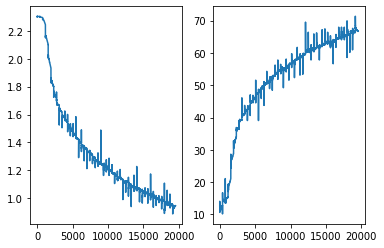

In [20]:
from torch.autograd import Variable

plotloss = []
plotauc = []
for epoch in range(50):  # 指定训练一共要循环几个epoch
    net.train()
    sum_loss = 0.0
    correct = 0.0
    total = 0.0
    
    # 这里我们遇到了第一步中出现的trailoader，代码传入数据，enumerate是python的内置函数，既获得索引也获得数据
    for i, (images,labels) in enumerate(trainloader):
        # data是从enumerate返回的data，包含数据和标签信息，分别赋值给inputs和labels
        # data的结构是：[4x3x32x32的张量,长度4的张量],4是batch_size的数值
 
        # 把input数据从tensor转为variable，variable才拥有梯度grad,输入模型训练都要转成Variable        
        if torch.cuda.is_available():
            images=Variable(images).cuda()
            labels=Variable(labels).cuda()
        else:
            images=Variable(images) 
            labels=Variable(labels)

        # 将参数的grad值初始化为
        optimizer.zero_grad()                
 
        # forward + backward + optimize      
        outputs = net(images)
        # 将output和labels使用叉熵计算损失
        loss = criterion(outputs, labels)
        # 反向传播
        loss.backward()
        # 用SGD更新参数
        optimizer.step()
        
        # loss.item()转换为numpy
        # loss本身为Variable类型，所以要使用loss.data[0]获取其Tensor，因为其为标量，所以取0
        sum_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)          # 更新测试图片的数量
        correct += (predicted == labels).sum() # 更新正确分类的图片的数量
#         if i % 200 == 199:
        print('[epoch:%d, iter:%d] Loss: %.03f | Acc: %.3f%% ' 
              % (epoch + 1, (i + 1 + epoch * len(trainloader)), sum_loss / (i + 1), 100. * correct / total))
        plotloss.append(sum_loss / (i + 1))
        plotauc.append(100. * correct / total)
        
print('Finished Training')
plt.subplot(2,1,1)
plt.plot(plotloss)
plt.subplot(2,1,2)
plt.plot(plotauc)

### 7. 测试

In [21]:
# 创建一个python迭代器，读入的是我们第一步里面就已经加载好的testloader
dataiter = iter(testloader)
# 返回一个batch_size的图片，根据第一步的设置，应该是4张（更改过后是10）
images, labels = dataiter.next()

In [22]:
images.size()

torch.Size([128, 3, 32, 32])

In [23]:
labels

tensor([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4, 9,
        5, 2, 4, 0, 9, 6, 6, 5, 4, 5, 9, 2, 4, 1, 9, 5, 4, 6, 5, 6, 0, 9, 3, 9,
        7, 6, 9, 8, 0, 3, 8, 8, 7, 7, 4, 6, 7, 3, 6, 3, 6, 2, 1, 2, 3, 7, 2, 6,
        8, 8, 0, 2, 9, 3, 3, 8, 8, 1, 1, 7, 2, 5, 2, 7, 8, 9, 0, 3, 8, 6, 4, 6,
        6, 0, 0, 7, 4, 5, 6, 3, 1, 1, 3, 6, 8, 7, 4, 0, 6, 2, 1, 3, 0, 4, 2, 7,
        8, 3, 1, 2, 8, 0, 8, 3])

In [24]:
# # np.transpose( xxx,  (2, 0, 1))   # 将 C x H x W 转化为 H x W x C
# # 展示这四张图片
# fig = plt.figure(figsize=(15, 10))
# for i in range(10):
#     ax = fig.add_subplot(2,5,i+1)
#     img_skimage = np.transpose(images[i].numpy(), (1,2,0))
#     ax.imshow(img_skimage)
# plt.show()
# print(labels)

程序中的 `torch.max(outputs.data, 1)` ，返回一个tuple (元组)

而这里很明显，这个返回的元组的第一个元素是image data，即是最大的 值，第二个元素是label， 即是最大的值 的 索引！我们只需要label（最大值的索引），所以就会有` _ `,predicted这样的赋值语句，表示忽略第一个返回值，把它赋值给` _`， 就是舍弃它的意思；

In [25]:
correct = 0   # 定义预测正确的图片数，初始化为0
total = 0     # 总共参与测试的图片数，也初始化为0
for data in testloader:  # 循环每一个batch
    images, labels = data
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    net.eval()  # 把模型转为test模式
    outputs = net(images)  # 输入网络进行测试
    
    # outputs.data是一个4x10张量，将每一行的最大的那一列的值和序号各自组成一个一维张量返回，第一个是值的张量，第二个是序号的张量。
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)          # 更新测试图片的数量
    correct += (predicted == labels).sum() # 更新正确分类的图片的数量

print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
 

Accuracy of the network on the 10000 test images: 62 %


In [26]:
 # 定义2个存储每类中测试正确的个数的 列表，初始化为0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))  
for data in testloader:
    images, labels = data
    images=Variable(images).cuda()
    labels=Variable(labels).cuda()
    outputs = net(images)

    _, predicted = torch.max(outputs.data, 1)
    #4组(batch_size)数据中，输出于label相同的，标记为1，否则为0
    c = (predicted == labels).squeeze()
    for i in range(16):     
        label = labels[i]   # 对各个类的进行各自累加
        class_correct[label] += c[i]
        class_total[label] += 1
 
 
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 67 %
Accuracy of  bird : 53 %
Accuracy of   cat : 45 %
Accuracy of  deer : 54 %
Accuracy of   dog : 38 %
Accuracy of  frog : 73 %
Accuracy of horse : 73 %
Accuracy of  ship : 73 %
Accuracy of truck : 76 %


### 8. 保存模型

In [27]:
torch.save(net, 'D:/CIFAR-10/model/LeNet5-128.pth')

D:\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type LeNet5. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


### 9. 预测

In [28]:
import torch
from PIL import Image
from torch.autograd import Variable
import torch.nn.functional as F
from torchvision import datasets, transforms
import numpy as np
 
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = torch.load('D:/CIFAR-10/model/LeNet5-128.pth')  # 加载模型
model = model.to(device)
model.eval()  # 把模型转为test模式

# 读取要预测的图片
img = Image.open("D:/CIFAR-10/bird1.png").convert('RGB') # 读取图像

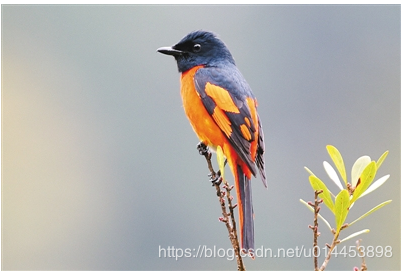

In [29]:
img

In [30]:
trans = transforms.Compose([transforms.Scale((32,32)),
                            transforms.ToTensor(),
                            transforms.Normalize(mean=(0.5, 0.5, 0.5), 
                                                 std=(0.5, 0.5, 0.5)),
                           ])
 
img = trans(img)
img = img.to(device)
# 图片扩展多一维,因为输入到保存的模型中是4维的[batch_size,通道,长，宽]，而普通图片只有三维，[通道,长，宽]
img = img.unsqueeze(0)  
    # 扩展后，为[1，1，28，28]
output = model(img)
prob = F.softmax(output,dim=1) #prob是10个分类的概率
print("概率",prob)
value, predicted = torch.max(output.data, 1)
print("类别",predicted.item())
print(value)
pred_class = classes[predicted.item()]
print("分类",pred_class)
 
 
 
    # prob = F.softmax(output, dim=1)
    # prob = Variable(prob)
    # prob = prob.cpu().numpy()  # 用GPU的数据训练的模型保存的参数都是gpu形式的，要显示则先要转回cpu，再转回numpy模式
    # print(prob)  # prob是10个分类的概率
    # pred = np.argmax(prob)  # 选出概率最大的一个
    # # print(pred)
    # # print(pred.item())
    # pred_class = classes[pred]
    # print(pred_class)

概率 tensor([[8.2018e-02, 2.1404e-04, 5.2432e-01, 3.8024e-02, 1.5516e-01, 6.6242e-02,
         3.2900e-04, 1.2519e-01, 7.3145e-03, 1.1834e-03]], device='cuda:0',
       grad_fn=<SoftmaxBackward>)
类别 2
tensor([3.4808], device='cuda:0')
分类 bird


D:\Anaconda3\lib\site-packages\torchvision\transforms\transforms.py:219: UserWarning: The use of the transforms.Scale transform is deprecated, please use transforms.Resize instead.
  warnings.warn("The use of the transforms.Scale transform is deprecated, " +
